In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
context_dataset_path = "/content/drive/MyDrive/contextual_data.csv"
song_dataset_path = "/content/drive/MyDrive/spotify_songs.csv"
emo_dataset_path = "/content/drive/MyDrive/emotion_label.csv"
user_dataset_path = "/content/drive/MyDrive/user.csv"

# Load the dataset
context_df = pd.read_csv(context_dataset_path)
song_df = pd.read_csv(song_dataset_path)
emotion_df = pd.read_csv(emo_dataset_path)
user_df = pd.read_csv(user_dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
context_df.columns

NameError: name 'context_df' is not defined

# Merging Song and Emotion Labels

In [3]:
emotion_df['uri_id'] = emotion_df['uri'].apply(lambda x: x.split(':')[-1])
# Filter only required emotion columns
emo_small = emotion_df[['uri_id', 'spec_rate', 'labels']]

# Merge on track_id (song_df) and uri_id (emo_df)
merged_df = pd.merge(
    song_df,
    emo_small,
    left_on='track_id',
    right_on='uri_id',
    how='inner'
)

print("Total matched tracks:", merged_df.shape[0])

# Save final dataset
output_path = "/content/drive/MyDrive/matched_songs.csv"
merged_df.to_csv(output_path, index=False)

print("Saved successfully to:", output_path)

Total matched tracks: 6012
Saved successfully to: /content/drive/MyDrive/matched_songs.csv


In [4]:
merged_df.head()

track_id                                    track_name  \
0  00f9VGHfQhAHMCQ2bSjg3D                                       Soldier   
1  00GxbkrW4m1Tac5xySEJ4M  Ti volevo dedicare (feat. J-AX & Boomdabash)   
2  00HIh9mVUQQAycsQiciWsh                                     Limestone   
3  00i0O74dXdaKKdCrqHnfXm                                  La Mordidita   
4  00Ia46AgCNfnXjzgH8PIKH                         Latina (feat. Maluma)   

         track_artist                                             lyrics  \
0            James TW  Hold your breath, don't look down, keep trying...   
1          Rocco Hunt  Ho una cosa da dirti da tempo Ma  non ho mai t...   
2  Magic City Hippies  How many friends are you gonna set on fire? Ho...   
3        Ricky Martin  Ihhh-yo! Ihhh-ye! Sonó la campana y el fin de ...   
4              Reykon  NA (Uh, ah, uh) Reykon, ey (Ah, oh) Maluma Mam...   

   track_popularity          track_album_id  \
0                70  3GNzXsFbzdwM0WKCZtgeNP   
1                78  57L1NgMlfxscOxHhmfLjqg   
2                58  7mtoEwzZYBqG8JYItxcccG   
3                69  375cUd86z58eqXN2yW3Do9   
4                74  0S3696V7LiaqAJ3DKChAdL   

                           track_album_name track_album_release_date  \
0                                  Chapters               2019-04-26   
1                                   Libertà               2019-08-30   
2                          Hippie Castle EP               2015-07-24   
3  A Quien Quiera Escuchar (Deluxe Edition)               2015-02-10   
4                     Latina (feat. Maluma)               2019-05-31   

                                       playlist_name             playlist_id  \
0                                 urban contemporary  4WiB26kw0INKwbzfb5M6Tv   
1  Musica Italiana 2020 - Playlist Pop & Hip-Hop ...  6kVFIQBhLT4003iw2WWEv1   
2                                    Indie Poptimism  1pZWCY50kMUhshcESknir8   
3                        Fiesta Latina Mix 🎈🎉💃🏻🕺🏻☀️🏖  2kY6lVc5EcVfI5WNKmPQQG   
4                 LATIN POP 2020 🔥 Pop latino actual  2kKzN3kRYDzBctlaWs7CP2   

   ... acousticness instrumentalness  liveness  valence    tempo  duration_ms  \
0  ...       0.2800          0.00000    0.0975    0.305  147.764       224720   
1  ...       0.0104          0.00000    0.1920    0.271  120.002       208133   
2  ...       0.2820          0.00849    0.0614    0.723   78.014       209165   
3  ...       0.0344          0.00000    0.1830    0.946  142.006       211680   
4  ...       0.0748          0.00000    0.3310    0.750  102.071       226739   

   language                  uri_id     spec_rate  labels  
0        en  00f9VGHfQhAHMCQ2bSjg3D  2.447490e-07       1  
1        it  00GxbkrW4m1Tac5xySEJ4M  3.171049e-07       1  
2        en  00HIh9mVUQQAycsQiciWsh  1.831090e-07       0  
3        es  00i0O74dXdaKKdCrqHnfXm  3.108466e-07       2  
4        es  00Ia46AgCNfnXjzgH8PIKH  5.689361e-07       1  

[5 rows x 28 columns]

In [5]:
merged_df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'uri_id', 'spec_rate', 'labels'],
      dtype='object')

# Preprocess & Info

In [51]:
context_df.head()

Track_ID User_ID            Timestamp Time_of_Day Location  Activity  \
0    T0001   U0000  2025-08-01 00:00:00       Night     Home  Studying   
1    T0002   U0001  2025-08-01 01:00:00     Evening     Cafe  Relaxing   
2    T0003   U0002  2025-08-01 02:00:00     Morning     Cafe   Reading   
3    T0004   U0003  2025-08-01 03:00:00   Afternoon   Office  Studying   
4    T0005   U0004  2025-08-01 04:00:00   Afternoon      Gym   Working   

  Self_Reported_Emotion  
0                 Tired  
1                  Calm  
2                 Happy  
3                  Calm  
4                  Calm

In [52]:
context_df.shape

(1802, 7)

In [53]:
context_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Track_ID               1802 non-null   object
 1   User_ID                1802 non-null   object
 2   Timestamp              1802 non-null   object
 3   Time_of_Day            1802 non-null   object
 4   Location               1802 non-null   object
 5   Activity               1802 non-null   object
 6   Self_Reported_Emotion  1802 non-null   object
dtypes: object(7)
memory usage: 98.7+ KB


In [54]:
context_df.describe().T

count unique                  top freq
Track_ID               1802   1802                T1802    1
User_ID                1802    500                U0301    4
Timestamp              1802   1802  2025-10-15 01:00:00    1
Time_of_Day            1802      4              Evening  470
Location               1802      5                  Gym  418
Activity               1802      6             Relaxing  319
Self_Reported_Emotion  1802      6                 Calm  329

In [55]:
print("\nNumber of duplicate rows:", context_df.duplicated().sum())


Number of duplicate rows: 0


In [56]:
print("\nNumber of duplicate rows:", merged_df.duplicated().sum())


Number of duplicate rows: 0


In [57]:

# Fill missing lyrics with "unknown"
merged_df['lyrics'] = merged_df['lyrics'].fillna("unknown")
# Fill missing language with "unknown"
merged_df['language'] = merged_df['language'].fillna("unknown")

In [58]:
merged_df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
lyrics                      0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
language                    0
uri_id                      0
spec_rate                   0
labels                      0
dtype: int64

In [59]:
context_df.isnull().sum()

Track_ID                 0
User_ID                  0
Timestamp                0
Time_of_Day              0
Location                 0
Activity                 0
Self_Reported_Emotion    0
dtype: int64

In [60]:
merged_df['track_album_release_date'] = pd.to_datetime(
    merged_df['track_album_release_date'], errors='coerce'
)

In [61]:
# import re
# text_cols = ['track_name', 'track_artist', 'lyrics',
#              'playlist_name', 'track_album_name']

# for col in text_cols:
#     merged_df[col] = merged_df[col].astype(str).str.strip()

# # Remove excessive whitespace in lyrics
# merged_df['lyrics'] = merged_df['lyrics'].apply(
#     lambda x: re.sub(r'\s+', ' ', x)
# )

In [62]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def clean_lyrics(text):
    text = str(text).lower()                                # lowercase
    text = re.sub(r'<.*?>', '', text)                       # remove HTML
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)            # remove special char
    text = re.sub(r'\s+', ' ', text).strip()                # whitespace cleanup
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)              # reduce lengthening
    words = [w for w in text.split() if w not in stop_words]# remove stopwords
    #words = [lemm.lemmatize(w) for w in words]              # lemmatization
    return " ".join(words)

merged_df['lyrics'] = merged_df['lyrics'].apply(clean_lyrics)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scale_cols = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','spec_rate'
]

scaler = MinMaxScaler()
merged_df[scale_cols] = scaler.fit_transform(merged_df[scale_cols])


In [64]:
user_df.head()

Age  Gender spotify_usage_period  \
0  20-35  Female    More than 2 years   
1  12-20    Male    More than 2 years   
2  35-60  Others   6 months to 1 year   
3  20-35  Female    1 year to 2 years   
4  20-35  Female    1 year to 2 years   

                         spotify_listening_device spotify_subscription_plan  \
0              Smart speakers or voice assistants       Free (ad-supported)   
1                              Computer or laptop       Free (ad-supported)   
2              Smart speakers or voice assistants       Free (ad-supported)   
3  Smartphone, Smart speakers or voice assistants       Free (ad-supported)   
4                                      Smartphone       Free (ad-supported)   

  premium_sub_willingness          preffered_premium_plan  \
0                     Yes        Family Plan-Rs 179/month   
1                     Yes  Individual Plan- Rs 119/ month   
2                     Yes        Student Plan-Rs 59/month   
3                      No                             NaN   
4                      No                             NaN   

  preferred_listening_content fav_music_genre music_time_slot  \
0                     Podcast          Melody           Night   
1                     Podcast             Rap       Afternoon   
2                     Podcast             Pop           Night   
3                       Music          Melody           Night   
4                       Music          Melody           Night   

                              music_Influencial_mood  \
0                              Sadness or melancholy   
1                       Social gatherings or parties   
2                       Relaxation and stress relief   
3  Relaxation and stress relief, Social gathering...   
4                       Relaxation and stress relief   

                           music_lis_frequency           music_expl_method  \
0                                 leisure time                   Playlists   
1                              Workout session                   Playlists   
2                 Study Hours, While Traveling                   Playlists   
3  Office hours, Workout session, leisure time  recommendations, Playlists   
4                                 leisure time  recommendations, Playlists   

   music_recc_rating     pod_lis_frequency         fav_pod_genre  \
0                  3                 Daily                Comedy   
1                  2  Several times a week                Comedy   
2                  4           Once a week                Sports   
3                  4                 Never                   NaN   
4                  4                Rarely  Lifestyle and Health   

  preffered_pod_format     pod_host_preference preffered_pod_duration  \
0            Interview                    Both                   Both   
1            Interview                    Both                    NaN   
2            Interview                     NaN                   Both   
3                  NaN                     NaN                    NaN   
4        Story telling  Well known individuals                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied  
3                       Ok  
4                       Ok

In [65]:
user_df.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [66]:
# Remove duplicate rows
user_df = user_df.drop_duplicates()
print("Duplicates removed. New shape:", user_df.shape)

Duplicates removed. New shape: (519, 20)


In [67]:
print("\nNumber of duplicate rows:", user_df.duplicated().sum())


Number of duplicate rows: 0


In [68]:
# List of categorical columns with missing values
cat_cols_with_missing = [
    'preffered_premium_plan',
    'fav_pod_genre',
    'preffered_pod_format',
    'pod_host_preference',
    'preffered_pod_duration'
]

# Fill missing values with mode of each column
for col in cat_cols_with_missing:
    user_df[col] = user_df[col].fillna(user_df[col].mode()[0])


In [69]:
user_df.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [70]:
user_df.head(3)

Age  Gender spotify_usage_period            spotify_listening_device  \
0  20-35  Female    More than 2 years  Smart speakers or voice assistants   
1  12-20    Male    More than 2 years                  Computer or laptop   
2  35-60  Others   6 months to 1 year  Smart speakers or voice assistants   

  spotify_subscription_plan premium_sub_willingness  \
0       Free (ad-supported)                     Yes   
1       Free (ad-supported)                     Yes   
2       Free (ad-supported)                     Yes   

           preffered_premium_plan preferred_listening_content fav_music_genre  \
0        Family Plan-Rs 179/month                     Podcast          Melody   
1  Individual Plan- Rs 119/ month                     Podcast             Rap   
2        Student Plan-Rs 59/month                     Podcast             Pop   

  music_time_slot        music_Influencial_mood           music_lis_frequency  \
0           Night         Sadness or melancholy                  leisure time   
1       Afternoon  Social gatherings or parties               Workout session   
2           Night  Relaxation and stress relief  Study Hours, While Traveling   

  music_expl_method  music_recc_rating     pod_lis_frequency fav_pod_genre  \
0         Playlists                  3                 Daily        Comedy   
1         Playlists                  2  Several times a week        Comedy   
2         Playlists                  4           Once a week        Sports   

  preffered_pod_format pod_host_preference preffered_pod_duration  \
0            Interview                Both                   Both   
1            Interview                Both                Shorter   
2            Interview                Both                   Both   

  pod_variety_satisfaction  
0                       Ok  
1                Satisfied  
2                Satisfied

# EDA

In [ ]:
context_df['Timestamp'] = pd.to_datetime(context_df['Timestamp'])
context_df.dtypes


Track_ID                         object
User_ID                          object
Timestamp                datetime64[ns]
Time_of_Day                      object
Location                         object
Activity                         object
Self_Reported_Emotion            object
dtype: object

In [ ]:
context_df['Hour'] = context_df['Timestamp'].dt.hour
context_df['Day'] = context_df['Timestamp'].dt.date
context_df['Weekday'] = context_df['Timestamp'].dt.day_name()


In [ ]:
context_df.head()

Track_ID User_ID           Timestamp Time_of_Day Location  Activity  \
0    T0001   U0000 2025-08-01 00:00:00       Night     Home  Studying   
1    T0002   U0001 2025-08-01 01:00:00     Evening     Cafe  Relaxing   
2    T0003   U0002 2025-08-01 02:00:00     Morning     Cafe   Reading   
3    T0004   U0003 2025-08-01 03:00:00   Afternoon   Office  Studying   
4    T0005   U0004 2025-08-01 04:00:00   Afternoon      Gym   Working   

  Self_Reported_Emotion  Hour         Day Weekday  
0                 Tired     0  2025-08-01  Friday  
1                  Calm     1  2025-08-01  Friday  
2                 Happy     2  2025-08-01  Friday  
3                  Calm     3  2025-08-01  Friday  
4                  Calm     4  2025-08-01  Friday

In [ ]:
for col in ['Time_of_Day', 'Location', 'Activity', 'Self_Reported_Emotion']:
    print(f"\n--- {col} ---")
    print(context_df[col].value_counts())


--- Time_of_Day ---
Time_of_Day
Evening      470
Night        455
Afternoon    448
Morning      429
Name: count, dtype: int64

--- Location ---
Location
Gym        418
Cafe       367
Home       352
Commute    339
Office     326
Name: count, dtype: int64

--- Activity ---
Activity
Relaxing      319
Working       319
Driving       302
Reading       296
Studying      283
Exercising    283
Name: count, dtype: int64

--- Self_Reported_Emotion ---
Self_Reported_Emotion
Calm         329
Happy        319
Tired        311
Energetic    305
Focused      275
Sad          263
Name: count, dtype: int64


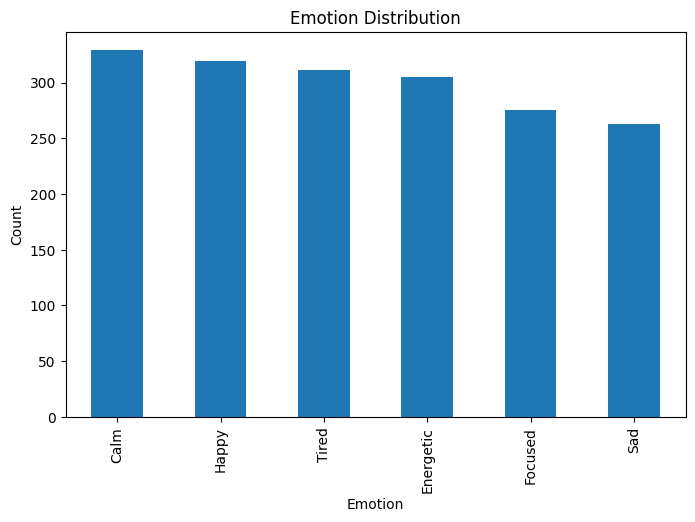

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
context_df['Self_Reported_Emotion'].value_counts().plot(kind='bar')
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


<Figure size 500x600 with 0 Axes>

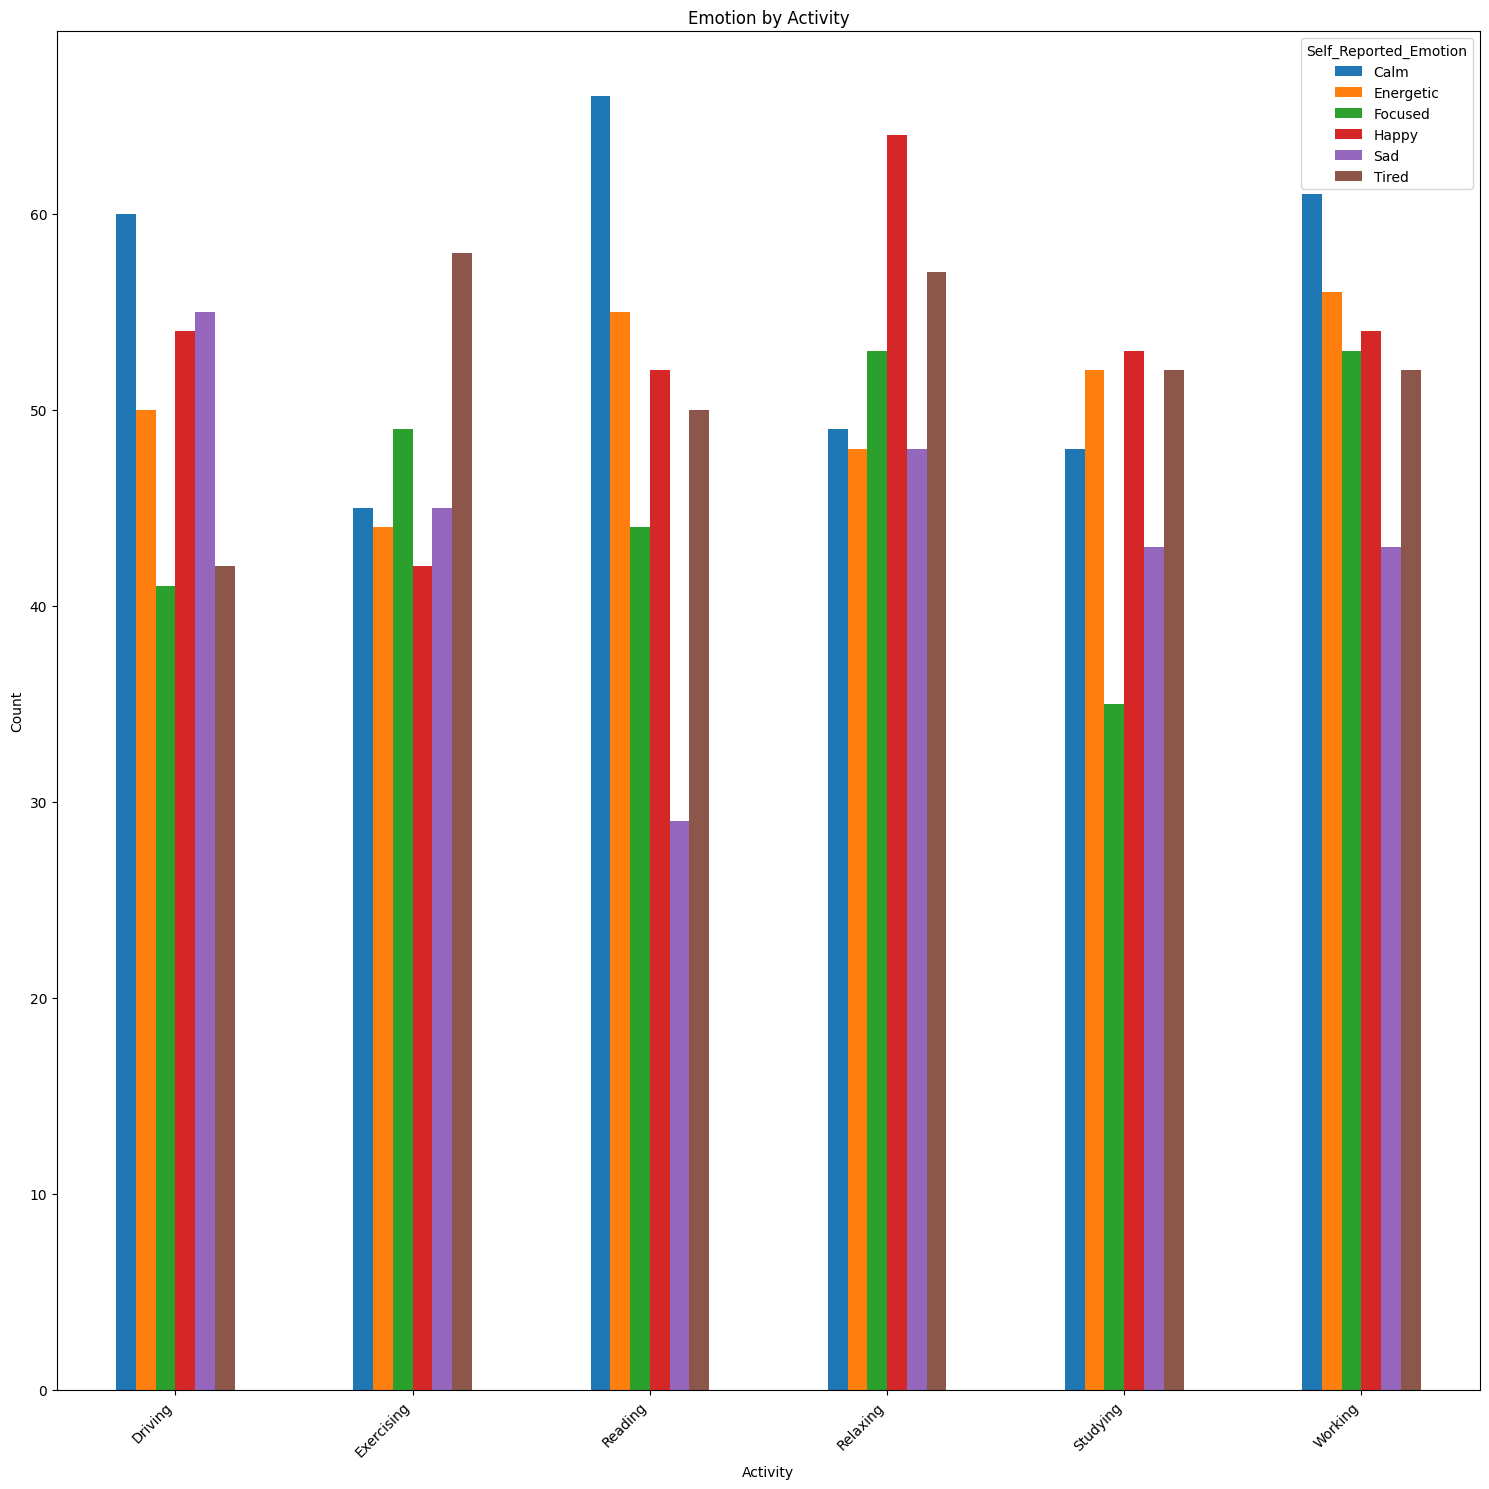

In [ ]:
plt.figure(figsize=(5,6))

ax = context_df.groupby('Activity')['Self_Reported_Emotion'] \
       .value_counts() \
       .unstack() \
       .plot(kind='bar', figsize=(15,15))

plt.title("Emotion by Activity")
plt.ylabel("Count")
plt.xlabel("Activity")
plt.xticks(rotation=45, ha='right')   # tilt the labels so they behave
plt.tight_layout()                    # corporate-level space optimization

plt.show()



<Figure size 1500x2000 with 0 Axes>

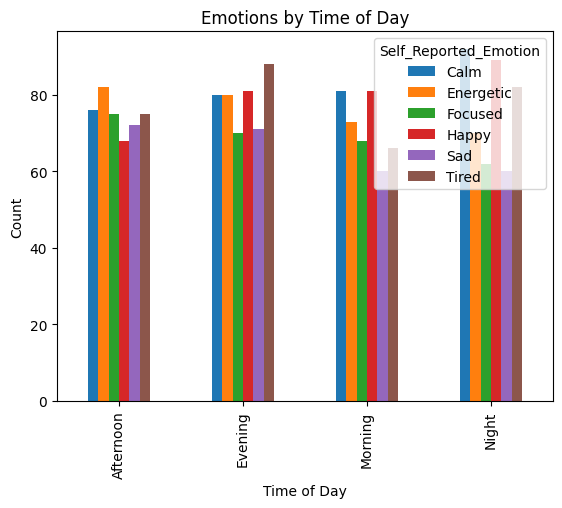

In [ ]:
plt.figure(figsize=(15,20))
ax = context_df.groupby('Time_of_Day')['Self_Reported_Emotion'].value_counts().unstack().plot(
    kind='bar', width=0.5
)

plt.title("Emotions by Time of Day")
plt.ylabel("Count")
plt.xlabel("Time of Day")
plt.show()


<Figure size 1000x600 with 0 Axes>

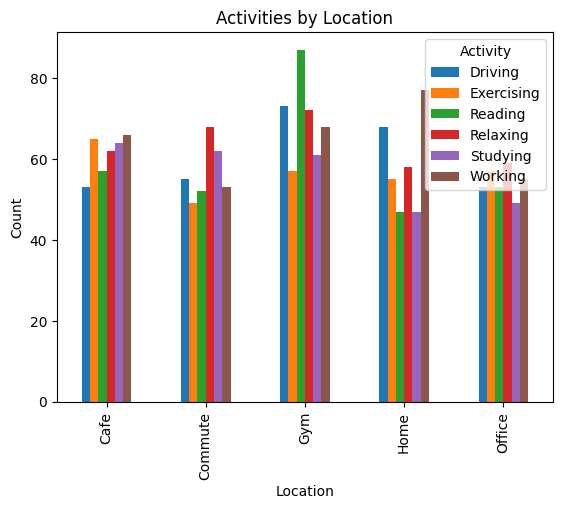

In [ ]:
plt.figure(figsize=(10,6))
context_df.groupby('Location')['Activity'].value_counts().unstack().plot(kind='bar')
plt.title("Activities by Location")
plt.ylabel("Count")
plt.xlabel("Location")
plt.show()

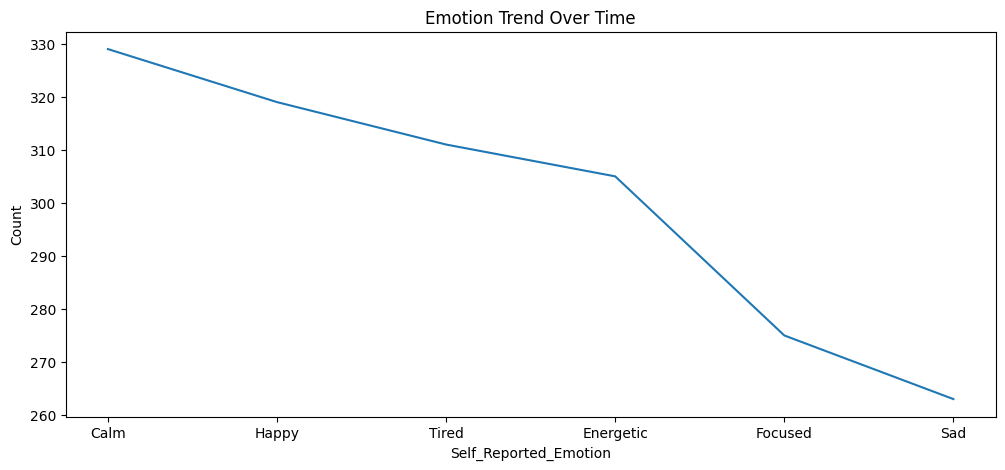

In [ ]:
plt.figure(figsize=(12,5))
context_df.set_index('Timestamp')['Self_Reported_Emotion'].value_counts().plot()
plt.title("Emotion Trend Over Time")
plt.ylabel("Count")
plt.show()

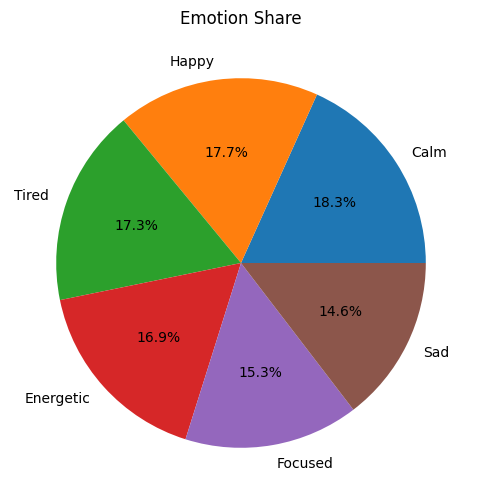

In [ ]:
context_df['Self_Reported_Emotion'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6)
)
plt.title("Emotion Share")
plt.ylabel("")
plt.show()



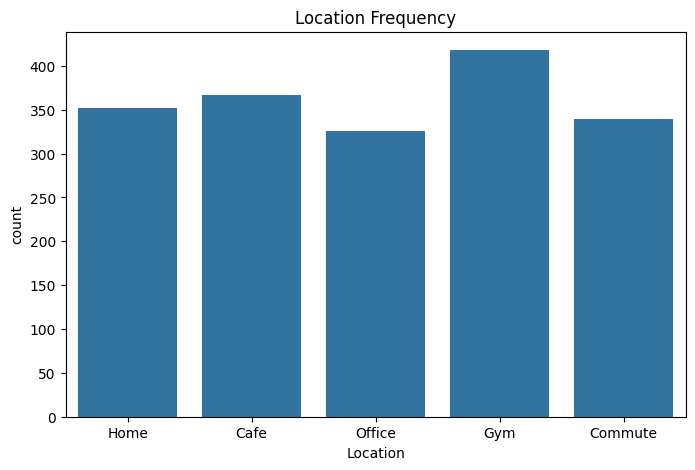

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=context_df, x='Location')
plt.title("Location Frequency")
plt.show()


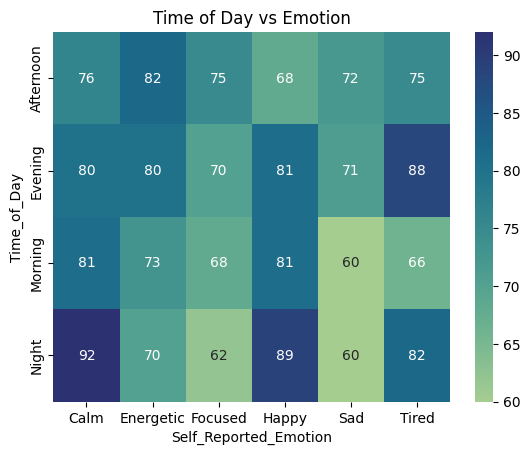

In [ ]:
pivot = context_df.pivot_table(
    index='Time_of_Day',
    columns='Self_Reported_Emotion',
    aggfunc='size',
    fill_value=0
)

sns.heatmap(pivot, annot=True, fmt='d', cmap='crest')
plt.title("Time of Day vs Emotion")
plt.show()


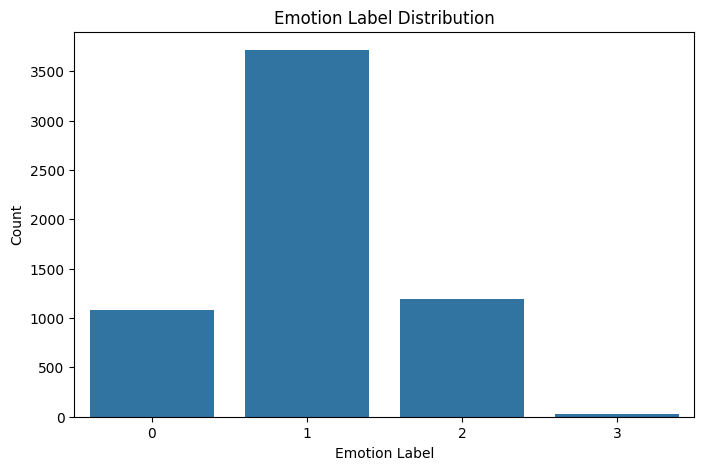

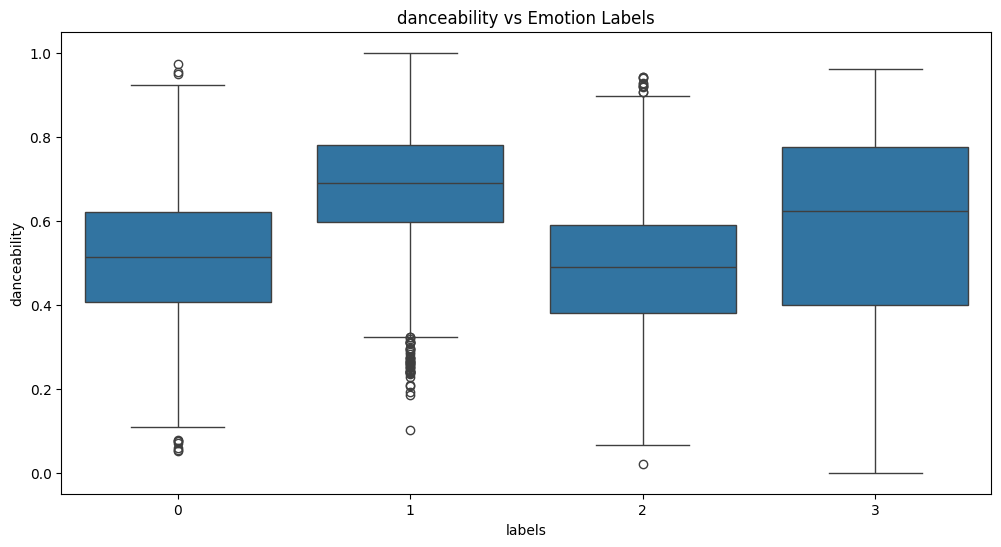

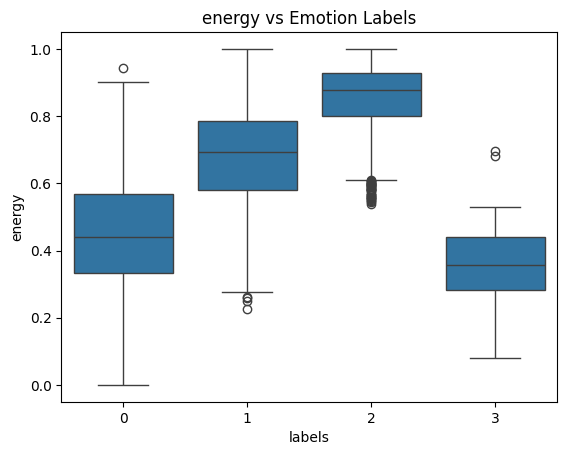

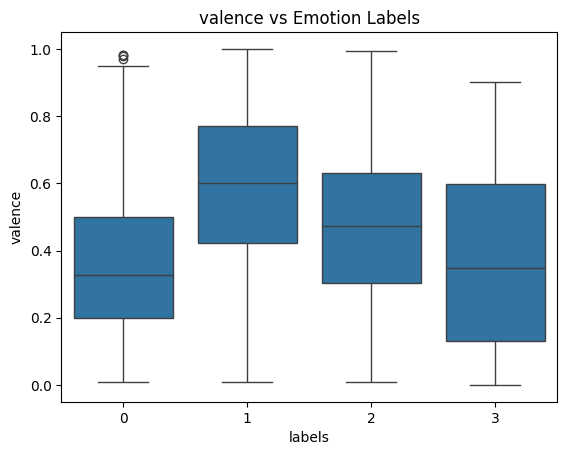

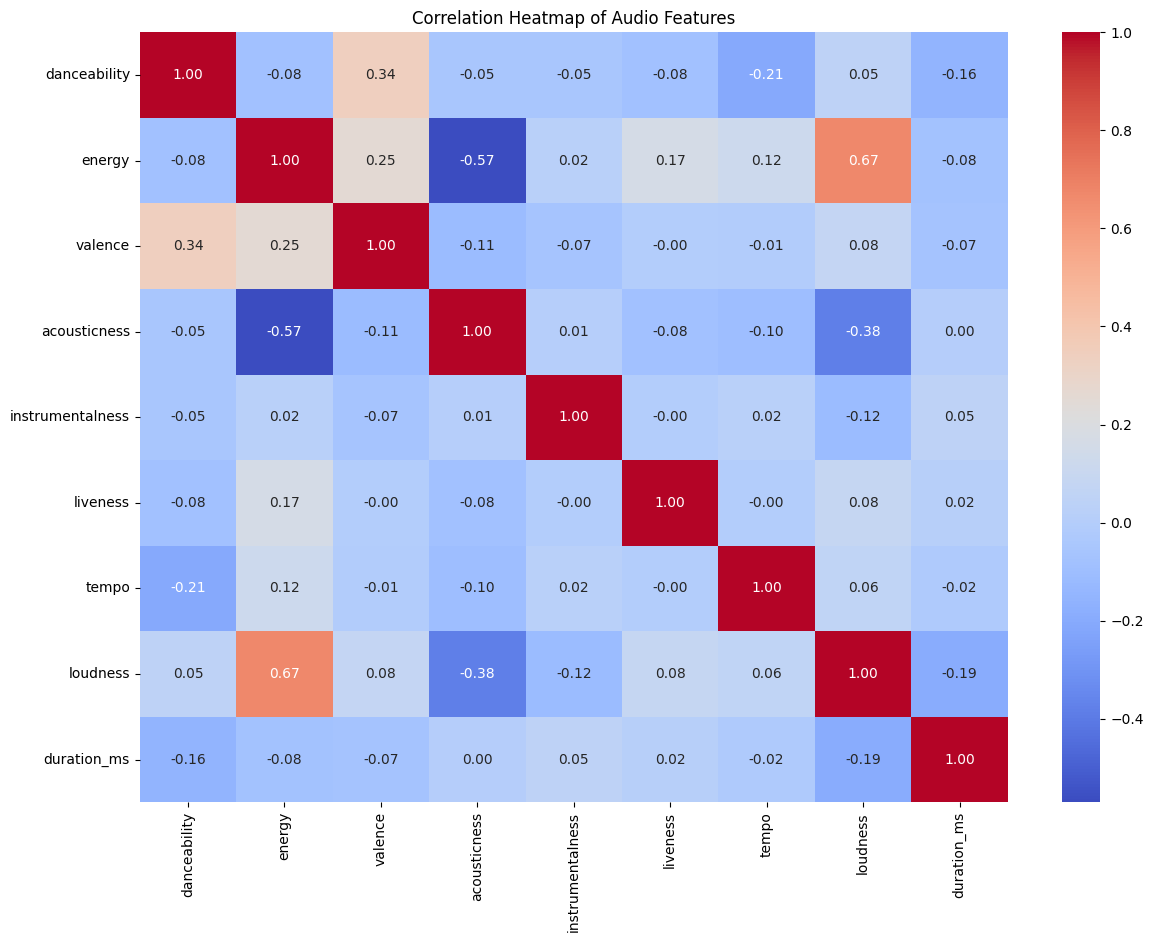

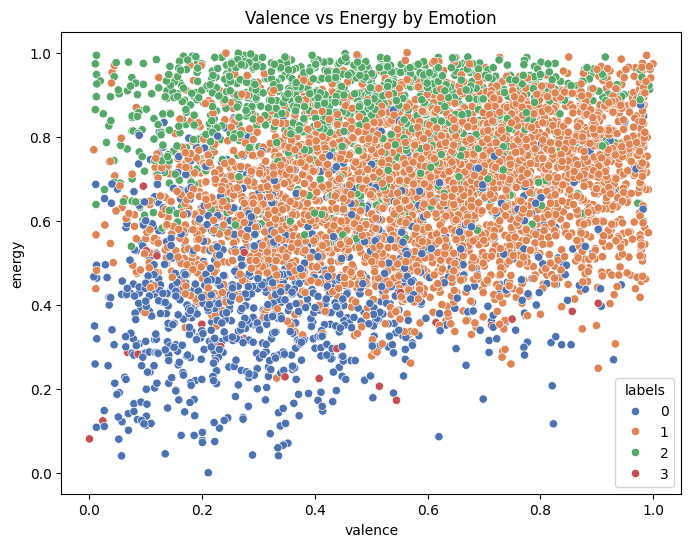

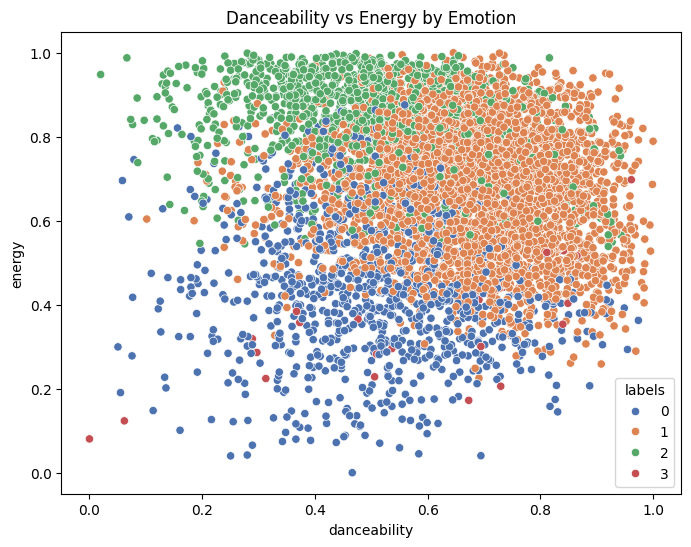

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# ------------ 1. Emotion Label Distribution ------------
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='labels')
plt.title("Emotion Label Distribution")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.show()


# ------------ 2. Spec Rate Distribution ------------
plt.figure(figsize=(8,5))
sns.histplot(merged_df['spec_rate'], bins=30, kde=True)
plt.title("Distribution of Spec Rate")
plt.xlabel("Spec Rate")
plt.ylabel("Frequency")
plt.show()


# ------------ 3. Audio Feature Distributions ------------
audio_features = [
    'danceability','energy','valence','acousticness',
    'instrumentalness','liveness','tempo','loudness','duration_ms'
]

merged_df[audio_features].hist(figsize=(15,12), bins=30)
plt.suptitle("Distribution of Audio Features", fontsize=16)
plt.show()


# ------------ 4. Boxplots: Emotion vs Audio Features ------------

plt.figure(figsize=(12,6))
for feature in ['danceability', 'energy', 'valence', 'acousticness']:
    sns.boxplot(data=merged_df, x='labels', y=feature)
    plt.title(f'{feature} vs Emotion Labels')
    plt.show()


# ------------ 5. Correlation Heatmap ------------
plt.figure(figsize=(14,10))
corr = merged_df[audio_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Audio Features")
plt.show()


# ------------ 6. Scatterplots (Emotion-Colored) ------------

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged_df,
    x='valence', y='energy', hue='labels', palette='deep'
)
plt.title("Valence vs Energy by Emotion")
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged_df,
    x='danceability', y='energy', hue='labels', palette='deep'
)
plt.title("Danceability vs Energy by Emotion")
plt.show()


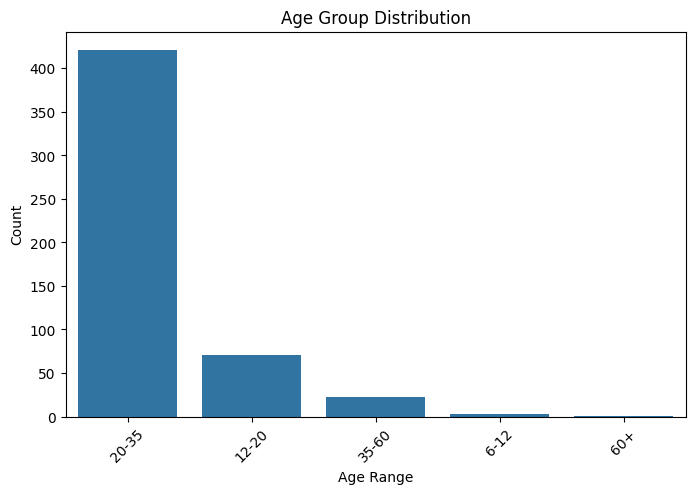

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=user_df, x='Age')
plt.title("Age Group Distribution")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2145337966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, x='Gender', palette="pastel")


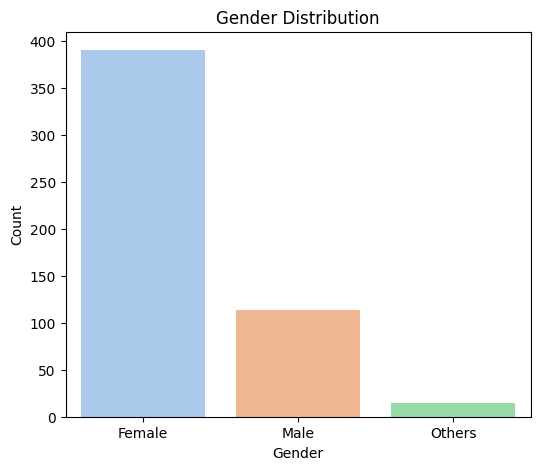

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=user_df, x='Gender', palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=user_df, x='spotify_usage_period')
plt.title("Spotify Usage Duration")
plt.xlabel("Usage Period")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


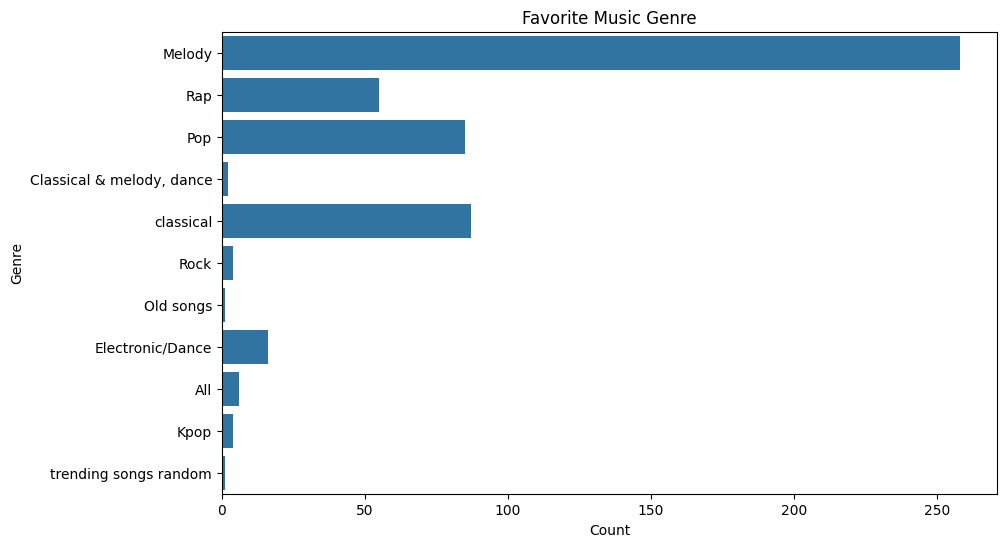

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=user_df, y='fav_music_genre')
plt.title("Favorite Music Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


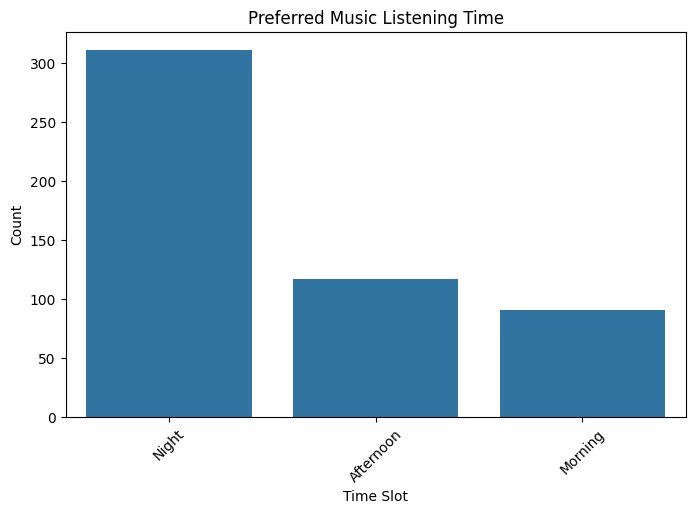

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=user_df, x='music_time_slot')
plt.title("Preferred Music Listening Time")
plt.xlabel("Time Slot")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


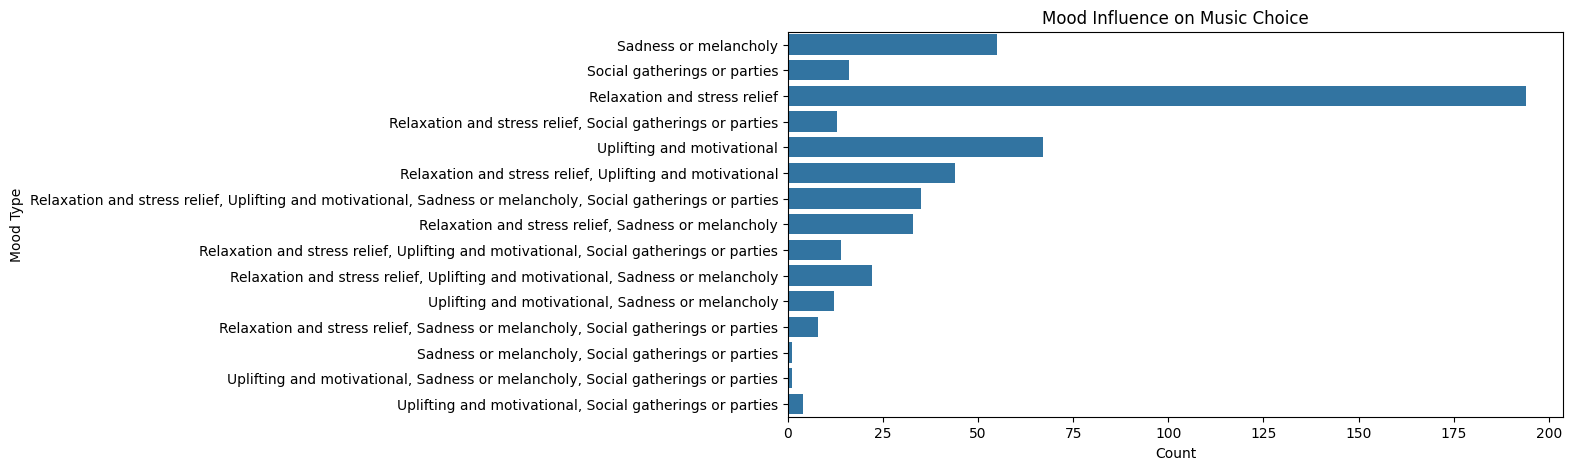

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=user_df, y='music_Influencial_mood')
plt.title("Mood Influence on Music Choice")
plt.xlabel("Count")
plt.ylabel("Mood Type")
plt.show()


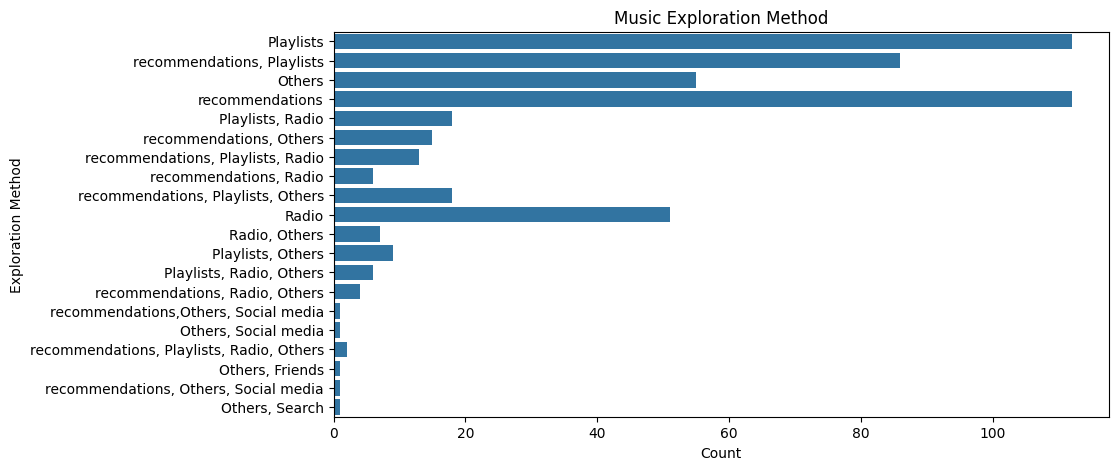

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=user_df, y='music_expl_method')
plt.title("Music Exploration Method")
plt.xlabel("Count")
plt.ylabel("Exploration Method")
plt.show()


/tmp/ipython-input-3775401333.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/tmp/ipython-input-3775401333.py:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


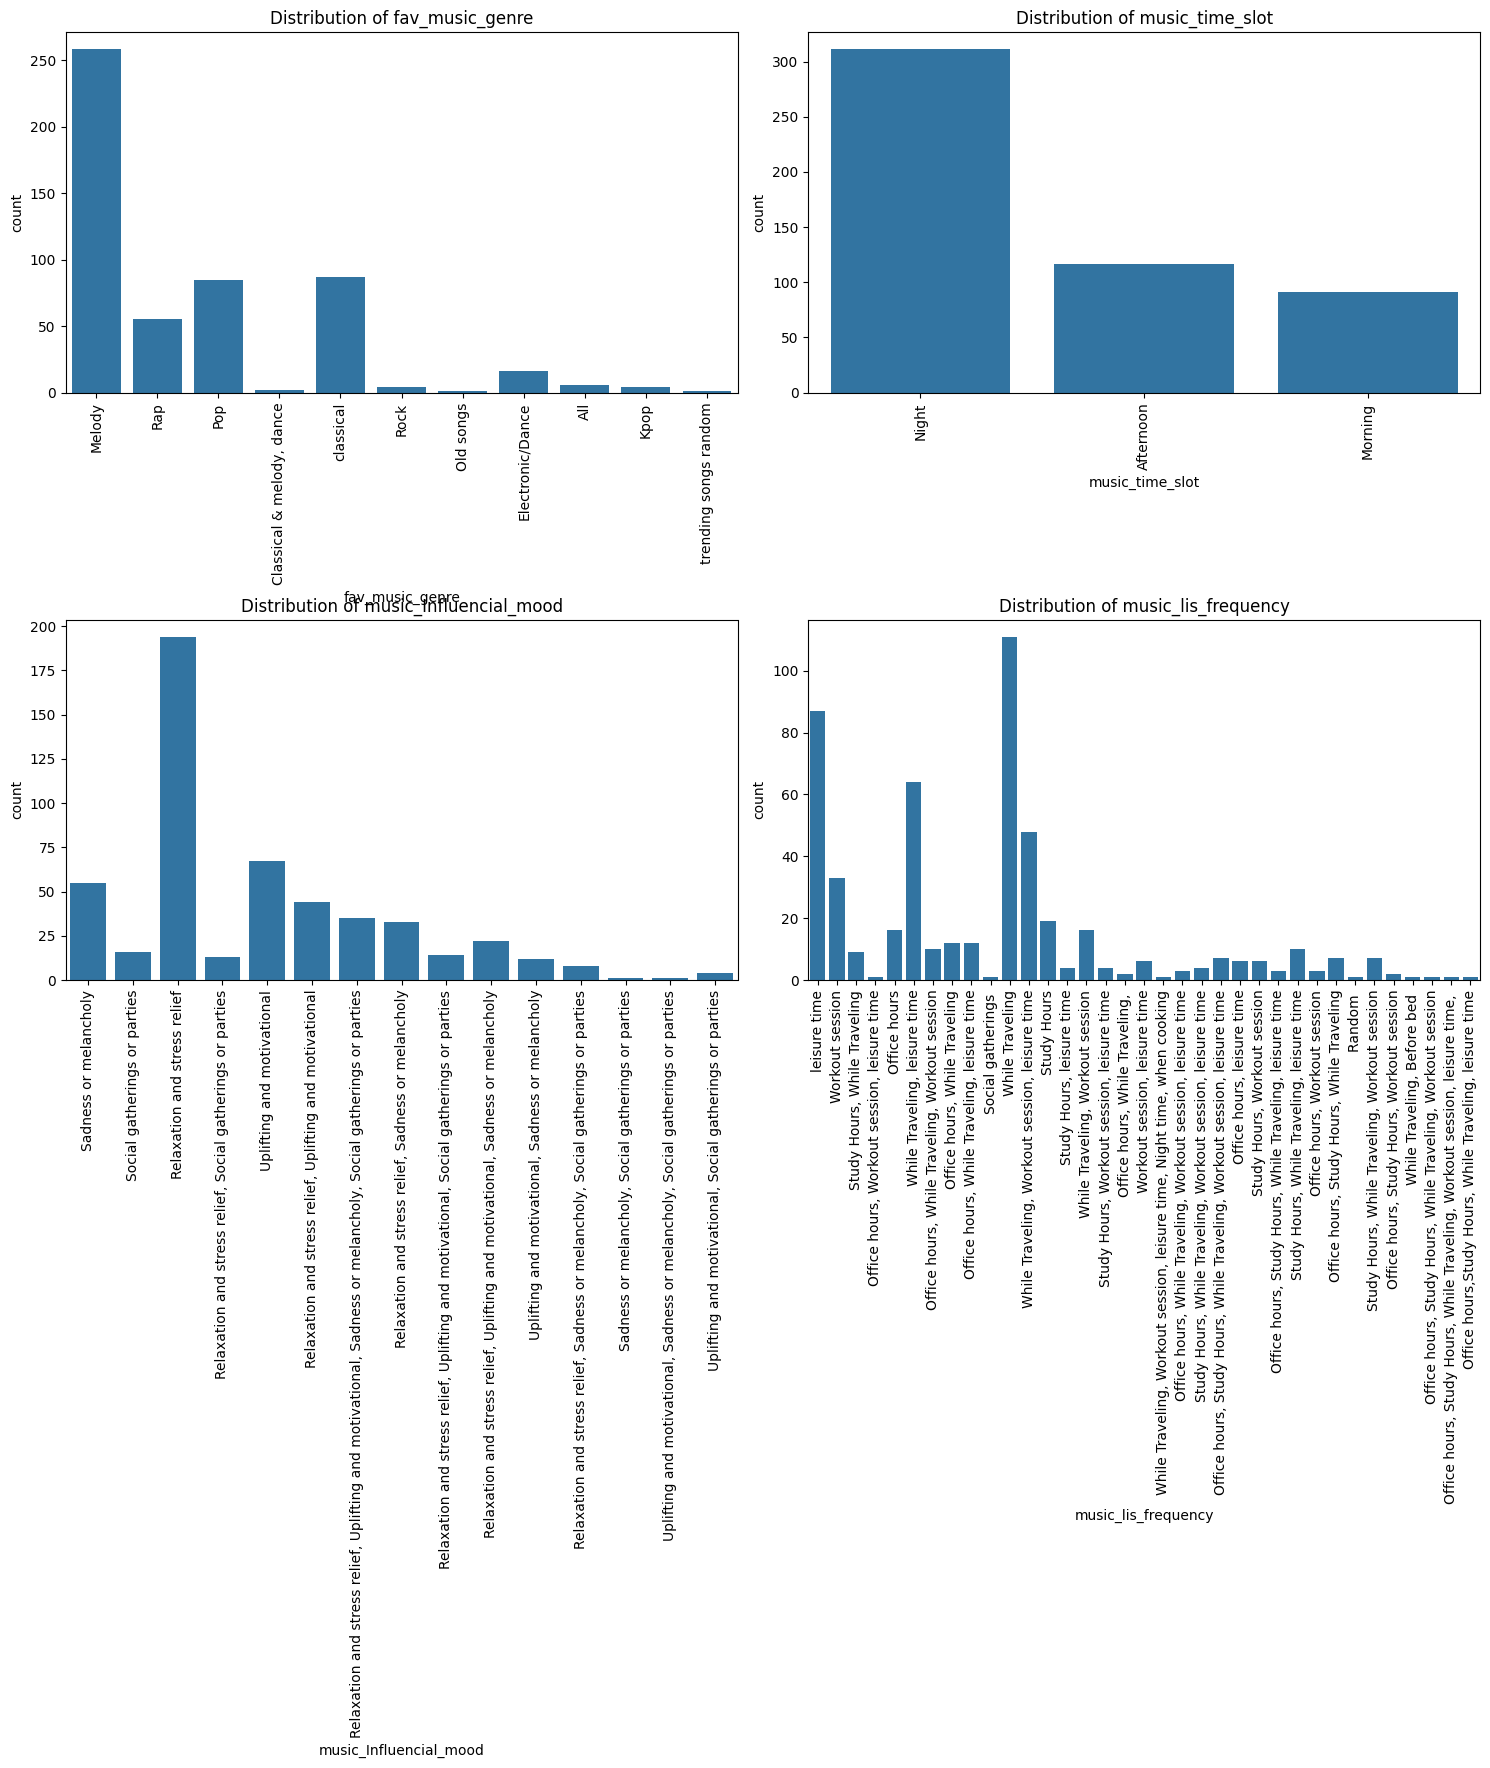

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

cols = ['fav_music_genre', 'music_time_slot',
        'music_Influencial_mood', 'music_lis_frequency']

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=user_df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


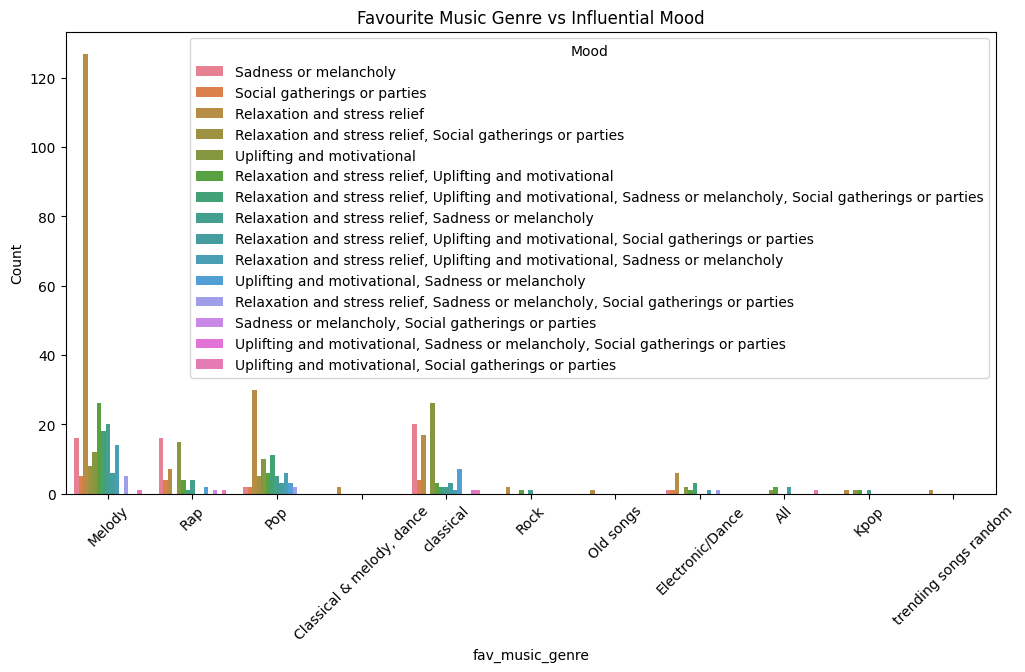

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=user_df, x='fav_music_genre', hue='music_Influencial_mood')
plt.title("Favourite Music Genre vs Influential Mood")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title="Mood")
plt.show()
#Which Genres Influence Which Mood

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(user_df['fav_music_genre'].dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Favourite Music Genres")
plt.show()


In [ ]:
text = " ".join(user_df['music_Influencial_mood'].dropna().astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Music Influential Mood")
plt.show()


# Build Document from the Merged Dataset

Each song is represented as document where the document contains Track metadata , playlist info , emotion of the song , audio features , lyrics and other identifiers

In [209]:
# Install required libraries for RAG and FAISS
%pip install faiss-cpu sentence-transformers numpy pandas scikit-learn -q


In [210]:
merged_df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'uri_id', 'spec_rate', 'labels'],
      dtype='object')

In [211]:
import pandas as pd
import json

# --------------------------
# LOAD YOUR SONG DATAFRAME
# --------------------------

def build_song_document(row):
    """Constructs a structured RAG document string for one song."""
    doc = f"""
TRACK METADATA
Track ID: {row['track_id']}
Track Name: {row['track_name']}
Artist: {row['track_artist']}
Album: {row['track_album_name']}
Album Release Date: {row['track_album_release_date']}
Popularity Score: {row['track_popularity']}
Language: {row['language']}
Duration (ms): {row['duration_ms']}

PLAYLIST INFO
Playlist Genre: {row['playlist_genre']}
Playlist Subgenre: {row['playlist_subgenre']}

EMOTION DATA
Emotion Label: {row['labels']}
Spec Rate: {row['spec_rate']}

AUDIO FEATURES
Danceability: {row['danceability']}
Energy: {row['energy']}
Loudness: {row['loudness']}
Speechiness: {row['speechiness']}
Acousticness: {row['acousticness']}
Instrumentalness: {row['instrumentalness']}
Liveness: {row['liveness']}
Valence: {row['valence']}
Tempo: {row['tempo']}
Key: {row['key']}
Mode: {row['mode']}

LYRICS
{row['lyrics']}

ADDITIONAL NOTES
Album ID: {row['track_album_id']}
Playlist ID: {row['playlist_id']}
"""
    return doc.strip()


# --------------------------
# BUILD ALL DOCUMENTS
# --------------------------
documents = []

for _, row in merged_df.iterrows():
    doc_text = build_song_document(row)
    documents.append({
        "track_id": row["track_id"],
        "document": doc_text
    })


# --------------------------
# SAVE AS JSONL FILE
# --------------------------
output_path = "song_docs.jsonl"

with open(output_path, "w", encoding="utf-8") as f:
    for item in documents:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

print(f"Saved {len(documents)} documents to {output_path}")


Saved 6012 documents to song_docs.jsonl


In [215]:
from google.colab import drive
import shutil
import os

# Mount Drive
drive.mount('/content/drive')

# Create folder (only once)
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# Move or copy file to Drive
src_path = "song_docs.jsonl"
dst_path = f"{save_dir}/song_docs.jsonl"

shutil.copy(src_path, dst_path)

print("✅ Saved song_docs.jsonl to Google Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved song_docs.jsonl to Google Drive


In [ ]:
import json
load_path = "/content/drive/MyDrive/FYP_Results/QKNN_Stage/song_docs.jsonl"

# Load JSONL
documents = []
with open(load_path, "r", encoding="utf-8") as f:
    for line in f:
        documents.append(json.loads(line))

print(f"Loaded {len(documents)} documents")

Loaded 6012 documents


In [212]:
import pandas as pd
import json

# -----------------------------
# LOAD JSONL DOCUMENT
# -----------------------------
records = []
with open("song_docs.jsonl", "r") as f:
    for line in f:
        line = line.strip()
        if line:  # avoid empty lines
            records.append(json.loads(line))

# Convert to DataFrame
df_loaded = pd.DataFrame(records)

# -----------------------------
# DISPLAY FIRST 3 ROWS
# -----------------------------
print(df_loaded.head(3))



              track_id             document
0  00f9VGHfQhAHMCQ2...  TRACK METADATA\n...
1  00GxbkrW4m1Tac5x...  TRACK METADATA\n...
2  00HIh9mVUQQAycsQ...  TRACK METADATA\n...


In [213]:
import numpy as np
# Identify only numeric columns
numeric_cols = df_loaded.select_dtypes(include=[np.number]).columns

df_loaded.head(3).style.set_table_attributes(
    "style='display:inline'"
).format(
    {col: "{:.3f}".format for col in numeric_cols}  # apply only to numerics
)



In [214]:
# Character counts for each document (in memory only)
char_counts = df_loaded["document"].apply(len)

# Total characters across all documents
total_chars = char_counts.sum()

# Average characters per document
avg_chars = char_counts.mean()

# Longest and shortest document length
max_chars = char_counts.max()
min_chars = char_counts.min()

print("Total Characters Across All Documents:", total_chars)
print("Average Characters Per Document:", avg_chars)
print("Longest Document Characters:", max_chars)
print("Shortest Document Characters:", min_chars)


Total Characters Across All Documents: 14277916
Average Characters Per Document: 2374.9028609447773
Longest Document Characters: 18810
Shortest Document Characters: 740


# Chunking of the Song Document

used langchain to chunk the document where each size is initialized to 500 and the chunk overlap is 100 ..taking optimal value (not too large and not too small)

In [7]:
!pip install langchain-core langchain-text-splitters


In [217]:
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from tqdm import tqdm


# Create the splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=200
)

all_chunks = []
print("Chunking documents...")

for _, row in tqdm(merged_df.iterrows(), total=len(merged_df)):

    doc_text = build_song_document(row).strip()
    doc_len = len(doc_text)
    chunks = text_splitter.split_text(doc_text)

    # Track char positions
    start = 0

    for idx, ch in enumerate(chunks):
        chunk_len = len(ch)
        end = start + chunk_len

        all_chunks.append({
            "track_id": row["track_id"],
            "chunk_id": idx,
            "chunk_text": ch,
            "chunk_length": chunk_len,
            "start_char": start,
            "end_char": end,
            "doc_total_length": doc_len
        })

        start = end - 100  # overlap


Evaluating KNN:  40%|████      | 36/90 [2:31:00<3:46:30, 251.67s/eval]


Chunking documents...


100%|██████████| 6012/6012 [00:03<00:00, 1958.15it/s]


In [220]:
import pickle
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# Save file
save_path = f"{save_dir}/rag_chunks.pkl"

with open(save_path, "wb") as f:
    pickle.dump(all_chunks, f)

print(f"Saved {len(all_chunks)} chunks to Drive")

Saved 18759 chunks to Drive


In [ ]:
from google.colab import drive
import pickle

# Mount Drive
drive.mount('/content/drive')

# Load file
load_path = "/content/drive/MyDrive/FYP_Results/QKNN_Stage/rag_chunks.pkl"

with open(load_path, "rb") as f:
    all_chunks = pickle.load(f)

print(f"Loaded {len(all_chunks)} chunks")


In [218]:
print("\nTotal number of chunks created:", len(all_chunks))


Total number of chunks created: 18759


In [37]:
import pandas as pd
from IPython.display import display

track_id = merged_df.iloc[0]["track_id"]

song_chunks = [c for c in all_chunks if c["track_id"] == track_id]
two_chunks = song_chunks[:2]

df_display = pd.DataFrame(two_chunks)

styled = (
    df_display.style
    .set_properties(
        subset=["chunk_text"],
        **{
            "white-space": "pre-wrap",
            "background-color": "#f2f2f2",
            "border": "1px solid #ccc",
            "padding": "10px",
            "font-family": "monospace",
            "color": "gray"
        }
    )
    .set_caption(f"Showing 2 chunks for track_id={track_id}")
)

display(styled)


# Song Embeddings

In [10]:
!pip install sentence-transformers langchain


In [11]:
!pip install langchain-huggingface sentence-transformers


In [221]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

chunks_df = pd.DataFrame(all_chunks)
texts = chunks_df["chunk_text"].tolist()

batch_size = 64
all_embeddings = []

print("\nGenerating embeddings in batches...")

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i : i + batch_size]
    batch_emb = embedding_model.embed_documents(batch)
    all_embeddings.extend(batch_emb)

embeddings = np.array(all_embeddings)
chunks_df["embedding"] = embeddings.tolist()

print("\nEmbedding Completed!")
print("Total chunks:", len(chunks_df))
print("Embedding shape:", embeddings.shape)



Generating embeddings in batches...


100%|██████████| 294/294 [40:14<00:00,  8.21s/it]



Embedding Completed!
Total chunks: 18759
Embedding shape: (18759, 384)


In [222]:
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# Save path
save_path = f"{save_dir}/rag_chunks_with_embeddings.pkl"

# Save everything
with open(save_path, "wb") as f:
    pickle.dump({
        "chunks_df": chunks_df,
        "embeddings": embeddings
    }, f)

print("Saved chunks_df and embeddings to Drive")

Saved chunks_df and embeddings to Drive


In [ ]:
load_path = "/content/drive/MyDrive/FYP_Results/QKNN_Stage/rag_chunks_with_embeddings.pkl"

with open(load_path, "rb") as f:
    data = pickle.load(f)

chunks_df = data["chunks_df"]
embeddings = data["embeddings"]

print("Loaded")
print("Chunks:", len(chunks_df))
print("Embedding shape:", embeddings.shape)

In [56]:
print("\nSample with embeddings:")
chunks_df.head(5)


Sample with embeddings:


track_id  chunk_id  \
0  00f9VGHfQhAHMCQ2bSjg3D         0   
1  00f9VGHfQhAHMCQ2bSjg3D         1   
2  00GxbkrW4m1Tac5xySEJ4M         0   
3  00GxbkrW4m1Tac5xySEJ4M         1   
4  00GxbkrW4m1Tac5xySEJ4M         2   

                                          chunk_text  chunk_length  \
0  TRACK METADATA\nTrack ID: 00f9VGHfQhAHMCQ2bSjg...           654   
1  LYRICS\nhold breath look keep trying darling o...          1010   
2  TRACK METADATA\nTrack ID: 00GxbkrW4m1Tac5xySEJ...           685   
3                                             LYRICS             6   
4  ho una cosa da dirti da tempo non ho mai trova...          1499   

   start_char  end_char  doc_total_length  \
0           0       654              1666   
1         554      1564              1666   
2           0       685              2970   
3         585       591              2970   
4         491      1990              2970   

                                           embedding  
0  [0.008184184320271015, -0.09180372208356857, -...  
1  [-0.06560507416725159, -0.02074832282960415, 0...  
2  [-0.041389912366867065, -0.0701213926076889, -...  
3  [-0.02776714786887169, 0.029530899599194527, 0...  
4  [-0.02662172168493271, 0.000195608678041026, -...

In [57]:
import pandas as pd

def shorten(vec, n=5):
    """Shorten long embedding vectors for display."""
    vec = list(vec)
    return f"[{', '.join(f'{x:.4f}' for x in vec[:n])} ...]"

df_display = chunks_df.copy()

# Shorten embeddings just for display
df_display["embedding_preview"] = df_display["embedding"].apply(shorten)

# Drop long full embedding column from display
df_display = df_display.drop(columns=["embedding"])

styled = (
    df_display.head(2)
    .style
    .set_properties(**{
        "white-space": "pre-wrap",
        "background-color": "#f2f2f2",      # soft light gray
        "color": "#000000",                 # black text
        "border": "1px solid #555",
        "padding": "10px",
        "font-family": "monospace"
    })
    .set_table_styles([
        {"selector": "th", "props": [
            ("background-color", "#4B79A1"),   # strong visible blue header
            ("color", "white"),
            ("font-size", "14px"),
            ("padding", "8px")
        ]},
        {"selector": "caption", "props": [
            ("caption-side", "top"),
            ("color", "#333"),
            ("font-size", "16px"),
            ("font-weight", "bold"),
            ("padding", "6px")
        ]}
    ])
    .set_caption("Sample Chunks with Embedding Preview")
)

styled


In [58]:
# Check embedding length of first chunk
len(chunks_df["embedding"].iloc[0])

384

Displaying only 10 dim embeddings/384 of each chunk

In [59]:
import pandas as pd

def show_10_dims(vec, n=10):
    """Show exactly first 10 dimensions of embedding."""
    vec = list(vec)
    return f"[{', '.join(f'{x:.4f}' for x in vec[:n])}]"

# Make a copy for display
df_display = chunks_df.copy()

# Create a new column for first 10 embedding dims
df_display["embedding_10dim"] = df_display["embedding"].apply(show_10_dims)

# Drop full embedding column to keep table clean
df_display = df_display.drop(columns=["embedding"])

# Styled table
styled = (
    df_display.head(2)  # show first 2 rows as example
    .style
    .set_properties(**{
        "white-space": "pre-wrap",
        "background-color": "#f2f2f2",  # soft light gray
        "color": "#000000",             # black text
        "border": "1px solid #555",
        "padding": "10px",
        "font-family": "monospace"
    })
    .set_table_styles([
        {"selector": "th", "props": [
            ("background-color", "#4B79A1"),
            ("color", "white"),
            ("font-size", "14px"),
            ("padding", "8px")
        ]},
        {"selector": "caption", "props": [
            ("caption-side", "top"),
            ("color", "#333"),
            ("font-size", "16px"),
            ("font-weight", "bold"),
            ("padding", "6px")
        ]}
    ])
    .set_caption("Sample Chunks with First 10 Embedding Dimensions")
)

styled



In [ ]:
import matplotlib.pyplot as plt

embedding_lengths = chunks_df["embedding"].apply(len)

plt.figure()
plt.hist(embedding_lengths, bins=5)
plt.xlabel("Embedding Dimension")
plt.ylabel("Frequency")
plt.title("Embedding Dimension Consistency")
plt.show()


# Implementing FAISS Index for the Vector Store

Need to develop a VectorStore that actually stores all the song embeddings vector with fAISS index ..so later using FAISS the relevant vectors can be retreived

In [228]:
!pip install faiss-cpu

In [229]:
import faiss
import numpy as np
import pickle

# Convert embeddings to float32
embeddings = np.vstack(chunks_df["embedding"].values).astype("float32")

# Dimension of embeddings
dimension = embeddings.shape[1]
print("Embedding matrix shape:", embeddings.shape)

# Build FAISS index (Flat L2)
index = faiss.IndexFlatL2(dimension)

# Add vectors to index
index.add(embeddings)
print("FAISS index built successfully!")
print("Total vectors in index:", index.ntotal)

Embedding matrix shape: (18759, 384)
FAISS index built successfully!
Total vectors in index: 18759


In [230]:
import pandas as pd
import numpy as np

# Function to show first 10 dims
def embedding_10dim(vec, n=10):
    return "[" + ", ".join(f"{x:.4f}" for x in vec[:n]) + "]"

# Prepare DataFrame for first 5 vectors
faiss_preview = pd.DataFrame({
    "faiss_index": range(5),
    "track_id": chunks_df.head(5)["track_id"].values,
    "chunk_id": chunks_df.head(5)["chunk_id"].values,
    "embedding_10dim": [embedding_10dim(e) for e in embeddings[:5]]
})

# Styled table
styled = (
    faiss_preview.style
    .set_properties(**{
        "white-space": "pre-wrap",
        "background-color": "#f2f2f2",  # soft light gray
        "color": "#000000",             # black text
        "border": "1px solid #555",
        "padding": "10px",
        "font-family": "monospace"
    })
    .set_table_styles([
        {"selector": "th", "props": [
            ("background-color", "#4B79A1"),
            ("color", "white"),
            ("font-size", "14px"),
            ("padding", "8px")
        ]},
        {"selector": "caption", "props": [
            ("caption-side", "top"),
            ("color", "#333"),
            ("font-size", "16px"),
            ("font-weight", "bold"),
            ("padding", "6px")
        ]}
    ])
    .set_caption("First 5 Vectors in FAISS Index with First 10 Embedding Dimensions")
)

styled


In [231]:
import pickle
chunk_metadata = chunks_df[
    ["track_id", "chunk_id", "chunk_text",
     "chunk_length", "start_char", "end_char", "doc_total_length"]
].to_dict(orient="records")

# Save metadata as pickle file to Google Drive
output_path = "/content/drive/MyDrive/song_chunks_metadata.pkl"

with open(output_path, "wb") as f:
    pickle.dump(chunk_metadata, f)

print(f"Chunk metadata saved successfully to: {output_path}")

Chunk metadata saved successfully to: /content/drive/MyDrive/song_chunks_metadata.pkl


In [232]:
import faiss
faiss_output_path = "/content/drive/MyDrive/song_chunks_faiss.index"

# Save FAISS index
faiss.write_index(index, faiss_output_path)
print(f"FAISS index saved successfully to: {faiss_output_path}")
# Load FAISS index later
index = faiss.read_index(faiss_output_path)
print("FAISS index loaded successfully from Google Drive")


FAISS index saved successfully to: /content/drive/MyDrive/song_chunks_faiss.index
FAISS index loaded successfully from Google Drive


In [233]:
distances, _ = index.search(X, 2)
nearest_distances = distances[:, 1]

plt.figure()
plt.hist(nearest_distances, bins=30)
plt.xlabel("Nearest Neighbor Distance")
plt.ylabel("Frequency")
plt.title("FAISS Nearest Neighbor Distance Distribution")
plt.show()


In [234]:
import matplotlib.pyplot as plt

# Search each vector against the index (k=2: self + nearest neighbor)
distances, _ = index.search(embeddings, 2)

nearest_distances = distances[:, 1]  # exclude self-distance (0)

plt.figure()
plt.hist(nearest_distances, bins=30)
plt.xlabel("L2 Distance to Nearest Neighbor")
plt.ylabel("Frequency")
plt.title("FAISS Nearest Neighbor Distance Distribution")
plt.show()


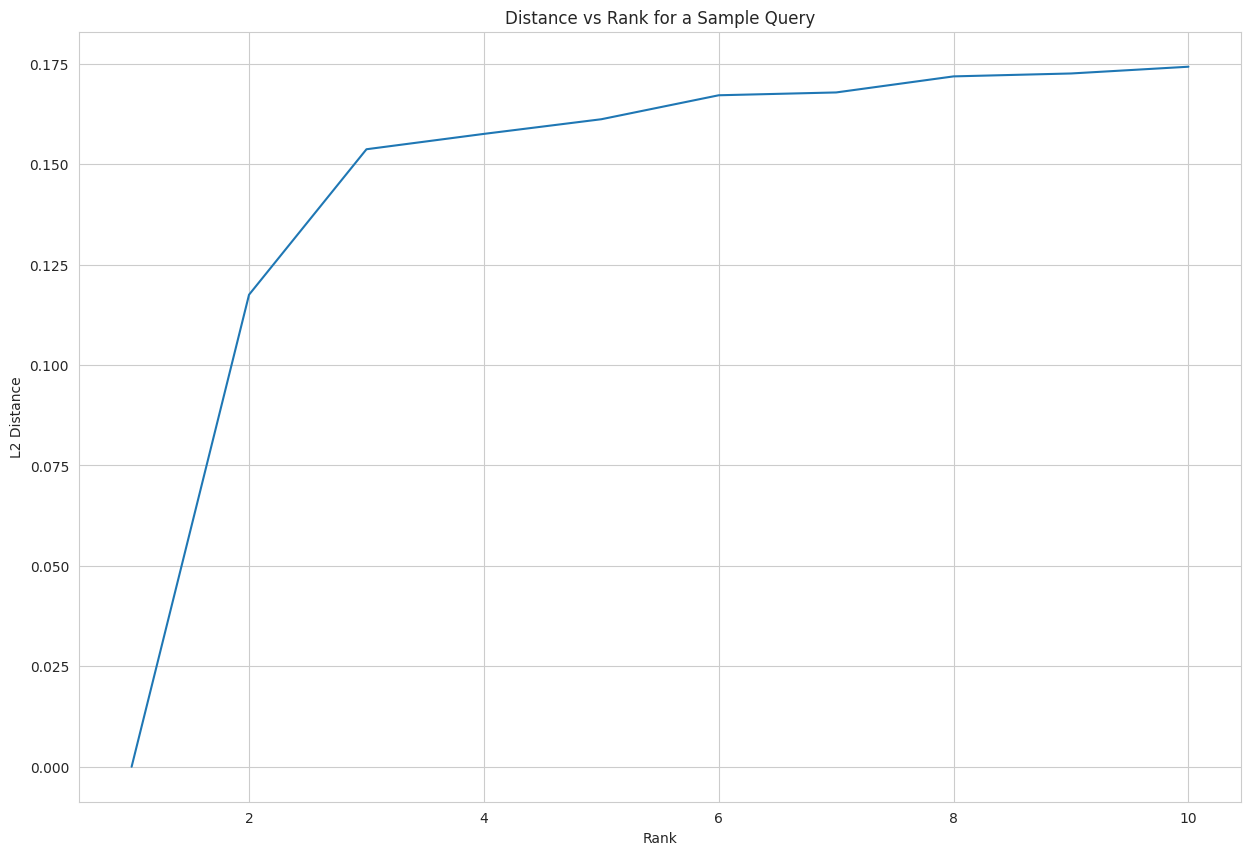

In [235]:
query_idx = 0  # any chunk
distances, indices = index.search(embeddings[query_idx:query_idx+1], 10)

plt.figure()
plt.plot(range(1, 11), distances[0])
plt.xlabel("Rank")
plt.ylabel("L2 Distance")
plt.title("Distance vs Rank for a Sample Query")
plt.show()


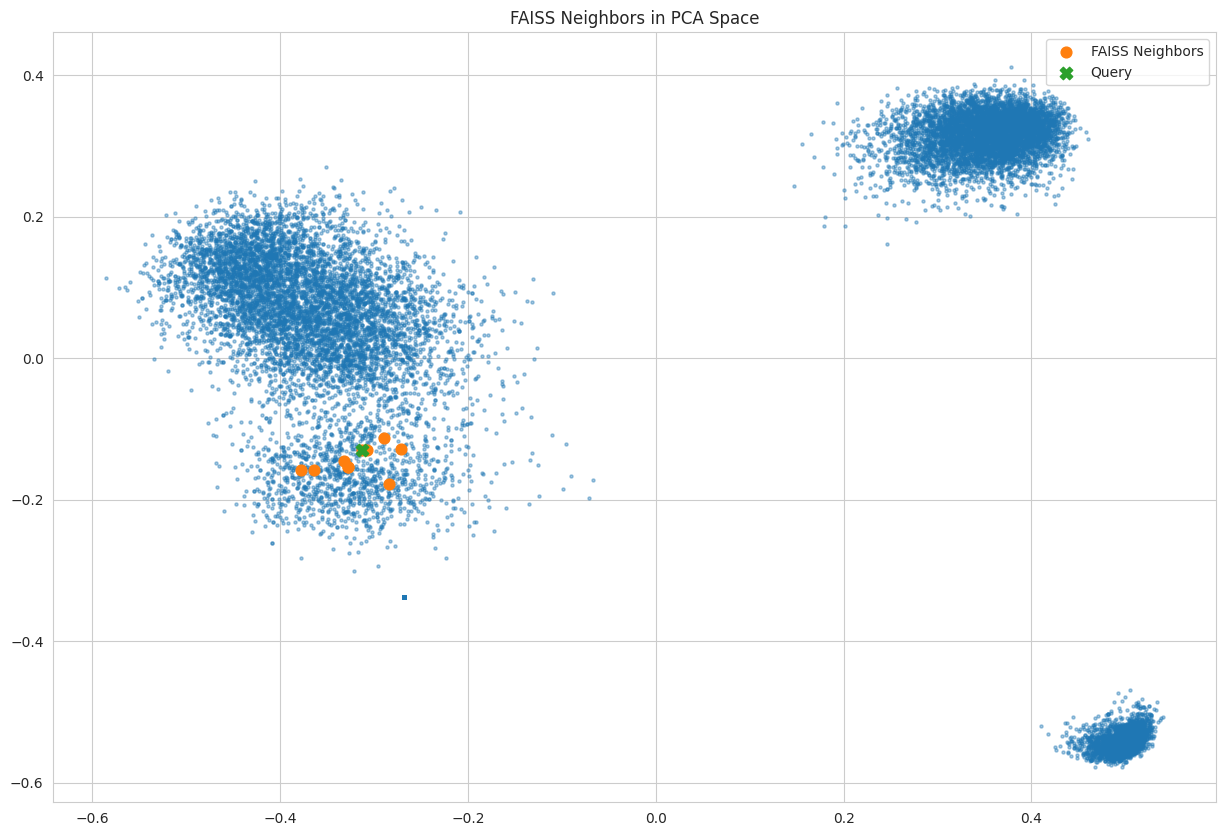

In [236]:
from sklearn.decomposition import PCA

X = embeddings
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

query_id = 10
_, nn_indices = index.search(X[query_id:query_id+1], 10)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, alpha=0.4)
plt.scatter(
    X_pca[nn_indices[0], 0],
    X_pca[nn_indices[0], 1],
    s=60,
    label="FAISS Neighbors"
)
plt.scatter(
    X_pca[query_id, 0],
    X_pca[query_id, 1],
    s=80,
    marker="X",
    label="Query"
)
plt.legend()
plt.title("FAISS Neighbors in PCA Space")
plt.show()


# Implementing MetaDataDB

MetadataDB stores all the user behaviour and their preferences

In [ ]:
important_cols = [
    "Age", "Gender", "fav_music_genre",
    "music_time_slot", "music_Influencial_mood",
    "music_lis_frequency"
]

user_meta = user_df[important_cols].copy()

In [ ]:
# Fill NaN with 'Unknown'
user_meta = user_meta.fillna("Unknown")
print("Missing values handled!")


Missing values handled!


In [ ]:
# Clean categorical text
for col in important_cols:
    user_meta[col] = (
        user_meta[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )


In [ ]:
metadata_db_path = "/content/drive/MyDrive/user_metadata_db.pkl"
user_meta.to_pickle(metadata_db_path)
print(f"User MetadataDB saved at: {metadata_db_path}")

metadata_df = pd.read_pickle(metadata_db_path)
print("Loaded MetadataDB")
metadata_df.head()


User MetadataDB saved at: /content/drive/MyDrive/user_metadata_db.pkl
Loaded MetadataDB


Age  Gender fav_music_genre music_time_slot  \
0  20-35  female          melody           night   
1  12-20    male             rap       afternoon   
2  35-60  others             pop           night   
3  20-35  female          melody           night   
4  20-35  female          melody           night   

                              music_Influencial_mood  \
0                              sadness_or_melancholy   
1                       social_gatherings_or_parties   
2                       relaxation_and_stress_relief   
3  relaxation_and_stress_relief,_social_gathering...   
4                       relaxation_and_stress_relief   

                           music_lis_frequency  
0                                 leisure_time  
1                              workout_session  
2                 study_hours,_while_traveling  
3  office_hours,_workout_session,_leisure_time  
4                                 leisure_time

In [ ]:
def filter_by_metadata(metadata_df, user_query):
    """
    user_query = {
        "fav_music_genre": "melody",
        "music_time_slot": "night",
        "music_Influencial_mood": "sadness"
    }
    """
    df = metadata_df.copy()

    for key, value in user_query.items():
        if value is not None:
            value = value.lower().replace(" ", "_")
            df = df[df[key] == value]

    return df


# Query Embedding & Top 10 Relevant Chunks

Embed the query such a way that for RAG both the query and the song needs to be embedded in order to search the song vector from vector store using FAISS search for the given query vector

In [237]:
!pip install langchain-huggingface sentence-transformers

In [238]:
import re

def clean_query(q):
    # Lowercase
    q = q.lower().strip()

    # Remove unwanted characters (keep alphanumeric + space)
    q = re.sub(r"[^a-z0-9\s]", " ", q)

    # Collapse multiple spaces
    q = re.sub(r"\s+", " ", q)

    return q


In [239]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
import numpy as np
from sentence_transformers import SentenceTransformer

# Load the same embedding model
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

def embed_query_text(query_text):
    cleaned = clean_query(query_text)
    print("Cleaned Query:", cleaned)

    q_emb = embedding_model.embed_query(cleaned)
    q_emb = np.array(q_emb).astype("float32").reshape(1, -1)

    return q_emb


In [240]:
def search_faiss(query_text, index, chunks_df, top_k=5):
    q_emb = embed_query_text(query_text)
    print("Query embedding shape:", q_emb.shape)
    print("Query embedding:", q_emb)

    # Perform FAISS search
    distances, indices = index.search(q_emb, top_k)

    results = []

    for rank, idx in enumerate(indices[0]):
        row = chunks_df.iloc[idx]

        results.append({
            "Rank": rank + 1,
            "FAISS Index": int(idx),
            "Track ID": row["track_id"],
            "Chunk ID": int(row["chunk_id"]),
            "Distance": float(distances[0][rank]),
            "Chunk Text (Preview)": row["chunk_text"][:200] + " ..."
        })

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Styling for readability
    styled = (
        results_df.style
        .set_properties(**{
            "white-space": "pre-wrap",
            "background-color": "#f2f2f2",
            "color": "#000000",
            "border": "1px solid #555",
            "padding": "8px",
            "font-family": "monospace"
        })
        .set_table_styles([
            {"selector": "th", "props": [
                ("background-color", "#3E5879"),
                ("color", "white"),
                ("font-size", "14px"),
                ("padding", "6px")
            ]},
            {"selector": "caption", "props": [
                ("caption-side", "top"),
                ("font-size", "16px"),
                ("font-weight", "bold"),
                ("color", "#333"),
                ("padding", "4px")
            ]}
        ])
        .set_caption("Top FAISS Search Results (Styled Table)")
    )

    display(styled)
    return results_df

In [241]:
query = "calm emotional song with mild beats for night coding"

results = search_faiss(
    query_text=query,
    index=index,
    chunks_df=chunks_df,
    top_k=10
)


Cleaned Query: calm emotional song with mild beats for night coding
Query embedding shape: (1, 384)
Query embedding: [[-1.31601449e-02 -1.30062681e-02  3.60286236e-02  5.20406067e-02
   1.69038996e-02 -3.27078477e-02  3.20269316e-02 -1.09062530e-01
   7.35624693e-03 -8.74493420e-02 -1.58536825e-02 -4.56249975e-02
   2.13210341e-02 -7.27436021e-02  1.87633876e-02  1.05338834e-01
   4.90063503e-02  7.09094182e-02  6.18130080e-02  3.16898823e-02
  -7.63672367e-02  2.93193781e-03 -2.71288902e-02  2.43276414e-02
   3.23022641e-02  6.96227103e-02  2.54892148e-02  2.40725577e-02
   8.86195600e-02 -4.70073111e-02  2.36472916e-02  3.75507027e-02
   1.26060367e-01  2.42054500e-02 -2.63568189e-04 -5.68253500e-03
  -3.53587349e-03  2.01817416e-02 -2.61754543e-02  7.19676688e-02
   4.75440081e-03  5.36678657e-02  3.51177603e-02 -5.64771034e-02
  -7.16913417e-02 -1.10270800e-02 -4.82842922e-02 -9.32434648e-02
  -1.16272513e-02 -4.29183170e-02 -4.70928708e-03 -4.16313373e-02
  -4.25142832e-02  1.8640

# Context Summary using Langchain Groq

In [249]:
!pip install langchain-groq --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Groq API key: set via environment variable GROQ_API_KEY or use the getpass cell below.
# Never commit real API keys to git. See: https://docs.github.com/code-security/secret-scanning

In [250]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [251]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    # model="llama-3.3-70b-versatile",
    temperature=0.3,
    max_tokens=300,
)

In [252]:
# from langchain.schema import HumanMessage
from langchain_core.messages import HumanMessage

def build_context_prompt(query, retrieved_chunks):
    chunks_text = "\n".join(
        [f"- {chunk[:350]}" for chunk in retrieved_chunks]
    )

    prompt = f"""
You are a context distillation system for a music recommendation pipeline.
You will be given multiple retrieved knowledge chunks from a vector database.
Each chunk may represent a different role:

- AUDIO_PROFILE: numerical audio features such as energy, valence, tempo
- LYRICAL_EMOTION: lyrics conveying emotional and semantic meaning
- METADATA: genre, language, popularity, album, or playlist information

IMPORTANT:
- Treat AUDIO_PROFILE as the primary source for energy, tempo, and rhythm
- Treat LYRICAL_EMOTION as the primary source for mood, emotional tone, and complexity
- Treat METADATA only as a soft contextual bias (not a dominant signal)

User Query:
"{query}"

Retrieved Knowledge Chunks:
{chunks_text}

Task:
Infer a rich listening context that represents the user's mental, emotional, auditory,
situational state , activity and time.
Use ONLY the retrieved knowledge.

Output a structured context summary with the following fields:
- Identify dominant patterns and ignore weak or conflicting outliers
- Do not assume information that is not supported by retrieved evidence

AFFECTIVE CONTEXT
- Dominant Mood
- Secondary Mood
- Emotional Valence (low / neutral / high)
- Emotional Complexity (simple / mixed / complex)
- Emotional Stability (stable / fluctuating)

ENERGY & RHYTHM
- Energy Level (low / medium / high)
- Tempo Preference (slow / moderate / fast)
- Rhythmic Consistency (steady / variable)

COGNITIVE & ACTIVITY ALIGNMENT
- Time of Day (morning / afternoon / evening / night / late-night / Not Specified)
- Activity Alignment
- Attention Demand (low / medium / high)
- Cognitive Load Suitability (background / co-focus / foreground)

AUDIO & LYRICAL CHARACTER
- Lyrical Intensity (low / medium / high)
- Narrative Presence (none / abstract / story-driven)
- Vocal Prominence (low / medium / high)
- Instrumentation Density (sparse / moderate / dense)
- Acoustic vs Synthetic Bias

CONTEXTUAL BIASES
- Genre Bias
- Language Bias
- Mainstream vs Niche Bias
- Playlist Intent Bias

Rules:
- Do NOT recommend songs
- Do NOT mention track names or artists
- Do NOT add external knowledge
- Infer Time of Day ONLY if supported by context
- Be concise, factual, and consistent

Output format: plain text, one field per line.
"""
    return prompt.strip()


In [253]:
def extract_context_with_groq(query, results_df):
    # retrieved_chunks = results_df["Chunk Text (Preview)"].tolist()

    # prompt = build_context_prompt(query, retrieved_chunks)
    aggregated = aggregate_chunks(results_df)
    aggregated_context = build_aggregated_context(aggregated)

    prompt = build_context_prompt(query, [aggregated_context])


    response = llm.invoke([
        HumanMessage(content=prompt)
    ])

    return response.content


In [254]:
def detect_chunk_role(text):
    text = text.lower()
    if "danceability" in text or "energy:" in text or "valence:" in text:
        return "AUDIO_PROFILE"
    elif "lyrics" in text:
        return "LYRICAL_EMOTION"
    else:
        return "METADATA"


In [255]:
def aggregate_chunks(results_df):
    aggregated = {
        "audio_chunks": [],
        "lyric_chunks": [],
        "metadata_chunks": [],
        "tracks_seen": set()
    }

    for _, row in results_df.iterrows():
        chunk_text = row["Chunk Text (Preview)"]
        role = detect_chunk_role(chunk_text)

        aggregated["tracks_seen"].add(row["Track ID"])

        if role == "AUDIO_PROFILE":
            aggregated["audio_chunks"].append(chunk_text)
        elif role == "LYRICAL_EMOTION":
            aggregated["lyric_chunks"].append(chunk_text)
        else:
            aggregated["metadata_chunks"].append(chunk_text)

    return aggregated


In [256]:
def build_aggregated_context(aggregated):
    sections = []

    if aggregated["audio_chunks"]:
        sections.append(
            "AUDIO_PROFILE EVIDENCE:\n" +
            "\n".join(f"- {c[:300]}" for c in aggregated["audio_chunks"])
        )

    if aggregated["lyric_chunks"]:
        sections.append(
            "LYRICAL_EMOTION EVIDENCE:\n" +
            "\n".join(f"- {c[:300]}" for c in aggregated["lyric_chunks"])
        )

    if aggregated["metadata_chunks"]:
        sections.append(
            "METADATA EVIDENCE:\n" +
            "\n".join(f"- {c[:300]}" for c in aggregated["metadata_chunks"])
        )

    sections.append(
        f"\nTRACK COVERAGE:\n- Unique tracks referenced: {len(aggregated['tracks_seen'])}"
    )

    return "\n\n".join(sections)


In [77]:
# query = "calm but slightly energetic music for late night coding"
query = "Suggest energetic songs for workout with positive lyrics."

results_df = search_faiss(
    query_text=query,
    index=index,
    chunks_df=chunks_df,
    top_k=5
)

context_summary = extract_context_with_groq(query, results_df)


Cleaned Query: suggest energetic songs for workout with positive lyrics 
Query embedding shape: (1, 384)
Query embedding: [[-1.47317341e-02  1.71895213e-02  6.58365607e-04  7.12409914e-02
   7.98689376e-04  4.68444526e-02  1.12770028e-01 -4.54715565e-02
   8.64841044e-03 -6.92143068e-02 -7.73631362e-03  2.18052715e-02
   2.68885810e-02 -5.09315506e-02  8.61619487e-02  4.03332487e-02
   4.08809260e-02  4.52008918e-02 -1.85508339e-03 -2.73989402e-02
  -1.39531065e-02  6.27467185e-02  3.14792246e-02  7.52199814e-02
   1.81729645e-02  6.00915737e-02 -1.75860636e-02  6.26981482e-02
  -7.27481267e-04  2.73545682e-02 -3.26413214e-02 -2.03114208e-02
   5.79539351e-02 -7.93774705e-03 -1.13738645e-02  9.85173136e-02
  -4.35611010e-02  5.03640547e-02 -5.14998697e-02  2.80452892e-02
  -2.70879585e-02  2.35554129e-02  3.15086022e-02  8.92815832e-03
  -3.69808078e-02 -3.28646488e-02 -1.66042354e-02 -5.36623895e-02
   2.48359665e-02  2.25048400e-02 -3.12627256e-02 -6.63023070e-02
   4.96037155e-02 -5

In [78]:
print("\n=== LLM-DERIVED CONTEXT SUMMARY ===\n")
print(context_summary)


=== LLM-DERIVED CONTEXT SUMMARY ===

**AFFECTIVE CONTEXT**
Dominant Mood: Positive
Secondary Mood: Energetic
Emotional Valence: High
Emotional Complexity: Mixed
Emotional Stability: Fluctuating

**ENERGY & RHYTHM**
Energy Level: High
Tempo Preference: Fast
Rhythmic Consistency: Variable

**COGNITIVE & ACTIVITY ALIGNMENT**
Time of Day: Not Specified
Activity Alignment: Workout
Attention Demand: High
Cognitive Load Suitability: Foreground

**AUDIO & LYRICAL CHARACTER**
Lyrical Intensity: High
Narrative Presence: None
Vocal Prominence: Medium
Instrumentation Density: Moderate
Acoustic vs Synthetic Bias: Acoustic

**CONTEXTUAL BIASES**
Genre Bias: Not Specified
Language Bias: Not Specified
Mainstream vs Niche Bias: Not Specified
Playlist Intent Bias: Workout


In [79]:
import pandas as pd

def parse_context_summary(context_summary: str):
    rows = []
    current_section = None

    for line in context_summary.split("\n"):
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Detect section headers (ALL CAPS)
        if line.isupper():
            current_section = line.replace("&", "AND").title()
            continue

        # Detect key-value pairs
        if ":" in line and current_section is not None:
            key, value = line.split(":", 1)
            rows.append({
                "Category": current_section,
                "Attribute": key.strip(),
                "Value": value.strip()
            })

    return pd.DataFrame(rows)


In [81]:
def display_context_table(context_summary):
    df = parse_context_summary(context_summary)

    styled = (
        df.style
        .set_properties(**{
            "border": "1px solid #555",
            "padding": "8px",
            "font-family": "Arial",
            "font-size": "14px"
        })
        .set_table_styles([
            {"selector": "th", "props": [
                ("background-color", "#2C3E50"),
                ("color", "white"),
                ("font-weight", "bold"),
                ("text-align", "center")
            ]},
            {"selector": "caption", "props": [
                ("font-size", "18px"),
                ("font-weight", "bold"),
                ("margin-bottom", "10px")
            ]}
        ])
        .set_caption("LLM-Derived Context Summary")
    )

    return styled


In [82]:
display_context_table(context_summary)


#Context Summary to vector

In [ ]:
import re

def context_summary_to_sentences(context_summary: str):
    """
    Parse LLM context summary into clean sentences for embedding.
    Strips markdown formatting and normalizes section headers.
    """
    sentences = []
    current_section = None

    for line in context_summary.split("\n"):
        line = line.strip()
        if not line:
            continue

        # Remove markdown bold / asterisks
        line = re.sub(r'\*\*', '', line)

        # Detect section headers (all caps OR capitalized words ending with "Context" or "&")
        if re.match(r'^[A-Z][A-Za-z\s&]+$', line):
            current_section = line.title()
            continue

        # Key: Value lines
        if ":" in line and current_section is not None:
            key, value = line.split(":", 1)
            sentence = f"{current_section} - {key.strip()}: {value.strip()}"
            sentences.append(sentence)

    return sentences

# Example usage
sentences = context_summary_to_sentences(context_summary)
for s in sentences:
    print(s)


Affective Context - Dominant Mood: Positive
Affective Context - Secondary Mood: Energetic
Affective Context - Emotional Valence: High
Affective Context - Emotional Complexity: Mixed
Affective Context - Emotional Stability: Fluctuating
Energy & Rhythm - Energy Level: High
Energy & Rhythm - Tempo Preference: Fast
Energy & Rhythm - Rhythmic Consistency: Variable
Cognitive & Activity Alignment - Time of Day: Not Specified
Cognitive & Activity Alignment - Activity Alignment: Workout
Cognitive & Activity Alignment - Attention Demand: High
Cognitive & Activity Alignment - Cognitive Load Suitability: Foreground
Audio & Lyrical Character - Lyrical Intensity: High
Audio & Lyrical Character - Narrative Presence: Abstract
Audio & Lyrical Character - Vocal Prominence: Medium
Audio & Lyrical Character - Instrumentation Density: Moderate
Audio & Lyrical Character - Acoustic vs Synthetic Bias: Acoustic
Contextual Biases - Genre Bias: Not Specified
Contextual Biases - Language Bias: Not Specified
Conte

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.preprocessing import normalize

# Step 1: Load pretrained embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Step 2: Convert sentences to embeddings
sentence_embeddings = model.encode(sentences, convert_to_numpy=True)

print("Number of sentences:", len(sentences))
print("Embedding dimension:", sentence_embeddings.shape[1])

# Step 3: Aggregate sentence embeddings into one context vector
# Mean pooling (standard for multiple sentences)
context_vector = np.mean(sentence_embeddings, axis=0)

print("Aggregated context vector shape:", context_vector.shape)
print("Vector preview (first 10 values):", context_vector[:10])

# Step 4: Normalize the vector (optional but recommended for similarity search)
context_vector_norm = normalize(context_vector.reshape(1, -1))[0]

print("Normalized vector preview (first 10 values):", context_vector_norm[:10])


Number of sentences: 21
Embedding dimension: 384
Aggregated context vector shape: (384,)
Vector preview (first 10 values): [ 0.04933415 -0.03715925  0.00856256 -0.00459368  0.01804807  0.04260991
  0.07732937 -0.01734375  0.04822758 -0.02722946]
Normalized vector preview (first 10 values): [ 0.08262325 -0.06223311  0.01434031 -0.00769334  0.03022633  0.07136171
  0.12950875 -0.02904676  0.08077    -0.04560303]


In [ ]:
# context_vector_rounded = np.round(context_vector_norm,3)
# print(context_vector_rounded)
context_vector_rounded = np.round(context_vector_norm, 3)
context_vector_rounded[np.abs(context_vector_rounded) < 1e-3] = 0.0
print(context_vector_rounded)


[ 0.083 -0.062  0.014 -0.008  0.03   0.071  0.13  -0.029  0.081 -0.046
 -0.014 -0.041 -0.012 -0.015  0.105  0.008  0.088 -0.011 -0.066  0.007
 -0.041  0.035  0.039  0.034  0.012  0.054 -0.011  0.04   0.05  -0.036
  0.016  0.113  0.109 -0.008 -0.049  0.096 -0.054  0.041 -0.014  0.014
 -0.032  0.024  0.032 -0.023 -0.01  -0.05  -0.063 -0.028 -0.056 -0.018
 -0.094 -0.027  0.004  0.036 -0.012  0.08   0.061  0.127  0.067  0.028
 -0.024 -0.095 -0.061  0.042  0.08   0.016 -0.046  0.011 -0.068  0.029
  0.008 -0.034  0.015 -0.04   0.038  0.012  0.002 -0.083  0.044 -0.069
  0.07  -0.043 -0.005 -0.069  0.002 -0.065  0.031  0.011 -0.063  0.06
 -0.056 -0.084  0.009  0.012  0.075  0.04  -0.058 -0.026 -0.031  0.077
  0.054  0.072 -0.046  0.075 -0.032 -0.105 -0.003  0.056 -0.033 -0.025
 -0.071 -0.021 -0.005  0.018  0.05  -0.014  0.033  0.052  0.036  0.037
  0.036 -0.018 -0.02  -0.027 -0.006 -0.063 -0.076  0.     0.007 -0.043
  0.077  0.092  0.028 -0.024 -0.101 -0.059  0.08   0.004  0.02   0.148
 -0.049

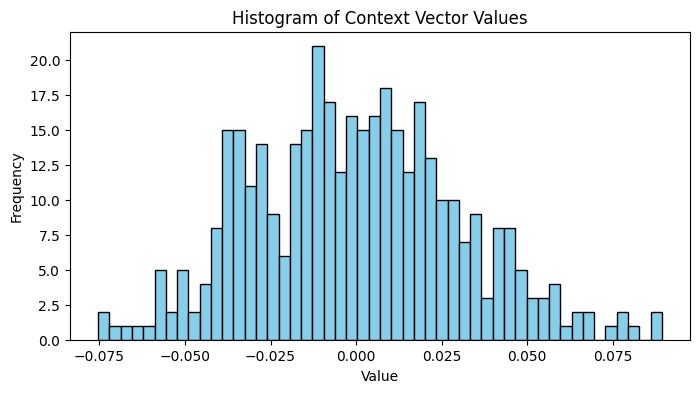

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(context_vector, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Context Vector Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


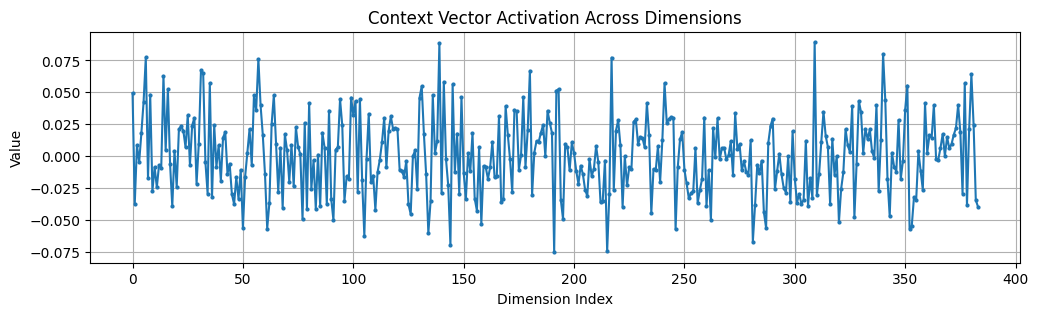

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(context_vector, marker='o', markersize=2)
plt.title("Context Vector Activation Across Dimensions")
plt.xlabel("Dimension Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


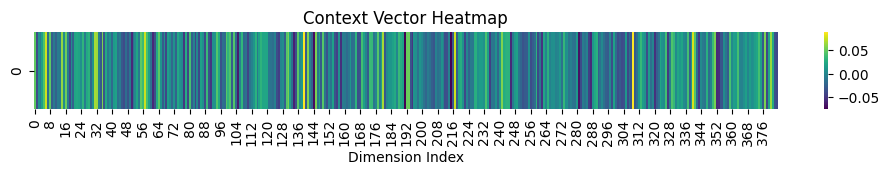

In [ ]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,1))
sns.heatmap(context_vector.reshape(1, -1), cmap="viridis", cbar=True)
plt.title("Context Vector Heatmap")
plt.xlabel("Dimension Index")
plt.show()



#90+ queries to Context Vector


In [257]:
import re
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

# 1️⃣ List of queries (add your 6 queries here, including paradoxical ones)
queries = [
    "Suggest energetic songs for workout with positive lyrics.",
    "Calm but slightly energetic music for late night coding.",
    "Soft acoustic songs to relax after work.",
    "High-energy party music with uplifting vibes.",
    "Melancholic songs with deep emotional lyrics.",
    "Songs that mix upbeat rhythms with sad themes.",
    "Instrumental music with high energy and steady rhythm.",
    "Relaxing music with subtle beats for evening focus.",
    "Motivational songs with strong bass and positive themes.",
    "Low-energy music with comforting emotional tone.",
    "Fast-paced electronic music for intense workouts.",
    "Calm music with inspiring lyrics for night-time reflection.",
    "Upbeat songs with minimal vocals for productivity.",
    "Soft piano music with emotional warmth.",
    "Energetic music that feels calm and controlled.",
    "Sad songs that still feel motivating.",
    "Music with uplifting lyrics but slow tempo.",
    "Aggressive workout music with empowering messages.",
    "Peaceful ambient music with rhythmic undertones.",
    "High-tempo songs suitable for running sessions.",
    "Chill music with light energy for coding.",
    "Emotional acoustic songs with hopeful lyrics.",
    "Background music for long study sessions.",
    "Energetic pop music with clean, positive lyrics.",
    "Dark-themed songs with fast beats.",
    "Relaxing instrumental music for late-night work.",
    "Songs with mixed emotions and upbeat tempo.",
    "Minimalist music with consistent rhythm for focus.",
    "Happy songs with low energy and soft vocals.",
    "Energetic tracks with abstract or non-linear lyrics.",
    "Music that feels nostalgic but motivating.",
    "Slow songs with emotionally powerful lyrics.",
    "High-energy music with no lyrical distraction.",
    "Calm electronic music with steady pulse.",
    "Songs that feel joyful but introspective.",
    "Workout music with strong rhythm and minimal melody.",
    "Light music for background listening during reading.",
    "Emotionally intense songs with moderate tempo.",
    "Fast music that still feels emotionally neutral.",
    "Songs that balance sadness with hope.",
    "Instrumental tracks with dense layering.",
    "Peaceful music with slight energy lift.",
    "Energetic indie songs with reflective lyrics.",
    "Low-tempo music with positive affirmations.",
    "High-energy tracks designed for endurance workouts.",
    "Calm songs with abstract vocal textures.",
    "Music with fluctuating energy but stable mood.",
    "Songs that feel uplifting despite minor keys.",
    "Ambient music with rhythmic consistency.",
    "Emotional songs suited for solo listening.",
    "Upbeat music with complex emotional tone.",
    "Relaxing songs with gentle motivational themes.",
    "Fast-paced music with controlled emotional intensity.",
    "Background music with low cognitive demand.",
    "Songs that sound calm but feel energizing.",
    "Instrumental workout music with steady beats.",
    "Melancholic music with subtle rhythmic drive.",
    "Music for focused work with emotional neutrality.",
    "High-energy songs with emotional simplicity.",
    "Calm music with narrative-driven lyrics.",
    "Songs with energetic rhythm and reflective mood.",
    "Relaxed music with slight motivational lift.",
    "Emotionally stable songs with medium tempo.",
    "Fast songs with emotionally abstract lyrics.",
    "Music that supports long-duration concentration.",
    "Uplifting songs with restrained instrumentation.",
    "Low-energy tracks with emotional clarity.",
    "Energetic music designed for repetitive tasks.",
    "Songs with mixed emotional signals.",
    "Instrumental music with high tempo and low intensity.",
    "Peaceful songs with subtle rhythmic motion.",
    "Motivational music with minimal emotional complexity.",
    "Songs that feel calm despite fast tempo.",
    "Emotional music suitable for late-night focus.",
    "High-energy music with consistent rhythm patterns.",
    "Relaxing songs with optimistic undertones.",
    "Music that blends focus and emotional warmth.",
    "Fast-paced songs with low lyrical intensity.",
    "Calm background music with steady energy.",
    "Energetic tracks with emotionally neutral lyrics.",
    "Songs that support both movement and focus.",
    "Low-intensity music with positive mood.",
    "High-tempo music with emotional restraint.",
    "Instrumental songs with motivational rhythm.",
    "Music that feels balanced between calm and energy.",
    "Emotionally uplifting music for solo workouts.",
    "Relaxed songs with slight rhythmic emphasis.",
    "Fast music designed for mental stimulation.",
    "Peaceful tracks with emotional stability.",
    "Songs that mix motivation with introspection.",
    "Music suitable for sustained physical activity.",
    "Calm songs that maintain listener alertness.",
    "Energetic music with controlled emotional range.",
    "Background music with rhythmic predictability.",
    "Songs that feel emotionally light and energetic.",
    "Low-energy music with narrative abstraction.",
    "High-energy songs with minimal emotional variance."

]

# 2️⃣ Load embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# 3️⃣ Function to convert LLM context summary to clean sentences
def context_summary_to_sentences(context_summary: str):
    sentences = []
    current_section = None
    for line in context_summary.split("\n"):
        line = line.strip()
        if not line:
            continue
        line = re.sub(r'\*\*', '', line)
        if re.match(r'^[A-Z][A-Za-z\s&]+$', line):
            current_section = line.title()
            continue
        if ":" in line and current_section is not None:
            key, value = line.split(":", 1)
            sentence = f"{current_section} - {key.strip()}: {value.strip()}"
            sentences.append(sentence)
    return sentences

# 4️⃣ Store all query vectors
query_vectors = {}

for query in queries:
    # FAISS retrieval
    results_df = search_faiss(query_text=query, index=index, chunks_df=chunks_df, top_k=5)

    # Extract context from LLM
    context_summary = extract_context_with_groq(query, results_df)

    # Convert context summary → sentences
    sentences = context_summary_to_sentences(context_summary)

    # Convert sentences → embeddings
    sentence_embeddings = model.encode(sentences, convert_to_numpy=True)

    # Aggregate embeddings → single vector
    context_vector = np.mean(sentence_embeddings, axis=0)

    # Normalize vector
    context_vector_norm = normalize(context_vector.reshape(1, -1))[0]

    # Optionally, round small values for readability
    context_vector_rounded = np.round(context_vector_norm, 3)

    # Store
    query_vectors[query] = context_vector_rounded


Cleaned Query: suggest energetic songs for workout with positive lyrics 
Query embedding shape: (1, 384)
Query embedding: [[-1.47317238e-02  1.71895623e-02  6.58346573e-04  7.12409765e-02
   7.98708003e-04  4.68444526e-02  1.12770036e-01 -4.54715155e-02
   8.64840765e-03 -6.92142919e-02 -7.73630850e-03  2.18052827e-02
   2.68885735e-02 -5.09315766e-02  8.61619338e-02  4.03332263e-02
   4.08808999e-02  4.52008732e-02 -1.85507443e-03 -2.73989215e-02
  -1.39531111e-02  6.27467185e-02  3.14792059e-02  7.52199441e-02
   1.81729645e-02  6.00915700e-02 -1.75860506e-02  6.26981407e-02
  -7.27469218e-04  2.73545627e-02 -3.26413400e-02 -2.03114133e-02
   5.79539165e-02 -7.93773122e-03 -1.13738915e-02  9.85172763e-02
  -4.35610972e-02  5.03640398e-02 -5.14998659e-02  2.80452650e-02
  -2.70879418e-02  2.35553794e-02  3.15085910e-02  8.92816950e-03
  -3.69808190e-02 -3.28646228e-02 -1.66042317e-02 -5.36623187e-02
   2.48359814e-02  2.25048400e-02 -3.12627517e-02 -6.63022995e-02
   4.96036746e-02 -5

Cleaned Query: calm but slightly energetic music for late night coding 
Query embedding shape: (1, 384)
Query embedding: [[ 1.85021348e-02 -4.92577404e-02  6.00227097e-04  1.94567107e-02
   7.05293671e-04  1.58612728e-02  6.69305846e-02 -7.45366588e-02
   8.64126428e-04 -2.95769144e-02 -6.24467991e-02 -1.00115119e-02
  -2.96509806e-02 -6.38341159e-02  3.15022990e-02  5.17929085e-02
   1.20290354e-01  3.11231893e-02  5.21277823e-02 -1.80709269e-02
  -3.66057977e-02 -2.17105215e-03 -1.71059109e-02  2.84767412e-02
   1.03510916e-01  8.30521807e-02  3.09329852e-02  3.24731320e-02
   7.88299367e-02 -5.46051115e-02 -2.85747796e-02  4.10351008e-02
   1.05897814e-01 -2.06643064e-02 -1.95008609e-02  1.47942384e-03
   5.17329294e-03 -2.18541976e-02 -2.98428796e-02  5.16237915e-02
  -1.52185811e-02  6.95087016e-02  3.60076018e-02 -1.89012960e-02
  -1.04349151e-01 -6.36563003e-02 -4.06427495e-02 -7.70241246e-02
  -3.98786478e-02  1.01692649e-02 -2.42737797e-03 -6.18921258e-02
  -1.19018601e-02  1.

Cleaned Query: soft acoustic songs to relax after work 
Query embedding shape: (1, 384)
Query embedding: [[ 2.16844939e-02 -4.59711626e-02  5.46634980e-02  4.97047156e-02
   5.12139266e-03  3.70204523e-02  6.49966151e-02 -9.46013778e-02
  -2.41589155e-02 -5.85615672e-02 -4.40732688e-02  3.05126216e-02
  -3.09649762e-02 -1.32147456e-02  6.78459601e-03  5.42957857e-02
   7.77592361e-02  5.88861555e-02 -1.71096921e-02 -3.58347461e-04
  -3.26286517e-02  5.85173704e-02 -4.72972952e-02  2.88561583e-02
   7.12561840e-03  5.75412624e-02  4.97642420e-02  1.79336313e-02
   6.60166815e-02 -3.76314111e-02 -2.71730702e-02 -2.01939605e-02
   8.45730677e-02 -4.52601612e-02  2.38420870e-02  3.33941798e-03
  -9.81402863e-03  3.80650759e-02  8.06348585e-03  4.19996912e-03
  -1.10339643e-02  8.63436610e-02  3.96286994e-02 -4.04456258e-02
  -6.16131984e-02 -4.66122404e-02 -2.49582697e-02 -8.92377049e-02
   6.02589436e-02  7.07074702e-02  3.85556407e-02 -4.85937893e-02
   4.06974964e-02 -4.18872153e-03 -2.

Cleaned Query: high energy party music with uplifting vibes 
Query embedding shape: (1, 384)
Query embedding: [[-5.49619980e-02 -4.45099501e-03  6.60240799e-02 -7.65860826e-03
  -2.98594162e-02  8.38756040e-02  4.96561751e-02 -8.23332742e-02
   2.74845753e-02 -7.15847388e-02 -2.57389322e-02  6.20080233e-02
  -2.12775562e-02 -8.37112144e-02  9.93971676e-02  9.68114138e-02
   1.37795791e-01  2.83306241e-02 -1.55443447e-02 -1.58094782e-02
  -6.90639466e-02 -7.25817084e-02 -6.71698228e-02  5.43093756e-02
   5.46147898e-02  6.02508038e-02  8.49420845e-04  6.46044090e-02
   2.07369681e-02 -2.07386110e-02  6.44717813e-02  7.33620599e-02
  -3.29635926e-02 -3.02863456e-02  1.38948148e-03  5.91440722e-02
  -3.74964140e-02  6.41361519e-04 -2.62025706e-02  5.17365448e-02
  -2.38658115e-02  4.75280136e-02  2.34114584e-02  1.52352061e-02
  -5.38678020e-02 -5.51222265e-02 -2.39826050e-02 -4.41736728e-02
   3.54567878e-02  8.17199424e-03  3.30962054e-02 -1.72611270e-02
   2.87050903e-02  2.99618915e-0

Cleaned Query: melancholic songs with deep emotional lyrics 
Query embedding shape: (1, 384)
Query embedding: [[-1.70646247e-03 -5.14169596e-02  7.62438551e-02  2.76263077e-02
   7.62012135e-03  1.94459707e-02  3.44364904e-02 -5.58475256e-02
   6.92246705e-02 -5.30362576e-02 -5.83046535e-03 -3.12103331e-02
   1.37198088e-03 -2.05457378e-02  8.63132707e-04  1.22504704e-01
  -1.56886242e-02  7.81316385e-02 -9.06989425e-02 -3.42744440e-02
  -7.73220584e-02  7.66476393e-02 -6.31525815e-02  1.88981947e-02
   3.70193869e-02  4.66785729e-02  4.97159250e-02  2.45848522e-02
  -3.47068645e-02  2.05913354e-02  2.71388590e-02  1.21737896e-02
   8.62852037e-02  1.87477451e-02  3.73564847e-02 -4.42666113e-02
  -9.68821198e-02  5.01561388e-02 -5.01751062e-03  5.01447823e-03
   8.83363187e-03  3.93482298e-02  1.53042534e-02 -5.45922890e-02
  -3.72947752e-02 -9.68921334e-02 -4.50950973e-02 -7.46338367e-02
   6.19043633e-02  2.12792847e-02 -1.28499055e-02  2.41831076e-04
  -1.71631705e-02  4.84811664e-0

Cleaned Query: songs that mix upbeat rhythms with sad themes 
Query embedding shape: (1, 384)
Query embedding: [[ 3.84434722e-02 -6.39856514e-03  5.25102168e-02  6.09370731e-02
   1.84124503e-02  3.97213623e-02  4.06892300e-02 -1.26765966e-01
   9.49948877e-02 -1.17483802e-01 -5.58436736e-02  5.74921370e-02
   2.30789348e-03 -5.47465570e-02  1.77619867e-02  6.91887438e-02
  -2.59410124e-02  1.07027605e-01  3.24028246e-02  3.34880799e-02
  -1.05064295e-01  3.85674872e-02 -1.08034082e-01  3.63328196e-02
  -2.52396539e-02  3.25047523e-02  4.10985649e-02  3.66372168e-02
  -3.17799225e-02  2.84940898e-02 -2.08932720e-02  4.17734608e-02
   5.96146956e-02 -2.73522176e-03 -3.94741893e-02 -2.15586461e-02
  -6.09178096e-02  4.08417806e-02 -4.56726179e-02  3.51777785e-02
   3.99395488e-02  9.98040214e-02  1.49055412e-02 -3.62270400e-02
  -6.18026368e-02 -7.63668716e-02 -2.80157104e-02 -8.09974521e-02
  -2.21107937e-02 -4.30995459e-03 -2.51775011e-02  3.70974317e-02
  -3.92801166e-02  1.77517794e-

Cleaned Query: instrumental music with high energy and steady rhythm 
Query embedding shape: (1, 384)
Query embedding: [[-1.49736796e-02 -1.62381530e-02  3.40641998e-02 -3.14625120e-03
  -1.15782954e-01  7.89937973e-02  1.61202047e-02 -7.59670287e-02
   2.81162541e-02 -3.98745202e-02 -3.36710811e-02  3.19791585e-02
  -3.78877409e-02 -7.21572340e-02  6.52895644e-02  2.78535131e-02
   8.05040970e-02  4.64610495e-02  3.52715366e-02 -4.00560834e-02
  -7.20878839e-02 -4.26044762e-02  1.65095609e-02  2.99911238e-02
   4.73655015e-02  3.67737822e-02 -1.69788580e-02  1.14548281e-01
   7.96364918e-02 -5.06346151e-02 -8.49362742e-03  5.31715117e-02
  -1.30985444e-02 -1.32491030e-02 -6.19846955e-02  4.42869551e-02
  -2.98380498e-02  1.56986378e-02 -7.49356905e-03  9.60626379e-02
   4.94211214e-04  7.28487074e-02  5.98312765e-02 -1.89463869e-02
  -3.57753783e-02 -7.21980333e-02 -6.66403100e-02 -6.16368353e-02
  -6.49520308e-02  9.29208007e-03 -3.58866714e-02 -5.68051301e-02
   2.67202500e-02  8.07

Cleaned Query: relaxing music with subtle beats for evening focus 
Query embedding shape: (1, 384)
Query embedding: [[ 4.02996987e-02 -1.00627234e-02  5.83145097e-02  4.86924723e-02
  -2.83195172e-02  1.99808413e-03  7.26806149e-02 -8.21634531e-02
  -8.23925808e-03 -8.34757239e-02 -5.29181398e-02 -1.46822131e-03
  -1.45301754e-02 -1.00741059e-01  6.08133860e-02  9.47397724e-02
   1.38512269e-01  8.18674192e-02  4.57080044e-02  3.78503427e-02
  -1.43254906e-01 -2.44816374e-02 -1.70906801e-02  4.86931652e-02
  -2.00642291e-02  5.02277575e-02  3.14957462e-02  1.14957970e-02
   7.65230358e-02 -6.46732152e-02  1.09424731e-02  7.99135640e-02
   7.65454099e-02 -2.93958709e-02 -4.40576933e-02  3.82276475e-02
   4.49708514e-02  4.86365259e-02  8.53342749e-03  2.81770062e-03
  -5.01844892e-03  9.32421610e-02  6.25617057e-02 -1.80305652e-02
  -4.86763380e-02 -1.65254679e-02 -2.40268260e-02 -5.52070290e-02
   3.43623050e-02  8.13568383e-03  1.89596938e-03 -6.21473156e-02
  -4.57904208e-03 -1.79878

Cleaned Query: motivational songs with strong bass and positive themes 
Query embedding shape: (1, 384)
Query embedding: [[-2.43741199e-02  9.90501419e-03  5.65003091e-03 -4.06825868e-03
   3.84537652e-02  7.31315389e-02  8.92856345e-02 -9.48157720e-03
  -1.44424550e-02 -4.62200157e-02 -4.46399376e-02  2.77883466e-02
   2.43307017e-02 -3.74139585e-02  4.16339412e-02  3.83470021e-02
   4.19239290e-02  3.42096239e-02 -2.35957336e-02 -3.91722955e-02
  -8.97641554e-02  4.93324883e-02 -3.31045799e-02  1.34108383e-02
  -6.99176714e-02  2.65767463e-02  3.00079100e-02  3.70014273e-02
   9.24105421e-02 -1.75279342e-02  4.87105548e-02  4.99960706e-02
   6.80512488e-02 -7.72071779e-02 -4.14978899e-02  2.72041392e-02
  -2.91688088e-02  5.43860719e-02 -5.65347634e-02  4.25692275e-02
   3.97684891e-03  7.14562163e-02  4.48679104e-02  1.10808769e-02
  -4.07793559e-02 -1.06413402e-01  1.00910943e-03 -5.47607616e-02
  -1.20821251e-02  2.42536068e-02 -2.41858233e-03 -5.17186858e-02
  -1.59793925e-02  1.

Cleaned Query: low energy music with comforting emotional tone 
Query embedding shape: (1, 384)
Query embedding: [[ 4.97530289e-02  5.45496237e-04  8.80823880e-02  5.13359755e-02
  -3.45648490e-02  5.78116104e-02  2.41765510e-02 -6.45528287e-02
   7.71154240e-02 -6.12010583e-02 -1.05868382e-02  1.40657844e-02
   4.52470127e-03 -8.64839107e-02  4.42192368e-02  8.50697756e-02
   9.33216512e-02  7.44476393e-02 -1.64886471e-02  7.65603967e-03
  -8.29748064e-02  2.34038401e-02 -5.04236966e-02  3.73572893e-02
   1.57424547e-02  2.37048045e-02  3.01417578e-02  4.28083502e-02
   3.27670909e-02 -8.58481694e-03  8.30908678e-03  9.39568039e-03
   4.06487323e-02 -6.00162186e-02 -5.98791894e-03  6.51931092e-02
   1.94394458e-02  4.23981324e-02 -4.24511731e-02  7.65220681e-03
  -3.88901792e-02  9.76825655e-02  5.21500818e-02 -1.83825064e-02
  -8.04144964e-02 -7.91258812e-02 -8.97163227e-02 -9.66276675e-02
  -1.15879737e-02 -4.51935530e-02  2.77202781e-02 -2.51432955e-02
  -6.34919330e-02  5.95794171

Cleaned Query: fast paced electronic music for intense workouts 
Query embedding shape: (1, 384)
Query embedding: [[-3.95338098e-03 -2.34969072e-02  5.65066934e-02  2.86208596e-02
  -5.53043447e-02  6.03005737e-02  4.28288430e-02 -4.55906615e-02
   1.35347955e-02 -7.09467083e-02  7.82951154e-03  2.04033311e-02
  -7.47927371e-03 -6.58566803e-02  5.87684773e-02 -2.64633521e-02
   7.08826259e-02  6.43019751e-02  2.38095615e-02 -1.69902463e-02
  -4.37787585e-02  1.25552658e-02  4.64615365e-03  3.31676453e-02
   1.87408961e-02  9.99457985e-02 -1.77888386e-02  2.86413562e-02
   7.75675196e-03 -4.73030284e-02  2.94590574e-02 -1.04033144e-03
   3.59300561e-02 -2.04673260e-02 -1.07100621e-01 -1.44038927e-02
   3.20444512e-03 -1.69693381e-02 -3.61020118e-02 -6.48321677e-03
  -5.62013388e-02  6.62877932e-02  6.99013472e-02 -1.00358354e-03
  -4.01793458e-02 -1.64970905e-02 -2.87717059e-02 -6.06314726e-02
  -5.96665451e-03  2.35741585e-02 -1.28935336e-03 -3.11239380e-02
   7.27180019e-02  4.4330887

Cleaned Query: calm music with inspiring lyrics for night time reflection 
Query embedding shape: (1, 384)
Query embedding: [[ 2.44367085e-02 -1.69564988e-02  6.60252273e-02  1.55897308e-02
  -3.74062988e-03  4.22173366e-02  6.82201013e-02 -7.84814358e-02
   5.85819501e-03 -1.08129509e-01 -4.90310267e-02 -6.72241859e-03
   5.13336100e-02 -7.65749589e-02 -1.11794453e-02  1.26415163e-01
   1.27916813e-01  3.99637520e-02  3.03247031e-02 -3.73588465e-02
  -2.64907293e-02  4.78236824e-02 -8.70021898e-03  5.76916225e-02
   1.06019862e-02  6.81125224e-02  2.05312390e-02  5.12119718e-02
   7.54156485e-02  4.41789627e-03 -2.71654632e-02  6.51201457e-02
   2.18321639e-03 -3.04180793e-02 -8.33639526e-04  4.25994247e-02
  -2.55088601e-02  5.79455979e-02  5.96515182e-03  3.09171155e-02
   4.16889563e-02  4.15491574e-02  2.14257278e-02 -3.99609953e-02
  -6.49126470e-02 -3.63953672e-02 -2.69143339e-02 -6.60570487e-02
   2.03250936e-04 -1.46753872e-02 -1.22579485e-02 -8.53806064e-02
  -3.51681523e-02 

Cleaned Query: upbeat songs with minimal vocals for productivity 
Query embedding shape: (1, 384)
Query embedding: [[-2.40445975e-02  2.95520970e-03 -1.52702527e-02  2.11720876e-02
  -1.29678342e-02  1.78093985e-02  5.03953435e-02 -7.65027627e-02
   1.21854190e-02 -4.54133041e-02 -4.81604487e-02  4.60931137e-02
   4.06467952e-02 -5.77211007e-02  2.06402708e-02  6.28471375e-02
   5.57490587e-02  8.16940516e-02 -1.10119749e-02 -6.65149391e-02
  -1.46065190e-01 -4.72841226e-03 -5.69906756e-02  7.72923902e-02
   7.64817744e-02  6.66215271e-02  5.08334907e-03  4.03457433e-02
   5.03892228e-02 -2.82505024e-02 -5.62934438e-03  1.84587743e-02
   1.45127386e-01 -3.70327607e-02 -7.67572597e-03  8.24188537e-05
   3.27797560e-03  7.78614804e-02 -4.19283984e-03 -5.76886050e-02
   2.67657600e-02  9.63004529e-02  1.39650181e-02 -2.31270865e-02
  -2.67821606e-02 -8.64338130e-02 -5.52321784e-02 -1.18084744e-01
  -2.88358820e-03  3.80311459e-02 -1.37793003e-02 -4.80162688e-02
  -1.72289200e-02 -8.301597

Cleaned Query: soft piano music with emotional warmth 
Query embedding shape: (1, 384)
Query embedding: [[-1.07188765e-02 -5.04557490e-02  4.67679240e-02  4.03820612e-02
  -3.17039783e-04  5.91613390e-02  3.26266214e-02 -6.39037117e-02
   1.38579104e-02  6.06763456e-03 -2.84800921e-02 -4.80003282e-02
   1.94403771e-02 -5.55963926e-02  3.33811305e-02  7.17313141e-02
   4.59612198e-02  3.85851488e-02  2.20565144e-02  2.92228796e-02
  -8.04218203e-02 -1.45784933e-02 -9.59935039e-02 -5.97575940e-02
   2.95079090e-02  5.08963354e-02  6.77560642e-02  4.85923737e-02
   5.65404780e-02 -1.57392900e-02 -1.60693973e-02  1.31067133e-03
   7.78743550e-02 -1.88482646e-02 -1.02980221e-02  4.23514061e-02
  -3.34459580e-02 -1.32593848e-02 -1.14001296e-01  3.51548977e-02
   1.07751824e-02  5.69298938e-02  2.28889883e-02 -2.69105323e-02
  -4.44281399e-02 -3.84619310e-02 -6.13586865e-02 -8.59478265e-02
  -2.96858009e-02 -1.42842438e-02 -2.27466715e-03 -2.08244603e-02
   9.05487221e-03  2.82580871e-02 -3.0

Cleaned Query: energetic music that feels calm and controlled 
Query embedding shape: (1, 384)
Query embedding: [[ 3.54143456e-02 -3.36416364e-02  1.19184749e-02  8.07888955e-02
  -2.82575265e-02  7.02239871e-02  9.46853980e-02 -7.42745996e-02
   2.17008870e-02 -3.43961343e-02 -8.98607424e-04 -3.92042287e-02
   1.01339612e-02 -1.15539223e-01  5.69502339e-02  5.41351661e-02
   1.12997316e-01  1.45921828e-02  1.63080059e-02  1.07953558e-02
  -4.85457815e-02  3.71342488e-02 -9.15662758e-03  4.46947217e-02
  -2.00362876e-02  1.12678990e-01 -3.59817334e-02  7.16184527e-02
   6.27432987e-02 -6.23245798e-02  4.04792912e-02  4.06297343e-03
   3.66889760e-02 -4.09008078e-02 -5.34668043e-02  4.59198616e-02
  -2.40915995e-02 -5.01304213e-03 -1.16729401e-02  4.50573973e-02
  -1.63106807e-02  3.63353603e-02  4.95323688e-02 -5.84238470e-02
  -8.90578181e-02 -3.40928286e-02 -7.43513405e-02 -7.58712515e-02
  -2.32580118e-02  1.02653513e-02 -2.20978949e-02 -7.18365759e-02
   1.15972189e-02  5.41373938e

Cleaned Query: sad songs that still feel motivating 
Query embedding shape: (1, 384)
Query embedding: [[ 8.21721274e-03 -1.38921784e-02  5.83110563e-02  2.83078216e-02
   1.17956899e-01  5.46445176e-02  6.28318340e-02 -1.12011787e-02
   2.87527926e-02 -7.09474534e-02 -4.35754545e-02  3.26122642e-02
   3.75765003e-02 -2.64442451e-02  4.12884168e-03  5.27393818e-02
  -5.05590215e-02  1.61233470e-02 -3.97784337e-02 -3.49495970e-02
  -5.75195663e-02  6.71972036e-02 -9.27518159e-02  6.58317357e-02
  -2.14603869e-03  6.81206658e-02 -1.18083172e-02  1.76297966e-02
  -1.23188947e-03  1.97910853e-02 -2.38455776e-02  5.18256612e-02
   6.56129122e-02 -2.05894485e-02  1.66731309e-02 -3.38878520e-02
  -8.18194598e-02  2.39944886e-02 -6.19975403e-02  1.70818362e-02
   6.44405000e-03  5.17968982e-02  3.89821082e-02 -3.09471320e-02
  -4.35550138e-02 -1.13041587e-01 -1.05756549e-02 -7.75649026e-02
   2.05721296e-02  2.64404584e-02  4.75545414e-02 -5.37033333e-03
  -3.99296023e-02 -2.43185256e-02 -1.467

Cleaned Query: music with uplifting lyrics but slow tempo 
Query embedding shape: (1, 384)
Query embedding: [[ 2.78111943e-03 -2.83959005e-02  6.91849664e-02  1.74032189e-02
   8.19076598e-03  7.64808133e-02 -1.08199911e-02 -8.92362073e-02
   4.66416106e-02 -6.84067309e-02  5.05218655e-03  1.26501797e-02
   9.06744041e-03 -4.20046970e-02  5.60265221e-02  1.00214891e-01
   9.08554494e-02  7.75638074e-02  2.56149261e-03 -2.98232939e-02
  -5.69695979e-02  1.57467499e-02 -1.83940269e-02  5.08375727e-02
  -3.78585309e-02  6.29066816e-03 -8.65320563e-02  4.43233363e-02
   3.19892615e-02 -1.98195241e-02 -3.34969424e-02  1.76823270e-02
   1.96220428e-02  1.20136794e-03 -4.39397134e-02  8.87089446e-02
  -3.64267156e-02  5.44612035e-02  1.69072747e-02  2.76434459e-02
   1.36646582e-02  9.24381986e-02  8.57352931e-03  4.04262692e-02
   4.26774425e-03 -1.48885176e-02 -2.66282838e-02 -2.03383025e-02
   2.85782181e-02 -2.36131661e-02 -2.38097068e-02 -8.63094535e-03
  -1.18480101e-02  1.17698228e-02 

Cleaned Query: aggressive workout music with empowering messages 
Query embedding shape: (1, 384)
Query embedding: [[ 2.67337114e-02  3.70652857e-03  8.42940807e-02  5.98136634e-02
  -3.96580175e-02  4.00232933e-02  7.02154562e-02 -3.61379981e-02
   9.30857193e-03 -8.99598375e-02 -4.12566774e-02  1.74978171e-02
   4.24530506e-02 -5.85176125e-02  7.82520697e-02  5.34416400e-02
   1.27374351e-01  3.95226255e-02 -3.83691350e-03 -1.88149530e-02
  -6.36051744e-02  5.56620881e-02  1.17362356e-02  6.97003305e-02
  -4.35240678e-02  6.80173486e-02 -1.19329887e-02  2.64896993e-02
  -6.69302838e-03 -9.41422582e-03 -6.40954915e-03 -4.83552068e-02
   5.95665500e-02  1.03249075e-02 -9.50387269e-02  2.64735930e-02
   2.16715527e-03  1.57205872e-02 -3.43305878e-02  9.84256528e-03
  -7.26760104e-02  4.25460525e-02  5.62420860e-02 -1.66269764e-02
  -7.20682144e-02 -1.37867890e-02 -3.36851701e-02 -2.16533486e-02
  -3.54051255e-02  2.08011770e-04  1.59765631e-02 -1.03185534e-01
   8.22170451e-02  3.726322

Cleaned Query: peaceful ambient music with rhythmic undertones 
Query embedding shape: (1, 384)
Query embedding: [[ 1.12049961e-02  1.04464125e-02  4.88075502e-02 -1.13502108e-02
  -1.64986718e-02  1.55182984e-02  6.58121109e-02 -7.64789209e-02
   3.21640000e-02 -4.74994257e-02  1.93058047e-02 -5.20932563e-02
   5.03546111e-02 -1.18891723e-01  8.42986032e-02  8.82771686e-02
   1.26471415e-01  7.76455253e-02  1.36000179e-02  4.52508358e-03
  -1.09886646e-01  2.79290304e-02  1.98993199e-02  5.68356737e-02
  -7.15656998e-03  4.14222181e-02  3.41526270e-02  4.36082929e-02
   6.33575469e-02 -4.29434069e-02  4.97071631e-02  6.36811256e-02
   3.65636572e-02 -5.60908094e-02 -2.75475644e-02 -1.10305743e-02
   3.36385220e-02  2.21218709e-02  2.79907696e-03  4.32932749e-02
   1.63264517e-02  8.66976902e-02  4.85266671e-02 -1.32124061e-02
  -6.92638904e-02 -1.62399728e-02 -6.38153628e-02 -9.54800695e-02
  -4.97556552e-02 -7.95589201e-03  5.03125899e-02  4.66442714e-03
  -3.51618789e-02  5.53596392

Cleaned Query: high tempo songs suitable for running sessions 
Query embedding shape: (1, 384)
Query embedding: [[-5.25886472e-03  9.35511850e-03  3.84616782e-03  1.89854875e-02
  -2.28852201e-02  5.50759695e-02  2.60505732e-02 -1.01431072e-01
  -2.33071987e-02 -7.17725158e-02 -3.39452215e-02  4.02910523e-02
  -4.51727249e-02 -7.13305771e-02  9.54776853e-02  1.88669153e-02
   8.47349986e-02  8.86923969e-02  7.57852048e-02  4.93607437e-03
  -4.90145236e-02  8.64219107e-03 -5.54237049e-03  2.94689424e-02
  -7.05480501e-02  5.41928709e-02 -2.49442495e-02 -1.41401831e-02
  -1.25858458e-02 -8.84458330e-03 -1.44869285e-02  3.18847671e-02
   3.37654985e-02 -3.18955258e-02 -4.01449464e-02  3.76090519e-02
   5.17201051e-03  3.41174342e-02 -1.26267159e-02  2.68622898e-02
   2.29948349e-02  8.13088045e-02  2.94622425e-02  3.56650390e-02
  -4.78339717e-02  7.57858506e-04 -2.46127564e-02 -5.32399267e-02
  -3.29608768e-02  7.58647695e-02 -3.23543861e-03 -2.35968325e-02
   5.87139428e-02  7.04102404e

Cleaned Query: chill music with light energy for coding 
Query embedding shape: (1, 384)
Query embedding: [[-2.95603164e-02 -1.45715931e-02 -6.09485433e-02  4.99891452e-02
  -5.22619598e-02  3.00500710e-02  5.15230075e-02 -4.66676056e-02
   1.25361849e-02 -7.33877707e-04  2.41978709e-02 -3.04374378e-02
   3.86876389e-02 -1.06799096e-01  3.25049683e-02  7.34908432e-02
   5.40702604e-02  8.64119381e-02 -2.35770810e-02 -9.86447334e-02
   1.99367329e-02 -5.68901710e-02 -5.45915179e-02  6.51219487e-03
   2.65356340e-02  9.83281732e-02  4.20442224e-03  5.23886681e-02
   4.92348447e-02  1.41962757e-02  4.14973311e-02  2.45686360e-02
   4.45849150e-02 -2.10213795e-04 -2.01456272e-03 -1.20375468e-03
  -1.61626432e-02 -4.56309356e-02 -4.06978838e-02  3.81849073e-02
  -7.93111697e-02  6.41154200e-02  1.35127053e-01 -4.55293385e-03
  -6.13699108e-02 -2.78116744e-02 -5.52369393e-02 -5.29506877e-02
  -6.81465864e-02 -9.95663851e-02  1.17421485e-02 -8.35080743e-02
  -1.02375832e-03  5.38407639e-02 -5

Cleaned Query: emotional acoustic songs with hopeful lyrics 
Query embedding shape: (1, 384)
Query embedding: [[ 8.10320256e-04 -8.15112796e-03  6.03219792e-02  3.56426165e-02
   1.72526725e-02  3.54831591e-02  7.69818276e-02 -4.90912385e-02
   5.86155578e-02 -6.52279779e-02  2.08342653e-02 -1.58411805e-02
   4.16434743e-02 -4.99908328e-02  1.48058273e-02  9.67725888e-02
   6.04683533e-04  3.44219543e-02 -2.26939227e-02  2.87729106e-03
  -7.67827705e-02  8.22992623e-02 -1.08993262e-01 -1.42847421e-02
   2.77634710e-02  5.46704326e-03  2.11769324e-02  6.53623790e-02
   3.42697501e-02  2.88727544e-02 -7.17841228e-03 -6.39016628e-02
   1.03222601e-01 -3.46439220e-02  5.51622659e-02  7.78359547e-03
  -9.50039625e-02  2.41003502e-02 -5.44152036e-02 -1.65323708e-02
   1.99456103e-02  2.47153435e-02  2.46800836e-02 -4.01821695e-02
  -4.02379185e-02 -1.21005312e-01 -1.70174073e-02 -7.20714033e-02
   8.27649515e-03 -8.73860065e-03 -4.10431884e-02 -5.51552922e-02
  -5.46407700e-02 -1.61856879e-0

Cleaned Query: background music for long study sessions 
Query embedding shape: (1, 384)
Query embedding: [[ 8.29871371e-02  1.00642862e-02 -2.36992855e-02 -5.81662171e-03
  -2.53764670e-02  1.17963478e-01 -5.09096719e-02 -3.26041877e-02
   1.39633426e-03 -6.76054284e-02 -2.36892235e-02  8.33444744e-02
  -3.86061557e-02 -5.13263643e-02  1.18464390e-02 -2.21964084e-02
  -4.09084186e-03  1.02537395e-02  4.57687788e-02  1.28708512e-03
  -1.03777789e-01  1.44669376e-02  1.77529398e-02  7.56773204e-02
  -9.43621527e-03  7.23796934e-02  4.63289581e-02 -3.94494534e-02
   7.09078312e-02 -3.47699947e-03 -6.54920423e-03  8.16333592e-02
   7.34730735e-02 -2.65314225e-02 -9.36155096e-02  2.26707719e-02
  -4.39408049e-02  3.11047714e-02 -4.66127880e-02  1.50948605e-02
   6.50097243e-03  9.39347297e-02  4.47118469e-02  1.39957229e-02
  -2.37146877e-02 -6.28486127e-02 -5.90377767e-03 -1.06782503e-01
   4.24286686e-02  8.41387659e-02 -4.47762292e-03 -3.52224112e-02
   2.80071422e-03  2.19130814e-02 -6

Cleaned Query: energetic pop music with clean positive lyrics 
Query embedding shape: (1, 384)
Query embedding: [[-3.69210728e-02 -3.14654340e-03  6.51116148e-02  3.34324203e-02
   1.32218124e-02  5.30095510e-02  1.47172883e-01 -7.58490190e-02
   3.40144150e-02 -4.56968248e-02  3.53650711e-02  8.95650312e-03
   5.57352193e-02 -6.64719790e-02  2.03954335e-02  8.51618946e-02
   7.59200752e-02  2.04417109e-02 -7.63072353e-03 -1.67670995e-02
  -3.67684029e-02  3.46841961e-02  2.11405940e-02  4.51177806e-02
   3.52014229e-02  7.59416893e-02 -2.24713031e-02  8.52599517e-02
   5.97636178e-02 -4.82750079e-03  1.38515290e-02  4.55862768e-02
   8.79660249e-02 -3.92865874e-02 -6.09660009e-03  8.64956006e-02
  -6.07190952e-02  2.52147783e-02  2.92171538e-03  5.97310290e-02
  -4.39822581e-03  3.09298430e-02 -5.90919238e-03 -3.91367003e-02
  -4.05326113e-02 -3.04802153e-02 -5.72023839e-02 -7.47557804e-02
  -6.59582904e-04 -1.11105498e-02  1.95496622e-02 -5.02650328e-02
   1.80555135e-02 -9.37866163e

Cleaned Query: dark themed songs with fast beats 
Query embedding shape: (1, 384)
Query embedding: [[-1.42173944e-02  1.77880023e-02  1.52489496e-02  2.06081234e-02
  -2.66637350e-03  3.60989082e-03  1.74819473e-02 -1.52751654e-01
   2.44176295e-02 -9.71143395e-02 -1.16541516e-02 -4.17181700e-02
  -2.60431133e-02 -1.17107920e-01  1.60371047e-02  6.42207190e-02
   8.61587152e-02  1.41317323e-01 -2.60995305e-03 -4.24213260e-02
  -1.01178266e-01 -4.70942212e-03 -3.93319838e-02  2.42595188e-02
  -4.40013520e-02  3.70197371e-02 -3.20025161e-02  3.49456519e-02
   2.79587153e-02 -8.03244188e-02  2.33841538e-02  7.62216141e-03
   3.38815674e-02  1.36397418e-03 -6.34071305e-02 -2.74435058e-02
   2.22136807e-02  4.89155091e-02 -7.99797755e-03  6.36908486e-02
   2.71776989e-02  5.36899231e-02  7.73368264e-03 -4.27916087e-03
  -8.90146643e-02  1.61771337e-03 -4.26014140e-02 -4.98695523e-02
  -2.73435190e-02 -2.04129945e-02  1.60736591e-02 -3.04419417e-02
  -2.73490194e-02 -3.26827681e-03 -3.739386

Cleaned Query: relaxing instrumental music for late night work 
Query embedding shape: (1, 384)
Query embedding: [[ 4.72766794e-02 -3.27539840e-03  4.57612202e-02  2.51043588e-02
  -3.33817042e-02  5.73154315e-02  4.76136170e-02 -5.31694032e-02
  -5.31854166e-04 -2.86291055e-02 -1.02654397e-01  5.99333383e-02
  -2.34412272e-02 -4.88737086e-03  2.70663407e-02  2.17753481e-02
   1.46005824e-01  4.94801216e-02  4.60902192e-02 -2.37766728e-02
  -5.89419231e-02 -1.34785380e-02 -1.59521084e-02  3.14562805e-02
   7.55160600e-02  3.41130830e-02  6.00212216e-02  2.80496161e-02
   5.36393300e-02 -7.65202418e-02 -4.95401025e-02  8.89106691e-02
   1.70167498e-02 -7.96820596e-02 -1.08665286e-03  2.71685570e-02
  -9.91203263e-03 -2.86506326e-03  3.69931199e-02  3.43185216e-02
   3.43366861e-02  9.79920700e-02  1.01318362e-03 -4.53950353e-02
  -7.21932873e-02 -4.05914485e-02 -2.54414789e-02 -6.86932206e-02
   3.65178436e-02  5.85512482e-02  3.31383161e-02 -1.87694412e-02
   1.47968885e-02  1.78038124

Cleaned Query: songs with mixed emotions and upbeat tempo 
Query embedding shape: (1, 384)
Query embedding: [[-2.03986410e-02 -8.73499084e-03  4.06048335e-02  2.36693677e-02
   3.05769723e-02  1.78074874e-02  6.82578161e-02 -1.58768535e-01
   5.16301282e-02 -9.75735784e-02  4.25151922e-03 -1.97937563e-02
  -2.62215314e-03 -6.50880039e-02  4.30858806e-02  8.70098174e-02
   1.65422950e-02  8.22313577e-02  3.69917750e-02  1.64319854e-02
  -1.10654980e-01  7.12065678e-03 -1.05759963e-01  1.34802405e-02
  -2.76229475e-02  6.03600293e-02  2.10753810e-02  5.40660806e-02
   7.00610410e-03 -2.33212654e-02  1.91237852e-02  7.64240324e-02
   9.46460292e-02  6.59832126e-03 -8.09155405e-02 -1.92665160e-02
  -6.08127639e-02  4.33405973e-02 -6.69544144e-03  5.49420901e-02
   4.51127016e-05  6.77688271e-02  9.04452335e-03 -1.68548692e-02
  -3.59634422e-02 -4.72614318e-02 -3.46231088e-02 -8.39964002e-02
  -9.86164343e-03  4.68662232e-02 -1.87154636e-02  1.14120936e-04
  -3.23433615e-02  1.19244186e-02 

Cleaned Query: minimalist music with consistent rhythm for focus 
Query embedding shape: (1, 384)
Query embedding: [[ 5.68397604e-02 -5.85601144e-02  5.22577465e-02 -5.79602420e-02
  -2.62901150e-02  8.37218240e-02  7.79269636e-02 -2.91086938e-02
   1.78263858e-02 -5.30796088e-02 -1.43011846e-02  1.92987360e-02
   2.79320171e-03 -6.63471520e-02 -1.01203728e-03  4.22532000e-02
   6.68491423e-02  9.29867923e-02  4.93582673e-02 -3.41616422e-02
  -1.16012327e-01 -2.77612600e-02 -1.47008486e-02  2.27021612e-02
  -5.36596589e-02  5.13991900e-02 -3.06663793e-02  3.20020653e-02
   7.12289810e-02 -5.15777767e-02  2.93346867e-02  2.41301320e-02
   8.25303271e-02 -2.08507236e-02 -3.35384272e-02  5.02625480e-02
  -5.92754595e-03  2.57267300e-02 -3.49466540e-02 -5.62543841e-03
   3.17362361e-02  1.34233803e-01  2.15331763e-02  1.41931446e-02
  -3.81005108e-02 -1.92689691e-02 -1.64085459e-02 -6.37746453e-02
  -8.65855515e-02 -6.59550074e-03 -5.44878766e-02 -6.84286887e-03
  -2.24086307e-02 -1.391591

Cleaned Query: happy songs with low energy and soft vocals 
Query embedding shape: (1, 384)
Query embedding: [[-3.32860723e-02 -5.75139595e-04  2.75889784e-02  1.11354068e-02
   8.97230487e-03 -9.59445816e-03  9.06465128e-02 -4.63273190e-02
   2.78124791e-02 -1.37310326e-02  3.38860154e-02 -4.51277308e-02
   3.51888277e-02 -3.95218916e-02  3.49047855e-02  8.12141374e-02
   7.68581852e-02  7.99049959e-02 -5.00875041e-02  2.40350030e-02
  -7.72736073e-02 -2.54432093e-02 -4.45275307e-02  4.62802015e-02
   1.17199086e-02  3.21582407e-02  6.85892446e-05  3.76110040e-02
   7.37980753e-02 -7.09418505e-02 -3.02281659e-02  6.46799756e-03
   7.64023662e-02 -2.50826664e-02  2.95794569e-02  3.87430824e-02
  -3.40013998e-04  3.62736546e-02 -1.55604864e-02 -1.46768531e-02
   7.74530787e-03  8.52177963e-02  4.11433019e-02  2.20505684e-03
  -7.80847445e-02 -8.16827193e-02 -1.21502569e-02 -6.91942200e-02
  -6.71174470e-03  1.81206595e-02  2.20689108e-03 -4.64083403e-02
  -1.76571570e-02  5.54351090e-03

Cleaned Query: energetic tracks with abstract or non linear lyrics 
Query embedding shape: (1, 384)
Query embedding: [[-5.80433011e-02 -2.58287601e-02  6.76969346e-03  4.99253906e-02
   2.18110369e-03  5.68031222e-02  2.60119103e-02 -8.94579664e-02
   1.52044706e-02 -6.71345592e-02  6.48098765e-03 -1.33979227e-02
   7.59995950e-04 -3.86316255e-02  2.40183976e-02  1.16245344e-01
   1.85580105e-02  7.99954012e-02 -7.69455172e-03 -9.90929361e-03
   1.12488661e-02  2.69177817e-02 -1.54263815e-02  6.25561029e-02
   7.96688870e-02  9.58469808e-02 -7.81649053e-02  1.05155177e-01
   8.05215091e-02 -1.06680207e-02  4.40045632e-03  2.91219875e-02
   5.47174700e-02  1.71859544e-02  4.28034924e-02  6.81135207e-02
  -5.35292700e-02  4.02545631e-02 -1.77261904e-02  5.52174039e-02
   1.33396387e-02  4.10101451e-02  1.02449320e-02  4.45919437e-03
   2.80259028e-02 -1.85095333e-02 -7.50847086e-02 -1.12052351e-01
  -2.84957606e-02  5.96182831e-02 -4.78947759e-02 -8.26969221e-02
   4.83472683e-02  3.9308

Cleaned Query: music that feels nostalgic but motivating 
Query embedding shape: (1, 384)
Query embedding: [[ 4.27395478e-02  5.41889481e-03  1.89238787e-02 -8.49277992e-03
   3.31393965e-02  1.01590611e-01  8.39551538e-02 -3.57006378e-02
   6.51714355e-02 -5.75610958e-02 -4.28955741e-02  3.20246145e-02
   2.96547264e-02 -7.36074895e-02  2.52756067e-02  7.86150061e-03
   2.74221636e-02  3.83282192e-02  5.17668389e-02 -7.76637420e-02
  -3.69966067e-02  8.19142535e-03 -3.87374982e-02  4.89026681e-02
   3.78523767e-02  8.37099105e-02 -2.78753862e-02  1.23053882e-02
   1.87688172e-02 -1.42776221e-02  2.76822299e-02  1.01667434e-01
   6.72366619e-02 -6.05511144e-02 -4.01846245e-02  7.95944873e-03
  -6.08265139e-02  1.03634279e-02 -4.37314883e-02  2.59656347e-02
  -2.15170137e-03  7.30801970e-02  6.19362518e-02 -3.62804607e-02
  -6.38563186e-02 -1.07084528e-01 -2.15514116e-02 -1.06069073e-01
   7.13319657e-03  5.48238643e-02  3.76145095e-02 -3.98602225e-02
  -4.83563878e-02 -4.07397747e-03 -

Cleaned Query: slow songs with emotionally powerful lyrics 
Query embedding shape: (1, 384)
Query embedding: [[ 6.63373098e-02 -4.51646373e-03  8.98443684e-02  7.86632821e-02
   2.58526318e-02  6.34392677e-03  9.73754097e-03 -7.95822442e-02
   7.53466934e-02 -4.94046696e-02  2.68373154e-02  2.36385688e-02
   7.91928265e-03 -3.27955298e-02 -2.45826878e-02  1.22564197e-01
  -9.97201540e-04  5.49201891e-02 -6.87849224e-02 -2.17412096e-02
  -8.44752416e-02  5.79176731e-02 -7.00530633e-02  1.03718210e-02
   2.51633376e-02  3.33441757e-02 -3.08874007e-02  1.66663639e-02
   3.01692989e-02 -1.16561586e-02 -3.92346457e-02 -1.64300445e-02
   1.45519217e-02  5.04337437e-03 -2.08405275e-02  2.05647834e-02
   1.03091663e-02  7.10937008e-02  7.61355506e-04  1.71044655e-03
   5.14337830e-02  6.10038489e-02  1.50584858e-02 -1.71956122e-02
  -5.58241606e-02 -6.74946234e-02 -2.22752225e-02 -5.18050045e-02
  -1.16732698e-02 -4.07851338e-02 -6.48072287e-02  5.42899314e-03
  -4.73922342e-02  3.32183763e-02

Cleaned Query: high energy music with no lyrical distraction 
Query embedding shape: (1, 384)
Query embedding: [[ 3.34193148e-02 -1.69149358e-02  1.59201305e-02  8.50025564e-03
   1.29912049e-03  1.02880225e-01  7.68610984e-02 -3.33373249e-02
   5.84253110e-02 -2.54120678e-02  3.61583591e-03  1.05852513e-02
  -3.94044407e-02 -9.15278271e-02  7.44306967e-02  4.89448719e-02
   9.11662653e-02 -2.39715148e-02 -1.23795131e-02 -8.73894617e-02
  -1.51596516e-02  2.55510528e-02  1.22009115e-02  8.80664811e-02
   1.83420200e-02  7.85396770e-02 -4.39454475e-03  7.13299364e-02
  -1.89912866e-03 -3.77086848e-02  5.72456885e-03  5.64637221e-02
  -1.49314785e-02 -4.00329344e-02 -1.24999378e-02  9.65994969e-02
  -3.57309207e-02  1.10230371e-01 -1.25856455e-02  1.35285696e-02
  -1.09052798e-02  6.24060370e-02  3.18359658e-02 -1.86964236e-02
  -2.30317749e-02 -8.04546550e-02 -5.96024506e-02 -7.14367330e-02
  -1.49098681e-02 -3.72297317e-02 -4.21374664e-03 -8.77698883e-02
   5.40487580e-02  6.85213506e-

Cleaned Query: calm electronic music with steady pulse 
Query embedding shape: (1, 384)
Query embedding: [[-2.70620286e-02 -7.26911286e-03 -6.36531739e-03 -8.82134028e-03
  -1.01289295e-01  5.20909624e-03  5.39207794e-02 -6.88126460e-02
  -1.50851971e-02 -7.63588399e-02  3.03685591e-02 -7.22305290e-03
   2.52559669e-02 -1.38795823e-01  1.21057788e-02  7.25928918e-02
   5.10290675e-02  3.84682380e-02  3.54678892e-02  2.21409295e-02
  -7.41926283e-02 -6.71916315e-03 -2.30719745e-02  3.11262086e-02
  -7.14432970e-02  6.66029677e-02  2.76819849e-03  1.50117232e-02
   6.24496527e-02 -5.79855889e-02  6.09640144e-02  3.79517121e-04
   1.34031773e-02  2.51538516e-03 -9.93534476e-02 -2.78594587e-02
   9.55766998e-03  2.33652815e-02  4.15780656e-02  2.60399226e-02
  -1.62034165e-02  1.25687802e-02  5.75369447e-02 -3.38193029e-02
  -2.85834167e-02 -4.15081345e-02 -3.87155116e-02 -4.65099700e-02
  -2.99748890e-02 -5.06233685e-02 -3.32049429e-02 -7.10221380e-02
   2.92619560e-02  4.89278063e-02  3.

Cleaned Query: songs that feel joyful but introspective 
Query embedding shape: (1, 384)
Query embedding: [[ 2.54274495e-02 -2.04881001e-02  1.44656533e-02 -6.31337520e-03
   8.18212777e-02  2.85873376e-02  1.35568783e-01 -3.34476866e-02
   9.28248279e-03 -3.69766653e-02  2.97577702e-03  4.68927696e-02
   3.51518840e-02 -9.49406177e-02  1.10869715e-02  5.42786792e-02
  -7.15129962e-03  1.27474656e-02  1.57245677e-02 -1.70800034e-02
  -3.41375582e-02  7.84939006e-02 -1.16230056e-01  4.27011847e-02
  -2.90454589e-02  4.36394103e-02  4.75051925e-02  5.19428216e-02
   3.66015844e-02 -1.39832394e-02 -2.95323208e-02  1.99256539e-02
   9.70546529e-02 -2.35773418e-02 -1.64991505e-02 -4.81388010e-02
  -9.13387462e-02  3.44617218e-02 -3.94869447e-02  1.21336952e-02
   2.01106798e-02  6.11660220e-02  9.05934628e-03 -6.92992136e-02
  -5.02673946e-02 -1.26026690e-01  2.59493198e-02 -6.29357845e-02
   1.67794339e-02  5.46174534e-02 -1.37063267e-03  3.93898860e-02
  -7.72167444e-02 -7.35304877e-03 -5

Cleaned Query: workout music with strong rhythm and minimal melody 
Query embedding shape: (1, 384)
Query embedding: [[ 9.35350172e-03 -3.43804457e-03  4.59071808e-02 -1.19816493e-02
  -7.77823478e-02  6.91708624e-02  3.38864885e-02 -7.16445670e-02
   9.38254176e-04 -9.70746949e-02 -5.25115095e-02  3.97966728e-02
   1.14413500e-02 -1.10984869e-01  6.01290613e-02  4.83776182e-02
   8.67947415e-02  6.69210628e-02  3.31872776e-02 -3.71433944e-02
  -1.10382922e-01 -2.28550583e-02  2.44253110e-02  4.73087654e-02
  -1.85261425e-02  1.01296030e-01  1.16639892e-02  3.89568955e-02
   1.44134248e-02 -4.58237268e-02  1.67636797e-02  9.24076047e-03
   4.28885296e-02 -3.36805917e-02 -4.86338027e-02  3.71380225e-02
   1.33375847e-03  3.34973969e-02 -2.01594662e-02  5.39809046e-03
  -3.74504970e-03  9.49081033e-02  6.09376989e-02  5.31747239e-03
  -5.91387525e-02 -5.45447785e-03 -3.80615145e-02 -8.42547268e-02
  -3.39871123e-02  2.34301314e-02 -4.52872030e-02 -2.19294317e-02
   2.33785026e-02  1.6307

Cleaned Query: light music for background listening during reading 
Query embedding shape: (1, 384)
Query embedding: [[ 8.32563713e-02 -5.66372089e-02 -4.84470017e-02 -3.70417237e-02
  -6.03103638e-02  4.24964242e-02  6.90869540e-02 -2.22230069e-02
   2.89923586e-02 -3.61585282e-02 -2.79024877e-02  7.98221827e-02
  -2.02413090e-02  1.12238177e-03 -8.53125751e-03  2.16806028e-02
   1.04295015e-01  7.15060607e-02  3.77676897e-02 -2.56521329e-02
  -6.03101589e-02 -7.23941112e-03  1.33278500e-02  7.02779740e-03
  -3.65162492e-02  3.35090831e-02  2.93416940e-02 -3.46619263e-02
   2.55882973e-03  9.52642411e-03  3.57438810e-02  1.43974861e-02
   3.05615589e-02 -6.07110485e-02 -1.41629413e-01 -2.11879108e-02
   1.01852193e-02 -4.70151380e-02 -4.91004325e-02  2.42450796e-02
   4.11407799e-02  5.00746816e-02  3.24603617e-02 -2.41352599e-02
  -3.92920002e-02 -8.16608667e-02 -1.56317055e-02 -3.27638611e-02
   5.47184097e-03 -7.78168207e-03 -1.22894393e-03 -5.93747087e-02
  -1.20072896e-02  4.1093

Cleaned Query: emotionally intense songs with moderate tempo 
Query embedding shape: (1, 384)
Query embedding: [[ 1.91186145e-02 -2.42475607e-02  5.56909963e-02  6.56854957e-02
   2.88280305e-02  2.22947747e-02  1.09901484e-02 -9.25137028e-02
   1.94945335e-02 -9.20013040e-02 -2.26517096e-02 -2.18663290e-02
  -2.81096413e-03 -5.76076023e-02  4.33441773e-02  8.46148059e-02
   9.79443789e-02  8.20733383e-02  4.47081625e-02  1.85417682e-02
  -7.69362599e-02  1.68281570e-02 -6.20054156e-02  2.91264290e-03
  -2.01919992e-02  4.59061116e-02 -1.56088537e-02  3.99829037e-02
   4.26085666e-02 -3.82264107e-02  4.03217127e-04  1.17767202e-02
   4.24238443e-02 -2.75446232e-02 -2.61870846e-02 -1.75133944e-02
  -3.66776139e-02  3.35434228e-02  7.34551065e-03  1.14746038e-02
   1.31145371e-02  8.40940773e-02  3.14407237e-02 -9.00187995e-03
  -7.52973109e-02 -2.91032139e-02 -3.36383693e-02 -9.66831222e-02
  -1.40418755e-02  1.13679869e-02 -3.53165492e-02 -2.43115257e-02
  -9.16976575e-03  3.17071453e-

Cleaned Query: fast music that still feels emotionally neutral 
Query embedding shape: (1, 384)
Query embedding: [[ 4.03438471e-02 -6.84773922e-02  6.92198202e-02  3.74281257e-02
   3.81994210e-02  6.57490641e-02  3.32212597e-02 -9.56212580e-02
   8.23120251e-02 -8.26969296e-02  3.54458243e-02 -3.83732142e-03
  -4.59580831e-02 -6.49107173e-02  1.91788562e-02  1.09696966e-02
   9.73844826e-02  8.25017393e-02  2.92447372e-03 -5.04578697e-03
  -1.29430979e-01 -1.13213416e-02 -8.31069425e-02  4.05136235e-02
   1.74819529e-02  3.33934166e-02 -2.70182267e-02  4.91668172e-02
   2.58434545e-02 -7.47903362e-02  9.98676871e-04  2.50893421e-02
   3.36845256e-02 -4.85310815e-02 -1.15206063e-01 -1.75758302e-02
  -2.84967814e-02  1.65296514e-02 -8.24734662e-03  1.73318218e-02
   2.25175172e-02  5.28206527e-02  4.55445945e-02 -9.05155018e-02
  -7.01512024e-02 -7.70936608e-02 -1.53244156e-02 -4.65873219e-02
   1.93552785e-02 -1.98188424e-02 -7.32975453e-03  3.55422497e-02
  -6.54304624e-02  5.78365698

Cleaned Query: songs that balance sadness with hope 
Query embedding shape: (1, 384)
Query embedding: [[-3.97147750e-03 -4.64284187e-03  4.19923104e-02 -1.44214518e-02
   3.88820693e-02  5.67969531e-02  5.79880327e-02 -1.18996063e-03
   9.90998521e-02 -8.22625980e-02 -3.93414535e-02  5.23061641e-02
   1.54628595e-02 -5.26333116e-02 -1.95692889e-02  7.41860643e-02
  -9.09902155e-02  6.22901767e-02 -3.75284143e-02 -1.59630108e-05
  -6.72176778e-02  4.44378592e-02 -1.18128754e-01  5.53423427e-02
  -5.12957573e-02  1.85322873e-02  8.77854228e-03  1.59382317e-02
  -3.71048786e-02  4.55011846e-04 -3.72894481e-02 -2.52051163e-03
   2.56513022e-02 -6.10226840e-02 -2.32213214e-02 -1.48303537e-02
  -1.16444722e-01 -1.15488265e-02 -6.47403225e-02 -2.66521405e-02
  -3.99888214e-03  1.10213295e-01  3.53858396e-02 -5.68913529e-03
  -6.29403368e-02 -1.14607580e-01  3.04055978e-02 -8.81244391e-02
   2.40028240e-02  8.21932312e-03  8.45015515e-03  2.11304482e-02
  -6.45448193e-02 -2.90901214e-03 -2.907

Cleaned Query: instrumental tracks with dense layering 
Query embedding shape: (1, 384)
Query embedding: [[-2.78455596e-02 -3.78677100e-02  1.96715593e-02 -2.78267004e-02
   4.63947002e-03  7.45086521e-02  1.31133746e-03 -6.54774979e-02
  -3.64500247e-02 -4.71562110e-02 -7.17949942e-02 -2.03744303e-02
  -2.01940034e-02  2.29700282e-03 -3.26200277e-02  6.55010995e-03
   6.72187507e-02  7.25197196e-02 -1.02216033e-02 -2.04845909e-02
  -5.47146872e-02 -5.03941923e-02 -4.90506217e-02 -1.98676586e-02
   5.32128625e-02  1.62176788e-02 -5.73532544e-02  5.83434142e-02
   8.29235464e-02 -5.49510419e-02  2.14721821e-02  3.11026089e-02
   3.13383415e-02 -8.69646203e-03 -6.58379719e-02 -2.19479334e-02
   5.50252618e-03  8.79748026e-04 -6.86638355e-02 -4.86442121e-04
   8.67371727e-03  8.38252753e-02 -2.54468750e-02 -1.74693037e-02
  -9.24167596e-03 -4.91746552e-02 -2.21951250e-02 -4.10261145e-03
  -4.72467430e-02  3.35192308e-02 -1.68188941e-02 -5.99270612e-02
   1.47100613e-02  3.63584608e-02 -5.

Cleaned Query: peaceful music with slight energy lift 
Query embedding shape: (1, 384)
Query embedding: [[ 1.83109883e-02  3.86669412e-02  2.81884857e-02  2.29206458e-02
  -7.33731240e-02  6.01637438e-02  2.36254595e-02 -6.85661584e-02
   1.19183166e-03  1.78661402e-02  1.24466289e-02 -1.23835448e-02
   2.54938230e-02 -1.31738350e-01  5.56032918e-02  1.18670829e-01
   1.21923149e-01  6.72750399e-02 -1.78181082e-02  8.66497867e-03
  -6.96796775e-02  1.12323863e-02 -1.47553077e-02  6.08497038e-02
   3.18518505e-02  4.32919003e-02 -1.05829732e-02  1.10281400e-01
   7.06379563e-02 -3.45747396e-02  3.61148566e-02 -2.06761267e-02
   6.59020059e-03 -7.77429342e-02 -3.60080786e-02  4.19476330e-02
   6.86097424e-03  3.47957993e-03 -5.01507036e-02  1.71281546e-02
  -2.38082912e-02  5.53802960e-02  7.22223595e-02 -3.42401527e-02
  -1.11785538e-01 -2.25624926e-02 -6.15765341e-02 -5.14990315e-02
  -4.70638573e-02 -1.89936738e-02  4.05309424e-02 -6.28325418e-02
  -5.02294675e-03  8.56979936e-02 -4.5

Cleaned Query: energetic indie songs with reflective lyrics 
Query embedding shape: (1, 384)
Query embedding: [[ 3.25816534e-02 -5.93909621e-02  6.73475564e-02  5.96448705e-02
   6.53619915e-02  3.41690555e-02  1.09358400e-01 -4.14441451e-02
   1.88664850e-02 -2.49889940e-02  3.42536345e-03 -8.86707741e-04
   1.94430798e-02 -6.73031211e-02  4.57070395e-02  1.27401263e-01
   5.39972968e-02 -6.42521167e-03 -1.90689019e-03 -3.81662846e-02
  -4.18514535e-02  1.71691347e-02 -3.52457613e-02  2.68429443e-02
   5.81960678e-02  5.42163998e-02 -2.68147383e-02  1.02476165e-01
   1.48811135e-02  2.37086490e-02  2.15994287e-02  4.21308503e-02
  -4.63103615e-02 -3.29045914e-02  5.64914644e-02  1.17077865e-01
  -1.33882426e-02  6.62693307e-02 -3.34077398e-03 -1.53780554e-03
   7.83704408e-03 -1.70341451e-02 -2.72568129e-03 -1.93817671e-02
  -3.39314379e-02 -8.72394666e-02 -4.63565439e-02 -5.64424396e-02
   6.48826687e-03  3.26020224e-03  1.78276107e-03 -1.09551787e-01
  -1.50223896e-02 -5.22690341e-0

Cleaned Query: low tempo music with positive affirmations 
Query embedding shape: (1, 384)
Query embedding: [[-1.12139685e-02  8.69530626e-03  4.82380129e-02  1.65013112e-02
  -5.25710694e-02  7.01747313e-02  1.02545902e-01 -5.35320304e-02
   4.20879535e-02 -5.26352525e-02  5.34095615e-02 -8.66487529e-03
   5.61392047e-02 -5.77303506e-02  1.51423330e-04  4.49700654e-02
   1.30307928e-01  7.41621032e-02  4.53092791e-02 -3.06459945e-02
  -1.11892000e-01 -1.30138304e-02 -1.80574891e-03  5.12212031e-02
  -3.46291810e-02 -3.60169969e-02 -3.57367285e-02  2.73661949e-02
   2.98665948e-02 -6.51753470e-02 -4.56806226e-03  9.94407982e-02
   1.20735146e-01 -4.41605411e-02 -6.80198222e-02  5.08499183e-02
  -7.05454964e-03  3.92304286e-02 -7.38908257e-03  2.61397753e-02
  -3.28524038e-02  7.74001330e-02  4.39277887e-02 -1.53132230e-02
  -7.03858882e-02 -4.83949333e-02  1.96681246e-02 -4.52769846e-02
  -4.99524325e-02  1.19516896e-02 -1.58422091e-03 -3.07155345e-02
  -1.49783574e-03 -3.25365737e-02 

Cleaned Query: high energy tracks designed for endurance workouts 
Query embedding shape: (1, 384)
Query embedding: [[-4.97245155e-02  2.08761785e-02 -3.25089358e-02  8.85988176e-02
  -2.83599980e-02  2.41876580e-02 -4.78263162e-02  3.28198373e-02
  -6.59523532e-02 -5.57448007e-02 -6.90584853e-02  2.43942384e-02
  -3.08081321e-02 -1.67487259e-03  4.16015275e-02  7.15195686e-02
   9.34694260e-02  8.64478722e-02 -2.54756218e-04 -1.25143630e-02
   3.55049572e-03 -6.42342120e-02  4.55964804e-02  7.18101710e-02
  -8.66821706e-02  4.07368578e-02 -7.57441148e-02  9.41009521e-02
  -3.09554022e-02 -3.68693545e-02 -1.91696230e-02 -9.87682045e-02
   2.67335586e-02  4.80091432e-03  9.21889953e-03  3.75564024e-02
   1.18719344e-03  3.63994054e-02 -8.62104911e-03  3.21388394e-02
  -7.34254196e-02 -2.04972420e-02  1.13129921e-01  5.30039966e-02
   7.67365843e-02  2.09828690e-02 -3.19976546e-02 -6.53796121e-02
  -3.74450460e-02 -6.57880632e-03  4.73760627e-02 -9.07769129e-02
   1.14495814e-01 -3.70407

Cleaned Query: calm songs with abstract vocal textures 
Query embedding shape: (1, 384)
Query embedding: [[-8.36232025e-03 -2.94980127e-02  6.88246489e-02 -3.41720022e-02
  -1.98662672e-02  1.76165570e-02  7.94684365e-02 -1.24513008e-01
  -3.84594686e-02 -9.10259113e-02 -5.82659338e-03 -6.95270598e-02
   3.84513736e-02 -5.71054704e-02  2.52562808e-03  1.01195954e-01
   4.73964885e-02  1.13893703e-01 -1.34874769e-02 -5.46135008e-03
  -5.64479306e-02  8.11989531e-02 -4.62701283e-02  4.16381471e-02
   5.88322338e-03  7.96022117e-02 -1.06588919e-02  4.06576991e-02
   1.45883858e-01 -3.84021886e-02 -8.35742336e-03  1.54279890e-02
   1.06659800e-01 -1.39889112e-02 -4.35834425e-03  2.43487768e-02
  -7.26231560e-03  5.22849075e-02  6.92715729e-03 -3.47234420e-02
   4.46037687e-02  1.06957361e-01  6.48970716e-03 -1.88231934e-02
  -3.08704972e-02 -4.88143452e-02 -7.16543794e-02 -8.64722803e-02
  -1.34011852e-02 -2.06915494e-02 -7.00393841e-02 -1.12686642e-01
  -7.52878468e-03  4.51010242e-02 -7.

Cleaned Query: music with fluctuating energy but stable mood 
Query embedding shape: (1, 384)
Query embedding: [[ 5.26579954e-02 -2.73091216e-02  1.58342868e-02  9.46611091e-02
  -6.29590303e-02  4.35532965e-02  2.79306248e-02 -5.40127717e-02
   4.21382487e-02 -3.87018509e-02 -5.57090417e-02  2.07815897e-02
  -3.26753873e-03 -9.66541395e-02  5.76569140e-02  5.86714447e-02
   8.73421580e-02  4.55191433e-02 -1.25591988e-02  1.98366921e-02
  -3.31141688e-02 -2.60616690e-02 -4.91537005e-02  1.50153507e-02
  -2.18176302e-02  6.63309321e-02 -4.01464524e-03  1.80978552e-02
   3.54241021e-02 -3.50483246e-02  5.34166442e-03  6.29854649e-02
   6.39525987e-03 -3.52612101e-02 -3.16740982e-02  1.40483370e-02
  -4.85056825e-02  2.60997117e-02 -1.80991329e-02  2.27707252e-02
  -5.45061901e-02  9.93065760e-02  8.52917805e-02 -7.69593939e-02
  -1.00655548e-01 -6.92386553e-02 -5.38186096e-02 -6.56824037e-02
  -2.03880910e-02  1.26712769e-02  4.54031937e-02 -5.76626956e-02
   3.42401452e-02  5.14833517e-

Cleaned Query: songs that feel uplifting despite minor keys 
Query embedding shape: (1, 384)
Query embedding: [[-7.50826485e-03 -3.02016772e-02  6.18009456e-02 -5.58115281e-02
   5.58580197e-02  3.35680656e-02  5.18212952e-02  1.16083072e-03
   4.89735194e-02 -3.19655016e-02  1.94443688e-02  7.32200220e-02
   2.61284262e-02 -4.08478379e-02  4.92229313e-02  5.95066957e-02
   3.27186920e-02  8.28444958e-02 -9.61754769e-02 -5.62892929e-02
  -4.72508818e-02 -1.55573268e-03 -8.90375599e-02  5.57648726e-02
  -3.87314297e-02 -1.47746494e-02 -9.72014107e-03  4.15337309e-02
  -2.77603809e-02 -2.07501440e-03 -3.47688198e-02  2.20485236e-02
   4.07041907e-02 -3.04660462e-02 -6.19582497e-02  7.28546605e-02
  -2.74306554e-02  8.10815394e-03 -1.96217522e-02 -2.19488703e-02
   1.78574282e-03  5.79984896e-02  1.72624085e-02 -5.13747800e-03
   1.86886080e-02 -5.11211008e-02 -2.14803349e-02 -5.76843806e-02
  -2.13771816e-02 -1.91922914e-02 -6.73353672e-03  6.54976368e-02
  -3.61206904e-02  2.68253442e-0

Cleaned Query: ambient music with rhythmic consistency 
Query embedding shape: (1, 384)
Query embedding: [[-2.00656503e-02 -6.94185942e-02  7.34910890e-02 -1.31262587e-02
  -5.42277433e-02  2.56789313e-03  5.91302812e-02 -9.46379974e-02
   4.88389432e-02 -9.56495032e-02 -2.79688258e-02 -3.05327717e-02
   2.09812354e-02 -5.93773611e-02  5.52156083e-02  3.41244377e-02
   1.12455092e-01  1.15208976e-01  6.31848276e-02 -6.45085378e-03
  -1.38837203e-01  4.12020124e-02  5.30017540e-03  4.66826074e-02
   2.34426986e-02  3.55809517e-02  9.51751042e-03  1.94390640e-02
   7.09456652e-02 -6.08191825e-02  1.98778361e-02  6.09278344e-02
  -1.20434836e-02 -7.42366016e-02 -5.89349158e-02 -3.84786725e-02
   2.24179588e-02  3.29141133e-02 -5.12723513e-02  4.80276793e-02
   4.62238453e-02  7.48740584e-02  5.21705933e-02 -2.93999389e-02
  -6.44925013e-02 -1.08133182e-02 -8.02823454e-02 -4.74453196e-02
  -8.13933164e-02  4.79226559e-02 -1.26837110e-02 -2.45951004e-02
   2.01657768e-02  4.25571613e-02  5.

Cleaned Query: emotional songs suited for solo listening 
Query embedding shape: (1, 384)
Query embedding: [[ 1.77550577e-02 -5.01485579e-02  2.02136915e-02  4.40015346e-02
   2.84881927e-02  1.66299492e-02  9.07109156e-02 -4.25692424e-02
   3.22361253e-02 -7.94274956e-02  6.41877018e-03 -1.11035919e-02
   2.03564093e-02 -7.17074648e-02  5.58038428e-02  9.10946503e-02
   9.61218309e-03  6.53844476e-02  3.90848257e-02 -6.12457357e-02
  -1.23863161e-01  4.56521362e-02 -1.63227722e-01 -8.40379018e-03
   9.94935073e-03  3.54418196e-02  1.50566632e-02  3.76316234e-02
   3.84607501e-02 -1.17719108e-02  3.97455543e-02 -8.71251151e-03
   7.59118050e-02  5.68594132e-03 -3.85974087e-02  1.94028374e-02
  -1.19601423e-02  3.10018230e-02 -3.67767438e-02 -2.40245881e-03
   1.48885921e-02  8.61314833e-02  2.78792307e-02 -7.44031593e-02
  -2.67909337e-02 -1.17322870e-01 -1.15990397e-02 -7.33440965e-02
   2.00736336e-02 -3.02640069e-02 -1.40730273e-02 -3.78571847e-03
  -6.16980605e-02  2.38634124e-02  

Cleaned Query: upbeat music with complex emotional tone 
Query embedding shape: (1, 384)
Query embedding: [[-3.73259583e-03 -1.45557802e-02  3.55545580e-02  1.50713511e-02
  -7.48917684e-02  2.79329251e-02  7.62897357e-02 -1.19927466e-01
   4.41367514e-02 -7.33063892e-02 -2.49713697e-02  2.42496431e-02
   1.60185881e-02 -6.35945946e-02  4.72224951e-02  7.21678585e-02
   2.95231845e-02  7.18977898e-02  1.58494730e-02 -8.92137829e-03
  -1.36272445e-01 -2.09095534e-02 -1.11982375e-01  2.80319396e-02
  -2.49422062e-02  5.02505265e-02  5.76512329e-02  7.23200217e-02
   3.59861702e-02 -2.67888643e-02  6.30722642e-02  7.92976171e-02
   1.42442435e-01 -1.72028262e-02 -7.39078820e-02 -1.20329242e-02
  -6.40922785e-02  2.91344151e-02  5.65245375e-03  2.31749620e-02
  -5.64224087e-03  5.82045577e-02  4.91132401e-02 -5.02906851e-02
   6.32783165e-03 -1.08088575e-01 -9.32632163e-02 -9.42812264e-02
  -9.87963472e-03  1.63175799e-02 -4.35364656e-02 -2.25693397e-02
  -6.41216561e-02  6.94144368e-02 -1

Cleaned Query: relaxing songs with gentle motivational themes 
Query embedding shape: (1, 384)
Query embedding: [[ 6.22315928e-02  1.56713538e-02  4.61545326e-02  4.61481810e-02
   5.17544486e-02  9.69072357e-02  8.35659131e-02 -6.71294332e-02
  -4.04810011e-02 -4.65497114e-02 -6.06455021e-02  3.37030031e-02
   4.15856577e-02 -4.77740280e-02  2.50682756e-02  4.74553257e-02
   3.83914113e-02  7.59632811e-02 -2.44035069e-02 -1.13060873e-03
  -9.25580114e-02  2.91274302e-02 -1.74227376e-02  5.83755523e-02
  -7.26456344e-02  7.08709732e-02  5.86212575e-02  4.64872364e-03
   7.34884068e-02 -8.16874148e-04  2.08615344e-02  8.23833123e-02
   4.55283150e-02 -8.60613212e-02  2.27781311e-02  5.26497047e-03
  -1.64373107e-02  3.97236794e-02 -2.05647927e-02  7.07808835e-03
  -8.57056677e-03  5.97991124e-02  2.79533137e-02 -2.46047508e-02
  -3.86879891e-02 -4.86792773e-02 -3.98692042e-02 -8.81906748e-02
   5.68795204e-03  3.98032740e-02  5.31373434e-02 -1.13959564e-02
  -1.95962321e-02 -2.89524775e

Cleaned Query: fast paced music with controlled emotional intensity 
Query embedding shape: (1, 384)
Query embedding: [[ 5.89989275e-02 -2.57264078e-02  3.64457965e-02  8.36812034e-02
  -3.08174957e-02  7.99665004e-02  1.03127025e-02 -8.97444263e-02
   1.43077346e-02 -8.49548057e-02  1.16242925e-02 -1.63337181e-03
  -1.94057971e-02 -6.21848926e-02 -2.07673106e-02  3.51292454e-02
   7.81234130e-02  9.58589762e-02  3.18458527e-02 -1.77207671e-03
  -7.98753053e-02  2.94360146e-02 -6.34294301e-02  7.37883244e-03
   4.10058312e-02  6.72272146e-02 -8.39889143e-03  2.78383940e-02
   6.92197010e-02 -4.91529517e-02  7.70032778e-02 -2.41614389e-03
   1.08178802e-01 -3.66003066e-02 -1.22340135e-01 -1.73062328e-02
  -9.44406725e-03  1.24633014e-02 -4.98845577e-02  3.14632282e-02
  -6.38693571e-03  7.82972425e-02  2.21696924e-02 -3.57203037e-02
  -5.38843013e-02 -6.52025342e-02 -6.05779067e-02 -7.92477950e-02
  -3.75466906e-02 -3.51051148e-03 -3.03961765e-02 -1.36604793e-02
  -7.76564097e-03  3.551

Cleaned Query: background music with low cognitive demand 
Query embedding shape: (1, 384)
Query embedding: [[ 1.10917702e-01 -2.56618671e-02 -2.23514978e-02 -4.64591943e-02
  -3.27728651e-02  1.06960796e-01  4.91970032e-02  1.30949924e-02
   4.68032667e-03  8.70316941e-03 -4.54129167e-02  3.80889066e-02
  -1.99799910e-02 -3.38972546e-02  3.67054306e-02  1.92877445e-02
   9.89331082e-02 -5.83737483e-03 -3.33880959e-03 -1.44965099e-02
  -7.84875527e-02 -1.99224148e-02  2.17938162e-02  2.36032773e-02
  -7.05490867e-03  5.66345640e-02 -1.75004881e-02 -8.69532768e-03
   6.35176599e-02 -7.51869148e-03  8.92609842e-06  5.96626811e-02
   1.23793386e-01 -7.34561384e-02 -8.55036899e-02 -2.98591368e-02
  -7.42115304e-02  2.56993696e-02 -4.64338735e-02 -2.56082322e-03
   2.32056659e-02  6.41730428e-02 -2.72356928e-03 -3.42185199e-02
  -1.15522139e-01 -4.24644984e-02 -4.39508334e-02 -4.71953005e-02
  -1.49007943e-02 -2.02532019e-02 -1.95903121e-03 -6.19543833e-04
  -1.11565774e-03  5.95939048e-02 

Cleaned Query: songs that sound calm but feel energizing 
Query embedding shape: (1, 384)
Query embedding: [[ 1.00873560e-02 -7.32572377e-02  4.44280878e-02  2.85861250e-02
   6.29024506e-02 -1.02052838e-02  1.00682452e-01 -1.01634510e-01
   7.53926113e-03 -7.21109286e-02 -2.05870755e-02 -1.71980411e-02
   3.52586806e-02 -6.07384518e-02 -7.04929745e-03  7.72989765e-02
   2.56265514e-02  5.63263670e-02  1.93050522e-02 -4.47749533e-03
  -5.18276095e-02  3.55725624e-02 -5.74295968e-02  7.08160028e-02
  -3.69692072e-02  8.68924484e-02  1.87764633e-02  4.79251407e-02
   4.47359085e-02 -4.66602929e-02 -6.58894107e-02 -4.67597209e-02
   6.69068843e-02 -3.93010303e-02 -4.38003838e-02  2.58308146e-02
  -4.36972305e-02  1.87753402e-02  1.15324568e-03 -2.54889671e-02
   1.36861065e-02  7.17176870e-02  2.30265688e-02 -7.24536255e-02
  -4.39875871e-02 -7.20899552e-02 -1.62582437e-03 -7.34852180e-02
  -1.50317270e-02 -2.86639878e-03 -2.66608479e-03  2.22240528e-03
  -6.10346682e-02  1.42361978e-02 -

Cleaned Query: instrumental workout music with steady beats 
Query embedding shape: (1, 384)
Query embedding: [[-6.02724962e-02  1.58565794e-03  2.56470423e-02  1.57880764e-02
  -9.62732062e-02  5.28658740e-02  2.26901751e-03 -9.26365405e-02
  -1.44090522e-02 -8.05445462e-02  9.07741673e-03  1.90163532e-03
  -1.05172675e-02 -9.14576501e-02  4.49471101e-02  2.51880866e-02
   1.03877792e-02  7.02579990e-02  4.40027602e-02 -1.65399145e-02
  -1.12773202e-01 -5.21006109e-03  7.35597592e-03  3.72920074e-02
   2.26711389e-02  7.97383934e-02 -3.45792398e-02  5.66831864e-02
   8.76289830e-02 -4.49096411e-02  9.24246758e-03  1.95660219e-02
   2.03029085e-02 -5.74425608e-03 -9.06736255e-02  7.33859325e-03
   3.60327587e-02  5.09752370e-02 -1.32765006e-02  3.70805413e-02
   4.45694802e-03  4.91518937e-02  4.67974544e-02 -2.23170351e-02
  -5.08131608e-02 -3.00943349e-02 -5.91099262e-02 -4.07575630e-02
   8.12615920e-03  1.63057037e-02 -3.46141085e-02 -6.45420924e-02
   7.71022066e-02  3.14008594e-0

Cleaned Query: melancholic music with subtle rhythmic drive 
Query embedding shape: (1, 384)
Query embedding: [[ 5.05512506e-02 -9.04545784e-02  7.29602575e-02  1.44255869e-02
  -9.50244293e-02  8.16502348e-02  4.12203521e-02 -8.99031088e-02
   6.43685907e-02 -5.53207733e-02 -1.70489643e-02 -4.51095775e-02
   7.71768205e-03 -4.70781513e-02 -1.16186747e-02  3.77710909e-02
   8.01164135e-02  8.51097703e-02  4.97551728e-03 -9.16899834e-03
  -1.09536678e-01  4.28361669e-02  2.49681156e-02  5.77382892e-02
  -2.49295775e-02  5.48704453e-02  5.58891371e-02  4.98585179e-02
  -5.28046750e-02 -5.86959906e-02 -6.13003329e-04  6.03162423e-02
   2.84105483e-02 -2.34684888e-02 -2.54402477e-02 -4.38843220e-02
  -3.87745872e-02  2.46532299e-02  1.05038667e-02  3.19956569e-04
   4.16053422e-02  7.37369657e-02  9.50626284e-02 -4.91016284e-02
  -5.64127155e-02 -3.91346216e-02 -8.10817406e-02 -7.55415186e-02
   5.26205217e-03  7.61385961e-03 -2.10614912e-02 -3.20681930e-02
   4.08362523e-02  2.07292065e-0

Cleaned Query: music for focused work with emotional neutrality 
Query embedding shape: (1, 384)
Query embedding: [[ 5.22522554e-02 -1.20570278e-03  1.48264961e-02  4.68807966e-02
  -1.65509693e-02  6.50984868e-02  7.59496614e-02 -8.43869895e-02
   3.46470214e-02 -1.67984646e-02 -1.83969960e-02  3.06335054e-02
   1.05172256e-02 -8.74568298e-02 -1.72284786e-02  1.00679643e-01
   5.85823841e-02  6.77203089e-02  2.14055832e-02 -3.32075208e-02
  -4.29935120e-02  4.20378856e-02 -7.70088509e-02  2.03799773e-02
  -4.75623086e-02  3.98422517e-02  1.95727218e-02  3.03643551e-02
   1.01135122e-02 -5.22251017e-02  8.12517293e-03  1.22886905e-02
   3.65548842e-02 -5.75891547e-02 -5.31367697e-02  3.53192881e-05
  -2.28127111e-02  2.78951321e-02 -1.39172105e-02 -4.07160185e-02
  -2.04888079e-02  8.45307037e-02 -1.73802127e-03 -8.34803507e-02
  -6.37608767e-02 -1.24422468e-01 -4.66773771e-02 -8.68618190e-02
  -2.39150804e-02 -3.71718295e-02 -6.89427927e-03 -5.69104552e-02
  -7.48887584e-02 -3.3267119

Cleaned Query: high energy songs with emotional simplicity 
Query embedding shape: (1, 384)
Query embedding: [[-1.83276664e-02  1.98618360e-02  5.03183007e-02  6.78007230e-02
   1.01170568e-02  6.58837194e-03  4.07484174e-02 -2.63165049e-02
   4.60789464e-02 -3.13456580e-02 -1.99310221e-02 -2.62167007e-02
   4.98753181e-03 -7.82531500e-02  4.54830974e-02  8.96431506e-02
   4.63590175e-02  6.12898655e-02 -3.33013572e-02 -6.18261620e-02
  -4.39409129e-02  2.36544688e-03 -8.89674723e-02  1.93625893e-02
   4.67185900e-02  7.77749643e-02  6.22824812e-03  6.01183176e-02
   4.67321314e-02 -2.09149793e-02  3.54273766e-02  1.20411105e-02
   7.71583915e-02 -4.16512601e-02  3.10913455e-02  3.13413590e-02
  -5.34027815e-03  5.06616049e-02 -3.77941206e-02 -1.11182844e-02
  -1.81035779e-03  6.05099052e-02  3.58691774e-02 -1.28558958e-02
  -9.86201987e-02 -7.21777081e-02 -6.43963963e-02 -9.76824239e-02
  -9.39899217e-03 -2.63237860e-02  1.72688290e-02 -4.53235954e-02
  -3.96994799e-02  2.60297619e-02

Cleaned Query: calm music with narrative driven lyrics 
Query embedding shape: (1, 384)
Query embedding: [[ 4.69671972e-02 -7.61251524e-03  4.21982668e-02  2.55478360e-02
  -1.12610152e-02  9.31839421e-02  6.84454441e-02 -7.49393404e-02
   3.22443657e-02 -6.01292774e-02 -1.01000099e-02  1.39418999e-02
   6.35505915e-02 -9.65903997e-02 -2.82534137e-02  9.36251506e-02
   3.83294858e-02  5.23980521e-02  1.33748790e-02 -3.84972990e-02
  -4.70148027e-02  9.14181396e-02 -1.98803227e-02  4.25007306e-02
  -7.55970506e-03  8.34728330e-02 -3.89987491e-02  8.44648629e-02
   8.67802650e-02 -2.53239716e-03 -2.11813040e-02  3.53419073e-02
   4.16376367e-02 -2.39946637e-02  1.91928167e-02  3.56286690e-02
  -1.40295336e-02  1.05954789e-01  1.96941011e-02  1.45360222e-02
   2.06068680e-02  4.70348187e-02  7.88207818e-03 -2.76214015e-02
  -2.33886987e-02 -3.47858220e-02 -9.94521528e-02 -4.92491610e-02
  -4.85654548e-02 -4.56683375e-02 -1.04287922e-01 -2.50342526e-02
   2.51233932e-02  1.89187210e-02 -7.

Cleaned Query: songs with energetic rhythm and reflective mood 
Query embedding shape: (1, 384)
Query embedding: [[ 2.34152973e-02 -7.25450087e-03  4.19836454e-02  6.56220764e-02
   5.55384578e-03  6.30625337e-02  1.07019275e-01 -1.16616003e-01
   1.76348686e-02 -5.75865246e-02 -3.21858637e-02  3.60564236e-03
  -3.17739067e-03 -9.44995061e-02  9.12835225e-02  7.94759616e-02
   5.66666499e-02  4.20207009e-02  4.90268171e-02 -7.90300500e-03
  -3.96106392e-02  2.77793817e-02 -4.47318107e-02  6.13298677e-02
  -4.76582255e-03  5.80532849e-02 -8.29815908e-05  6.17605299e-02
   1.29081812e-02 -3.62015981e-03  7.59785878e-04  7.36727715e-02
  -1.42706865e-02 -4.64434586e-02 -1.84881091e-02  6.42184988e-02
  -2.81637628e-02  3.56384218e-02  8.37155897e-03  3.42712514e-02
   7.88902584e-03  4.54548746e-02  5.53883649e-02 -3.80917564e-02
  -5.76898903e-02 -6.29635081e-02 -5.55031933e-02 -9.57075655e-02
  -5.94347017e-03  3.46261114e-02 -3.08267605e-02 -4.85635810e-02
  -3.14410217e-02  2.96970177

Cleaned Query: relaxed music with slight motivational lift 
Query embedding shape: (1, 384)
Query embedding: [[ 2.37430558e-02 -2.52959728e-02  5.22500835e-02  4.84408215e-02
  -8.58625323e-02  5.49940504e-02  5.62462620e-02 -2.78254859e-02
  -5.85026443e-02 -2.14693099e-02 -3.19132432e-02  3.63475978e-02
   4.72116843e-02 -7.55412057e-02  7.88539797e-02  7.99997821e-02
   1.02569088e-01  7.41305351e-02 -7.04648299e-03  2.04155501e-02
  -6.95122033e-02 -3.05967554e-02 -4.60111462e-02  2.06181426e-02
  -2.30498482e-02  4.14664224e-02  2.08336245e-02  3.48487794e-02
   1.21643774e-01 -3.64855677e-02  3.87599284e-04  5.65410033e-02
   9.05853286e-02 -9.84585956e-02 -5.11455238e-02  5.36188148e-02
  -8.70853942e-03 -1.29125882e-02 -9.12996903e-02  2.51393430e-02
  -2.42938213e-02  4.20035347e-02  5.34034856e-02 -3.08923665e-02
  -8.49386230e-02 -2.77482215e-02 -1.61147658e-02 -2.50319764e-02
  -4.99324650e-02  5.89059107e-03  1.98751241e-02 -6.64699078e-02
   3.10010109e-02  2.51618698e-02

Cleaned Query: emotionally stable songs with medium tempo 
Query embedding shape: (1, 384)
Query embedding: [[ 4.86213341e-02 -2.52582207e-02  4.79703434e-02  5.77148125e-02
   1.11384355e-02  3.26716155e-02  6.85936259e-03 -9.34636146e-02
  -5.68512501e-03 -6.83414787e-02 -2.06265785e-02  2.47112177e-02
  -4.97402903e-03 -7.15918466e-02  9.86474939e-03  1.04555421e-01
   5.08981012e-02  1.07805043e-01  2.60496102e-02  2.49138102e-02
  -1.15123317e-01  1.52511923e-02 -5.18953353e-02 -6.28645811e-03
  -2.91509666e-02  2.23953966e-02 -4.21556123e-02  5.31632639e-03
   4.73423861e-02 -3.84982675e-02 -2.54402999e-02  3.80523019e-02
   3.75594422e-02 -4.40101586e-02 -6.60059303e-02 -9.72962473e-03
  -2.87801698e-02  3.65786180e-02  1.90772340e-02  2.90978011e-02
  -5.03270747e-03  8.14890787e-02  3.39774936e-02 -4.03789654e-02
  -7.41566196e-02 -3.94816473e-02 -2.53833178e-02 -2.83278767e-02
  -4.53954190e-02  1.97736677e-02 -3.79523411e-02 -2.21279338e-02
   6.91372575e-03  2.91263442e-02 

Cleaned Query: fast songs with emotionally abstract lyrics 
Query embedding shape: (1, 384)
Query embedding: [[ 2.96164360e-02 -1.37213962e-02  8.00579265e-02  6.97320327e-02
   2.22990196e-02  5.06713018e-02  3.41984108e-02 -1.07364483e-01
   6.51489645e-02 -7.84686953e-02  4.92552072e-02  1.08751263e-02
   1.42669643e-03 -3.33788693e-02  2.10011266e-02  9.90885347e-02
   1.72485299e-02  1.04097918e-01 -5.61464243e-02 -1.42238224e-02
  -9.96597484e-02  1.72627307e-02 -7.66224936e-02  2.57520508e-02
   4.84036431e-02  3.55179310e-02 -3.64150070e-02  4.67184559e-02
   6.71824515e-02 -8.08470882e-03 -3.66666615e-02  2.74005979e-02
   6.35807812e-02  2.28435062e-02 -3.82866934e-02  1.70752220e-02
  -3.81926708e-02  6.56086579e-02 -2.20023599e-02 -6.83486636e-04
   4.21251990e-02  1.86400190e-02  1.64356437e-02 -4.24760692e-02
  -3.04909851e-02 -3.65926176e-02 -3.72339077e-02 -4.85277139e-02
   1.23122474e-02 -7.41331931e-03 -8.78435150e-02  5.37276268e-03
  -3.42354923e-02  6.99595660e-02

Cleaned Query: music that supports long duration concentration 
Query embedding shape: (1, 384)
Query embedding: [[ 6.74583763e-02 -4.66813222e-02  1.16013875e-02 -1.29176648e-02
  -4.94768471e-02  1.13260463e-01  3.63295004e-02 -4.57915217e-02
   5.06920069e-02 -5.17069586e-02 -5.08503709e-03  5.16060740e-02
  -3.31660733e-02 -4.98325303e-02  4.43140566e-02 -1.50030782e-03
   7.74432793e-02  7.83532187e-02 -7.70742586e-03 -3.70070860e-02
  -1.07928261e-03  1.96374916e-02 -3.59310172e-02  6.68657944e-02
  -4.38089296e-02  3.87781858e-02 -4.25854139e-02 -8.45714286e-02
   7.11814091e-02 -5.72167523e-02  3.16146277e-02  7.28600472e-02
   1.35740906e-01 -2.87690386e-02 -1.23240873e-01  3.06579862e-02
  -5.58079332e-02 -1.43416971e-02 -2.78252065e-02 -1.32904015e-02
   1.60116442e-02  1.01381034e-01  3.57518643e-02  3.14514595e-03
  -5.30118756e-02 -7.00582936e-02 -3.70769687e-02 -7.94400349e-02
  -1.87105443e-02  6.25734478e-02 -1.39995832e-02 -1.16155436e-02
  -1.26041588e-03  6.75425380

Cleaned Query: uplifting songs with restrained instrumentation 
Query embedding shape: (1, 384)
Query embedding: [[-3.04360166e-02  2.44591050e-02  4.42516319e-02 -3.48248817e-02
  -1.42576005e-02  8.12262595e-02  3.37456763e-02 -4.01365757e-02
   9.71361238e-04 -4.10424806e-02 -4.84172143e-02  2.97567807e-02
   4.32704985e-02 -6.49890229e-02  1.75242238e-02  1.04787745e-01
   1.04863964e-01  1.12432264e-01 -7.32935295e-02 -2.00646501e-02
  -4.17952947e-02  7.94418603e-02 -3.69587354e-02  5.52705787e-02
  -8.19515437e-02 -1.03447838e-02 -2.66284999e-02  5.02169803e-02
   6.03928231e-02 -1.56733226e-02 -5.75652234e-02 -2.33837701e-02
   5.60411066e-02 -6.10971041e-02 -9.38810483e-02  8.87240916e-02
  -2.06519905e-02  4.13480587e-02 -5.50908968e-02 -2.69701635e-03
  -1.50741059e-02  7.27406293e-02 -1.03453426e-02 -1.64428875e-02
  -6.59242272e-03 -6.43157065e-02 -4.01447117e-02 -6.60257638e-02
  -3.10065877e-02 -1.21974479e-02 -2.99951155e-02  4.90435958e-02
   1.74936792e-03  2.13759262

Cleaned Query: low energy tracks with emotional clarity 
Query embedding shape: (1, 384)
Query embedding: [[ 7.95006827e-02 -4.82270867e-02  3.91907059e-02  9.04472172e-02
   9.43853799e-03  5.53800724e-03  2.15281099e-02 -6.57213852e-02
   5.09550311e-02 -9.49042067e-02 -2.17659790e-02 -2.89683230e-02
  -5.47872633e-02 -5.64011969e-02  1.96621008e-02  8.28973129e-02
   1.10564649e-01  9.57285464e-02 -5.89921139e-02 -4.17619012e-02
   3.05819325e-03 -3.41100991e-02 -4.53727990e-02  4.02307212e-02
   2.38412456e-03  7.56190419e-02 -3.33561264e-02  7.91298877e-03
   4.06274348e-02 -2.90014576e-02  3.58506590e-02 -3.64315137e-02
   1.24737181e-01 -2.04023439e-02 -2.09993329e-02  4.64334041e-02
   2.04919074e-02  5.37902340e-02  1.04359807e-02 -6.19588536e-04
  -1.33819971e-02  5.95452823e-02  3.28356251e-02 -2.19651815e-02
  -3.94869335e-02 -2.78866421e-02 -5.84298931e-02 -1.07703894e-01
  -2.67834179e-02 -6.60996065e-02 -7.98757561e-03 -5.92895038e-02
   2.18086820e-02 -8.65870900e-03 -1

Cleaned Query: energetic music designed for repetitive tasks 
Query embedding shape: (1, 384)
Query embedding: [[-8.66644830e-03 -3.67903779e-03  2.25916691e-02  5.13728634e-02
  -8.00308064e-02  7.04395249e-02  9.18494985e-02 -5.86603247e-02
   7.61751737e-03 -3.47353891e-02 -4.15388793e-02  2.74467934e-02
  -1.05649279e-03 -6.64188564e-02  5.36072068e-02  3.14608626e-02
   8.21287706e-02  3.74532826e-02  6.31096736e-02 -3.72959040e-02
   1.35378558e-02  4.24871445e-02  1.14378463e-02  4.83456329e-02
  -3.24348919e-02  1.05291925e-01 -2.54826583e-02  5.41714989e-02
   4.92624342e-02 -5.03208637e-02  7.82165974e-02  1.50724333e-02
   3.81281860e-02 -4.67404723e-02 -5.24302647e-02  4.72451784e-02
  -5.10708392e-02  6.92373188e-03 -3.14819142e-02  2.16400251e-02
  -2.08569579e-02  4.03398648e-02  4.89657708e-02 -1.80339552e-02
  -6.03917092e-02 -4.43589538e-02 -8.39321986e-02 -1.14826880e-01
  -9.76737123e-03  4.37066406e-02 -8.36422760e-03 -6.38087615e-02
   4.76263016e-02  1.75065883e-

Cleaned Query: songs with mixed emotional signals 
Query embedding shape: (1, 384)
Query embedding: [[ 1.71194617e-02 -6.50295764e-02  5.16968854e-02  3.68021578e-02
   2.62373276e-02  4.32993062e-02  4.13923599e-02 -1.18505642e-01
   5.25060035e-02 -1.20618433e-01 -7.25298421e-03 -2.34729555e-02
   8.50276835e-03 -5.77771477e-02  1.71963908e-02  1.06835097e-01
  -2.34771706e-02  6.34841770e-02 -4.14183363e-02 -2.98668742e-02
  -6.75387159e-02  8.57383013e-03 -1.20546758e-01  2.20707711e-03
   1.76865812e-02  8.21672976e-02  4.76596840e-02  4.70720716e-02
   3.45924273e-02 -6.50006020e-03  2.20682975e-02  7.58458003e-02
   8.57149139e-02  5.97474677e-03 -4.57168557e-02  5.32020489e-03
  -4.69410978e-02  7.17842281e-02 -3.10901534e-02 -1.59790479e-02
   1.70991812e-02  3.86539698e-02  2.44431919e-03 -5.85079156e-02
  -8.82194266e-02 -8.38459209e-02 -7.77770951e-02 -5.04284054e-02
  -3.37454341e-02  2.69240676e-03 -1.83904450e-02 -5.41902380e-03
  -4.90256250e-02  4.44030687e-02  4.95644

Cleaned Query: instrumental music with high tempo and low intensity 
Query embedding shape: (1, 384)
Query embedding: [[ 1.96939874e-02  4.09760280e-03  2.91007049e-02 -3.27178799e-02
  -8.42432156e-02  6.57420531e-02  2.86819953e-02 -6.13193810e-02
  -1.74490723e-03 -1.98864099e-02 -1.68153029e-02  1.17981378e-02
  -1.48900766e-02 -2.99163759e-02  6.27777055e-02  3.90011594e-02
   1.16981894e-01  7.58445337e-02  5.90617433e-02 -4.10182998e-02
  -4.90976274e-02 -2.18834691e-02 -2.38087475e-02 -8.93242471e-03
   3.30639742e-02  1.72195807e-02 -2.34716628e-02  8.92542154e-02
   5.50209209e-02 -4.22156081e-02  2.48498227e-02  6.42671958e-02
   5.04815094e-02 -2.00924985e-02 -8.00984129e-02 -1.20839267e-03
  -7.24039413e-03 -8.93070921e-03 -6.84837066e-03  5.76444417e-02
   4.66461712e-03  1.28053978e-01 -5.20639261e-03 -1.50196487e-02
  -2.73883697e-02 -3.50894704e-02 -3.43782157e-02 -4.77626957e-02
  -5.31059615e-02 -3.43206823e-02 -3.09373997e-02 -3.74644212e-02
   3.05455104e-02  4.371

Cleaned Query: peaceful songs with subtle rhythmic motion 
Query embedding shape: (1, 384)
Query embedding: [[ 3.19161974e-02 -8.02459940e-03  1.98255852e-02 -3.55119035e-02
  -9.85512231e-03  6.32475838e-02  4.56925742e-02 -1.33162946e-01
   4.28269506e-02 -1.54288369e-03  1.28511563e-02 -2.60436442e-02
   4.61132489e-02 -1.13040231e-01 -1.30220712e-03  7.83054680e-02
   4.93740812e-02  9.14155394e-02  1.25113428e-02 -2.34004669e-02
  -1.09913416e-01  3.81629802e-02  7.65942922e-03  7.52415881e-02
  -1.36663103e-02  5.30319512e-02  5.35336994e-02  6.29326329e-02
   3.88381928e-02 -2.81448811e-02 -1.11117400e-02  2.61923056e-02
   3.45006748e-03 -3.27970982e-02 -2.29669269e-02 -3.20976600e-02
   2.22762376e-02  1.27336066e-02  3.91576905e-03  2.31714752e-02
   4.51250263e-02  8.90286490e-02  2.45586410e-02 -3.65283675e-02
  -4.36915830e-02  3.22095528e-02 -6.16197847e-02 -5.25791124e-02
  -6.74125031e-02  1.97435170e-02  2.13992898e-03 -2.74633449e-02
  -1.89184882e-02  3.17954831e-02 

Cleaned Query: motivational music with minimal emotional complexity 
Query embedding shape: (1, 384)
Query embedding: [[ 4.33210582e-02 -2.96236891e-02  4.51965667e-02  2.46033538e-02
  -1.40968049e-02  4.21040803e-02  2.32034046e-02 -1.28135569e-02
   2.03684289e-02 -1.33528393e-02 -4.58345041e-02  2.63009290e-03
   3.69922891e-02 -5.93835413e-02  4.58000377e-02  3.43387388e-02
   3.64154577e-02  2.55499166e-02 -3.14426608e-03 -7.10715353e-02
  -3.14454287e-02 -2.24889331e-02 -6.82592466e-02  1.69551920e-03
  -1.13417804e-02  7.15622902e-02 -8.39656685e-03  1.77636743e-03
   1.03111982e-01 -2.20337175e-02  6.87445849e-02  4.31760550e-02
   1.45157024e-01 -7.28768110e-02 -1.25741875e-02  3.64445001e-02
  -2.04660650e-02  3.65625247e-02 -5.76070696e-02 -4.08813683e-03
  -2.47683711e-02  6.89325705e-02  5.90724088e-02 -1.40916174e-02
  -1.70940123e-02 -9.63612869e-02 -4.14903462e-02 -7.25264028e-02
  -8.63404647e-02 -3.72760370e-02  8.17853119e-03 -3.78439426e-02
  -6.14157468e-02 -1.764

Cleaned Query: songs that feel calm despite fast tempo 
Query embedding shape: (1, 384)
Query embedding: [[ 6.17323443e-03 -4.13779281e-02  5.50675578e-02  4.47776318e-02
   8.34545195e-02 -4.97930218e-04  7.01006055e-02 -1.36501640e-01
   1.81059688e-02 -1.04656868e-01  7.98900239e-03 -2.93562636e-02
  -1.30426567e-02 -9.03892294e-02  1.04873031e-02  2.36194041e-02
   5.79728261e-02  1.06137134e-01  1.79534350e-02  5.85708069e-03
  -9.67996344e-02  2.26455946e-02 -6.15347959e-02  5.36785647e-02
  -6.16468377e-02  6.04454614e-02 -6.33924752e-02  1.61423832e-02
   3.84136662e-02 -6.83213249e-02 -4.81621400e-02 -4.63731866e-03
   3.17381136e-02 -5.81761403e-03 -6.44490942e-02 -3.11245793e-03
  -3.62206735e-02  5.10453992e-02  2.80456971e-02  1.83047373e-02
  -1.18788593e-02  7.27493912e-02  1.80057194e-02 -3.07631083e-02
  -3.96626033e-02 -3.89015931e-03  1.39853905e-03 -6.26130924e-02
  -3.15768016e-03 -2.27666907e-02 -6.37595505e-02  2.66782101e-03
  -2.29103286e-02  2.86634769e-02 -2.

Cleaned Query: emotional music suitable for late night focus 
Query embedding shape: (1, 384)
Query embedding: [[ 5.59463724e-02 -4.37595583e-02  4.59241495e-02  4.55373377e-02
   2.40386883e-03  4.26097140e-02  2.91523691e-02 -5.52943386e-02
   6.03259727e-02 -4.65505756e-02 -6.06237389e-02  1.76982637e-02
  -4.09143753e-02 -3.39394249e-02  6.87362254e-02  7.43514299e-02
   1.13929339e-01  5.69997765e-02  8.81414339e-02 -1.08982194e-02
  -4.41075228e-02  2.12483983e-02 -9.44277346e-02  1.01064630e-02
   5.83663285e-02  2.22035907e-02  4.96461280e-02  1.25173181e-02
   2.36009657e-02 -4.74902242e-02  2.18741745e-02  2.71285325e-02
   8.01089481e-02 -6.27461746e-02 -5.53014725e-02  1.47530101e-02
  -4.05660570e-02 -8.59884452e-03 -3.66543196e-02  1.91837363e-02
   3.08113992e-02  1.03810161e-01  7.33313942e-03 -4.11072932e-02
  -1.02243535e-01 -8.67500454e-02 -2.05225945e-02 -7.07047284e-02
   5.62213873e-03 -3.24130105e-03 -1.54995834e-02 -2.11212952e-02
  -5.83788715e-02  2.07806453e-

Cleaned Query: high energy music with consistent rhythm patterns 
Query embedding shape: (1, 384)
Query embedding: [[-4.75672968e-02 -2.36155875e-02  1.86094809e-02 -1.46582676e-02
  -1.28872037e-01  6.48591891e-02  1.07678026e-02 -1.16884060e-01
   2.58974824e-02 -6.99144304e-02 -5.00771552e-02  2.90962420e-02
  -3.06564588e-02 -9.67016667e-02  7.84026012e-02  3.70739326e-02
   7.64990672e-02  5.77184632e-02  2.17872262e-02 -6.67442307e-02
  -5.67468517e-02 -1.43768927e-02 -1.97136458e-02  3.98171693e-02
   3.34817953e-02  5.57641201e-02  1.44410143e-02  8.19400251e-02
   4.59591225e-02 -4.25307788e-02  3.85830477e-02  3.62096094e-02
  -9.49351396e-03 -5.09428931e-03 -2.50628889e-02  6.05933927e-02
  -3.58940661e-02  3.64885405e-02 -2.18943134e-02  8.69913250e-02
   2.27149054e-02  8.11304972e-02  8.00772086e-02 -3.11918231e-03
  -6.43770620e-02 -4.56540845e-02 -8.33658054e-02 -4.81804870e-02
  -5.85277937e-02  2.29243678e-03 -2.64164265e-02 -5.49824312e-02
   3.91878970e-02  6.957277

Cleaned Query: relaxing songs with optimistic undertones 
Query embedding shape: (1, 384)
Query embedding: [[ 2.53080167e-02  3.57388495e-03  4.73240390e-02  4.01272960e-02
   6.83717290e-03  3.92381698e-02  6.70712069e-02 -6.36448711e-02
   1.48194199e-02 -5.31841442e-02 -1.50683792e-02  5.66356853e-02
   6.63052946e-02 -1.07038513e-01  1.33689158e-02  7.44124651e-02
   5.41828871e-02  6.81689978e-02 -6.63905069e-02  3.84313241e-03
  -1.35562062e-01 -3.55133810e-03 -7.28782937e-02  6.20389618e-02
  -2.63248216e-02  3.71017382e-02  3.17049026e-02  2.10381905e-03
   9.30525642e-03  3.15350364e-03 -1.50850508e-02  8.00885260e-02
   4.28706184e-02 -7.53647164e-02  2.16604620e-02  2.33210139e-02
  -6.16181679e-02  7.43447570e-04 -1.11920284e-02 -2.20968369e-02
  -1.38770202e-02  7.96333253e-02  1.00006573e-02  1.31078262e-03
  -4.88336161e-02 -8.26717392e-02 -2.99553275e-02 -1.05333365e-01
  -3.69170518e-03  3.19700539e-02  5.86486189e-03  1.50523111e-02
  -2.04170067e-02 -1.50803961e-02 -

Cleaned Query: music that blends focus and emotional warmth 
Query embedding shape: (1, 384)
Query embedding: [[ 5.09348623e-02 -3.88024189e-02  3.67817059e-02  7.42595568e-02
   3.59118171e-02  8.19170028e-02  4.86082882e-02 -8.43100324e-02
   7.17625841e-02 -3.97200845e-02 -2.76735462e-02 -4.36136350e-02
   2.48724036e-02 -9.47537199e-02  6.58073723e-02  4.27223854e-02
   3.83298881e-02  7.22685680e-02  3.88618968e-02 -3.17482831e-04
  -5.79346642e-02  3.06352917e-02 -1.06399722e-01 -1.05236936e-03
  -9.54234414e-03  2.15338506e-02  5.72989099e-02  6.40748739e-02
   9.41555295e-03  7.55094632e-04  6.78204652e-03  1.95696671e-02
   4.64128554e-02 -3.32811475e-02 -5.75819686e-02  2.59355083e-02
  -5.92255034e-02  1.86640136e-02 -9.66069400e-02  4.13622260e-02
  -3.81150190e-03  8.71210694e-02  3.95905413e-02 -6.33005276e-02
  -7.79596791e-02 -8.68210196e-02 -5.28415702e-02 -4.68398556e-02
   4.48172633e-03 -1.48341162e-02 -3.58946361e-02 -2.15395056e-02
  -4.91320454e-02  6.57171607e-0

Cleaned Query: fast paced songs with low lyrical intensity 
Query embedding shape: (1, 384)
Query embedding: [[ 7.37609789e-02 -3.76420133e-02  4.12658527e-02 -8.13541934e-04
   2.54612546e-02  5.26068732e-02  6.55827001e-02 -7.87044540e-02
   3.57511975e-02 -8.13206434e-02  2.39758268e-02  1.47604952e-02
   5.64873859e-04 -2.71415114e-02 -5.28167607e-03  3.18770371e-02
   4.17760871e-02  8.93154591e-02 -2.73508746e-02 -3.56274173e-02
  -8.75387788e-02  3.85504141e-02  5.51557913e-03  4.42663282e-02
   3.17370370e-02  3.37526053e-02 -2.69658137e-02  5.61642237e-02
   3.20746303e-02 -3.39221135e-02 -1.14726257e-02  2.81534139e-02
   4.92956005e-02 -1.09141890e-03 -7.96697661e-02  5.17293550e-02
  -3.69502720e-03  1.01005606e-01 -4.46365587e-02  3.60933170e-02
   1.90266352e-02  9.41414312e-02  1.83198135e-03  2.20366009e-02
   2.64507364e-02 -2.47997101e-02 -6.10924512e-02 -4.92439456e-02
   4.87445330e-04  1.93539243e-02 -5.67614883e-02 -2.57257652e-02
   1.48708150e-02  6.29680902e-02

Cleaned Query: calm background music with steady energy 
Query embedding shape: (1, 384)
Query embedding: [[ 1.23157643e-03  1.55561836e-03 -1.70674222e-03  1.79238133e-02
  -2.22382080e-02  2.79834643e-02  4.01652455e-02 -6.91062659e-02
  -2.47835112e-03 -8.92060995e-02 -3.91330533e-02 -1.19396392e-02
  -7.97041226e-03 -1.46778762e-01  1.14578018e-02  9.38936248e-02
   9.97444168e-02  7.11632967e-02 -4.44349740e-03  2.45440342e-02
  -1.13106787e-01 -1.03884260e-03 -1.38768787e-03  4.84467261e-02
  -7.52114644e-03  8.02622810e-02  1.39929084e-02  7.27750137e-02
   1.31097555e-01 -2.33872160e-02 -1.24783721e-03  1.25753023e-02
   5.22579066e-02 -3.10263708e-02 -7.63368979e-02 -1.59423165e-02
  -3.64231803e-02  6.40525147e-02 -3.29976566e-02  4.59220000e-02
   1.49531569e-02  6.60613477e-02  8.55858177e-02 -2.91332863e-02
  -6.52014762e-02 -1.36953024e-02 -3.01469993e-02 -6.91009462e-02
  -5.73071046e-03 -3.18180695e-02  8.73199839e-04 -1.17843613e-01
   1.43361036e-02  8.61350447e-02 -1

Cleaned Query: energetic tracks with emotionally neutral lyrics 
Query embedding shape: (1, 384)
Query embedding: [[-4.23638932e-02 -9.76305082e-03  3.29657197e-02  8.77910778e-02
   4.43370752e-02  2.21447535e-02  1.04770467e-01 -5.32398932e-02
   5.29771894e-02 -4.93969768e-02  2.01824568e-02 -5.31468019e-02
   2.19457168e-02 -5.00629731e-02  3.51905338e-02  1.29964828e-01
   2.99768075e-02  3.02306712e-02 -2.90146172e-02  1.21389655e-02
  -4.63132374e-02  6.34028092e-02  9.42202110e-04  4.58370484e-02
   5.95350340e-02  7.86341354e-02 -2.91027334e-02  1.00526936e-01
   2.03818846e-02  8.32086708e-03 -4.03681584e-03 -2.74436362e-03
   3.80270332e-02 -5.24029415e-03  3.39911468e-02  4.24497016e-02
  -2.19197273e-02  5.78587875e-02  4.12727986e-03  2.66715363e-02
   1.14305448e-02  7.75891496e-03  6.54096343e-03 -2.80607939e-02
  -4.11305279e-02 -2.09861603e-02 -8.44827294e-02 -1.17472671e-01
   1.81892216e-02 -1.45099470e-02 -1.37734776e-02 -7.31918067e-02
  -4.14558686e-03  5.2348937

Cleaned Query: songs that support both movement and focus 
Query embedding shape: (1, 384)
Query embedding: [[ 5.95919974e-02 -1.18785478e-01  9.02534369e-03 -4.98845652e-02
   7.42419660e-02  9.87421051e-02  1.10963166e-01 -7.73965791e-02
   3.97763886e-02 -5.24449460e-02  2.03119162e-02  6.66140467e-02
  -2.93919463e-02 -7.78497383e-02  4.29131985e-02  6.89862892e-02
  -2.69168857e-02  1.09972961e-01 -1.20326681e-02  1.80199780e-02
  -3.14259157e-02  4.11677361e-03 -3.36161815e-02  7.29216114e-02
  -7.93877989e-02  5.83638921e-02 -2.05323957e-02 -5.99841587e-03
   1.84054878e-02 -6.86495602e-02 -1.12441666e-02  6.14306703e-02
  -7.67469630e-02 -3.84276584e-02 -8.65315422e-02  1.03411144e-02
  -3.04478258e-02  1.37258423e-02 -5.91901317e-02  2.80539952e-02
  -2.66466774e-02  7.50294551e-02  2.12516040e-02 -2.82647032e-02
   2.47211778e-03  7.39288982e-03  4.03283946e-02 -1.92884579e-02
  -1.64852198e-02  1.98422447e-02 -9.88861322e-02 -7.00981244e-02
   9.49434657e-03 -1.29075488e-02 

Cleaned Query: low intensity music with positive mood 
Query embedding shape: (1, 384)
Query embedding: [[ 5.22329994e-02  2.75328699e-02  4.64052474e-03  5.12142144e-02
  -9.44372192e-02  7.25476071e-02  7.03942105e-02 -3.17542218e-02
   1.56645980e-02 -2.42356062e-02 -7.16607226e-03  1.52472360e-02
   4.59371470e-02 -3.58008109e-02  6.69648573e-02  7.51363859e-02
   1.26076370e-01  6.00366443e-02  1.25688268e-03 -6.87601557e-03
  -5.54841757e-02 -2.35508516e-04 -3.28618772e-02  3.70913036e-02
  -2.52457391e-02 -6.42223982e-04  4.21276875e-02 -2.62194779e-03
   3.29845212e-02 -2.07676422e-02 -7.61014642e-03  7.24694580e-02
   1.20126054e-01 -2.40057427e-02 -7.70523101e-02 -9.02468711e-03
  -3.01050637e-02  1.76112317e-02 -5.07220775e-02  3.75185683e-02
  -8.39855988e-03  1.21101812e-01  4.83319275e-02 -5.26420809e-02
  -8.90226513e-02 -6.86510280e-02 -1.66279413e-02 -8.15605149e-02
  -9.09048773e-04 -5.11542819e-02  2.15680879e-02 -2.35738754e-02
  -9.24800150e-03  5.68713471e-02 -5.6

Cleaned Query: high tempo music with emotional restraint 
Query embedding shape: (1, 384)
Query embedding: [[ 4.69771288e-02  2.23144367e-02  4.43085060e-02  5.71094565e-02
  -2.63188090e-02  1.16412401e-01  2.68947054e-02 -6.68844879e-02
  -1.74950566e-02 -4.04050499e-02 -1.50817689e-02  1.26999002e-02
  -1.72050241e-02 -9.33587700e-02  8.49599391e-03  4.74973544e-02
   1.23745389e-01  7.89762810e-02  5.38334213e-02 -9.56550241e-03
  -3.96623872e-02  3.45985554e-02 -6.18512705e-02  1.12983584e-02
  -4.37540226e-02  6.11232147e-02 -2.68893819e-02  3.39182541e-02
   4.38275300e-02 -6.53637350e-02 -1.46378214e-02 -1.46293954e-03
   9.32857171e-02 -4.18433584e-02 -8.79154354e-02  2.36360431e-02
  -2.32460555e-02  2.03648265e-02 -5.22288634e-03  6.68828376e-03
  -2.68042330e-02  6.97413161e-02  5.70226647e-03 -5.67442365e-02
  -6.60583526e-02 -3.83141190e-02 -2.73178834e-02 -8.22773203e-02
  -4.60140631e-02 -4.17001024e-02 -1.95517344e-03  3.43134371e-03
   8.57540220e-03  1.47576863e-02  

Cleaned Query: instrumental songs with motivational rhythm 
Query embedding shape: (1, 384)
Query embedding: [[-1.98954996e-02  3.94678442e-03  2.56136023e-02 -2.28238921e-03
  -1.35123301e-02  1.09313369e-01  7.75145888e-02 -8.34547877e-02
   3.54803093e-02 -5.50662279e-02 -2.27111243e-02  6.75019436e-03
   1.64500475e-02 -2.35629827e-02  7.23507926e-02  3.23487446e-02
  -1.10688608e-03  4.85738069e-02  6.14025770e-03 -4.92658615e-02
  -6.06766753e-02 -5.49968937e-03  7.06874160e-03  3.41462605e-02
  -5.64102829e-03  4.90513779e-02  1.57633312e-02  3.98665220e-02
   8.63765851e-02 -1.16073934e-03  2.94906609e-02  5.41118160e-02
   5.14656380e-02 -6.74510673e-02 -8.35708249e-03 -1.00717461e-02
  -3.88656557e-02  3.55362557e-02 -3.64284776e-02  6.68659657e-02
   3.17388289e-02  3.81593071e-02  5.68428598e-02 -1.75028592e-02
  -2.74801124e-02 -5.82635626e-02 -3.70788723e-02 -6.95634037e-02
  -5.51625900e-02  4.79211174e-02 -2.39953361e-02 -6.22453764e-02
  -3.29015665e-02  1.56927928e-02

Cleaned Query: music that feels balanced between calm and energy 
Query embedding shape: (1, 384)
Query embedding: [[ 1.30642271e-02 -5.59936650e-02  2.88353544e-02  3.66555713e-02
  -2.16864552e-02  4.95745428e-02  6.53372332e-02 -6.58724457e-02
   5.34039885e-02 -5.27795665e-02 -1.97247975e-02 -4.98477593e-02
  -3.05302790e-03 -1.18719086e-01  5.84277399e-02  5.99676333e-02
   1.06149763e-01  7.23389387e-02  3.39412340e-03  1.71431936e-02
  -4.42241915e-02  1.43341571e-02 -5.80632910e-02  6.63286820e-02
  -4.16164473e-02  1.02910221e-01 -4.17921655e-02  6.11951463e-02
   5.64493723e-02 -5.16925082e-02  5.21733100e-03  1.28662847e-02
   4.32008766e-02 -4.44718525e-02 -7.08260611e-02  2.47095898e-02
  -2.33082864e-02  6.44866610e-03 -1.13654183e-02  2.37133484e-02
  -5.01243919e-02  6.73269033e-02  5.67624606e-02 -5.12101240e-02
  -8.88379365e-02 -3.73829268e-02 -9.95521769e-02 -8.18245113e-02
  -8.01253133e-03 -1.46627761e-02 -3.48574109e-02 -5.59335798e-02
  -3.15436423e-02  8.304655

Cleaned Query: emotionally uplifting music for solo workouts 
Query embedding shape: (1, 384)
Query embedding: [[-2.31593214e-02 -2.13785451e-02  6.24217167e-02  2.29032058e-02
  -4.78429124e-02  4.93552238e-02  4.05492783e-02 -2.03522965e-02
   2.47340202e-02 -1.12739220e-01 -1.85595043e-02  3.08090840e-02
   3.15352739e-03 -7.72655606e-02  8.68161917e-02  8.27699676e-02
   5.58379553e-02  7.23561570e-02 -1.92041118e-02 -5.96096553e-02
  -9.45053548e-02  9.49956957e-05 -1.02602735e-01  4.49141674e-02
  -1.81560245e-04  2.29018293e-02  5.33504171e-05  3.27013694e-02
   2.33559050e-02  1.01487776e-02 -2.58024060e-03 -1.95612647e-02
   5.70858717e-02 -4.97996733e-02 -3.64309438e-02  6.63907081e-02
  -6.42752647e-03  8.67725257e-03 -4.62671779e-02  1.17404452e-02
  -2.81874947e-02  6.62127584e-02  6.59560114e-02 -1.31269339e-02
  -3.85951847e-02 -5.00069596e-02 -1.32282544e-02 -8.51574093e-02
   3.49651761e-02 -5.07119335e-02  1.53229656e-02 -2.24764328e-02
   1.02427490e-02  1.62440706e-

Cleaned Query: relaxed songs with slight rhythmic emphasis 
Query embedding shape: (1, 384)
Query embedding: [[ 5.14812283e-02 -2.96070054e-02  3.86430435e-02 -8.75724480e-03
  -6.89109266e-02  3.83103266e-02  7.96085447e-02 -1.32680237e-01
  -2.41150875e-02 -3.73570584e-02 -4.67381114e-03  3.11606657e-02
   5.12371659e-02 -9.23804566e-02  4.70231473e-02  7.64216483e-02
   1.06324099e-01  9.84091908e-02  1.38406120e-02 -1.12125399e-02
  -1.32844329e-01  3.26395966e-02 -4.42883521e-02  1.47613026e-02
  -3.04035284e-02  8.95935670e-03  5.95641471e-02  6.32088035e-02
   9.12344232e-02 -2.72477418e-02 -5.09628356e-02  8.01038221e-02
   1.03321537e-01 -3.44023816e-02 -1.54612521e-02  2.14587208e-02
  -1.67384595e-02  2.48593371e-02 -1.10910526e-02  2.82004271e-02
   2.50652041e-02  8.57385248e-02  2.35126428e-02 -1.74644869e-02
  -4.64213751e-02 -1.61403567e-02 -4.52091210e-02 -5.02574481e-02
  -4.59455475e-02  2.42618993e-02 -3.42399604e-03 -1.52317341e-02
   2.44900701e-03  3.39599559e-03

Cleaned Query: fast music designed for mental stimulation 
Query embedding shape: (1, 384)
Query embedding: [[ 5.51983230e-02 -3.00827865e-02  4.61081080e-02  5.19663431e-02
  -9.70369875e-02  1.19315647e-01  6.23557903e-02 -6.47879615e-02
   3.01079191e-02 -3.88218723e-02  5.51519915e-02  5.52591123e-03
  -3.05533595e-02 -5.03480360e-02  5.16225137e-02  3.70309642e-03
   1.08513877e-01  6.60064071e-02  2.35012677e-02  1.73337420e-03
  -4.90769520e-02 -2.30071340e-02 -9.69897304e-03  5.10219894e-02
  -3.26201320e-02  6.08248562e-02 -4.64354306e-02 -3.37565579e-02
   3.67222764e-02 -3.70343029e-02  3.24899070e-02  2.16223244e-02
   3.08175087e-02 -8.30035359e-02 -1.14800967e-01 -3.95834446e-03
  -2.70748623e-02 -3.20993923e-02  2.46599829e-03 -6.37160381e-03
  -1.03041865e-02 -2.44298931e-02  9.60046798e-02  6.46757195e-04
  -7.62637258e-02 -3.43671106e-02 -1.36745442e-02 -2.66217310e-02
  -4.37347554e-02 -2.73457672e-02 -3.89925428e-02  4.62592952e-03
   4.99675013e-02  2.89090872e-02 

Cleaned Query: peaceful tracks with emotional stability 
Query embedding shape: (1, 384)
Query embedding: [[ 6.30840585e-02  2.60383287e-03 -3.33546987e-03  7.11958185e-02
   2.02923231e-02  4.23621461e-02 -2.01407615e-02 -6.13679998e-02
   7.47281872e-03 -4.03553136e-02  4.72250395e-03  1.80358440e-02
   2.21163947e-02 -6.78258240e-02 -8.34024511e-03  1.01358458e-01
   3.77414078e-02  7.08880350e-02 -2.02392358e-02  2.03167498e-02
  -1.20825127e-01 -3.07692904e-02 -3.78373452e-02  5.59795424e-02
  -7.57597387e-02  7.43896738e-02 -2.16380414e-02  3.92057821e-02
   5.56236170e-02 -6.01193458e-02  4.90480512e-02 -2.41016857e-02
   4.84369509e-02 -2.21091788e-02 -1.13125099e-02  2.49425452e-02
   2.09111124e-02  1.33466423e-02  6.32052310e-03  2.51941010e-02
  -1.66505855e-02  1.51602477e-02  3.73180062e-02 -6.91508204e-02
  -1.04531413e-02 -1.70097537e-02 -4.92338762e-02 -6.53011873e-02
  -4.91690189e-02 -6.47572353e-02  2.50230320e-02 -4.18441705e-02
   1.02412293e-03  2.06752345e-02  2

Cleaned Query: songs that mix motivation with introspection 
Query embedding shape: (1, 384)
Query embedding: [[-5.46669168e-03 -1.18397549e-02  1.42760640e-02  5.84512614e-02
   1.20293684e-01  3.16100754e-02  1.15896128e-01 -8.78102239e-03
  -1.97543926e-03 -7.37402141e-02 -3.43202241e-02 -8.93579237e-03
  -2.36909045e-03 -7.25394264e-02  4.90143858e-02  5.56390919e-02
  -1.35113476e-02  2.77989320e-02  8.56491737e-03 -4.42606099e-02
  -1.91419274e-02  6.28509000e-02 -2.61977594e-02  2.70881187e-02
  -2.47812010e-02  7.86221623e-02  4.25853357e-02  3.49943489e-02
   6.31576926e-02  1.67188197e-02  6.60987943e-02  2.77252905e-02
   8.34201723e-02 -5.99035434e-02  1.39061287e-02 -5.48131112e-03
  -5.20364791e-02  1.05353065e-01 -2.12248228e-02  8.38530250e-03
  -4.89801960e-03  8.49690437e-02  3.06231063e-02 -5.74614853e-02
  -6.73130602e-02 -1.09767862e-01 -7.14467885e-03 -5.94762713e-02
  -1.94122959e-02  1.04674213e-02  1.41471596e-02 -2.23408286e-02
  -5.01428917e-02 -4.74131256e-0

Cleaned Query: music suitable for sustained physical activity 
Query embedding shape: (1, 384)
Query embedding: [[ 5.49048223e-02 -3.18267308e-02  6.61433190e-02  3.55370790e-02
  -7.72601143e-02  1.12190656e-01  4.07638103e-02 -4.47213799e-02
  -1.29786097e-02  3.57059613e-02 -3.75721743e-03  4.76950780e-02
  -7.78196100e-03 -8.73694122e-02  8.27363357e-02  2.08326988e-02
   5.74686565e-02  6.91572353e-02  7.04767480e-02  2.45097335e-02
  -5.97800240e-02  8.40665773e-02  1.28536429e-02  5.88846728e-02
  -4.27568629e-02  8.32303837e-02 -8.59953556e-03 -1.05949240e-02
   4.51560412e-03 -1.48631930e-02  4.68216278e-02  6.65602461e-02
   3.80798243e-02 -6.25762343e-02 -1.03162795e-01  6.08943626e-02
   4.50935960e-02 -2.17076968e-02 -7.73608834e-02  2.13354789e-02
  -3.17070670e-02  5.19635938e-02  7.78873712e-02 -1.79106761e-02
  -3.63876373e-02 -1.53560797e-02 -2.72942968e-02 -7.87293464e-02
  -4.88171577e-02  8.69629681e-02  1.13266790e-02 -1.59310587e-02
   3.45914885e-02  2.05612499e

Cleaned Query: calm songs that maintain listener alertness 
Query embedding shape: (1, 384)
Query embedding: [[ 4.34726141e-02 -3.43213491e-02  3.14390063e-02  2.68639699e-02
   6.11508079e-02 -4.25350154e-03  1.64761215e-01 -6.57375082e-02
   5.52132539e-03 -7.38812760e-02 -3.57651152e-02 -6.64083660e-03
   4.63709533e-02 -1.09440640e-01 -4.99740988e-02  1.01632133e-01
   5.75079471e-02  4.93003130e-02 -3.54882330e-02 -3.69439200e-02
  -1.04039878e-01  6.91400096e-02 -2.24159495e-03  6.15555905e-02
  -9.51322243e-02  8.79999716e-03  2.25948617e-02  2.87191626e-02
   4.31647338e-02 -1.03681413e-02 -9.49607417e-03 -1.64039657e-02
   1.07268728e-01 -5.52453734e-02 -7.88276792e-02 -4.51633595e-02
   6.93847984e-03  5.88751175e-02  2.06823703e-02 -2.48223413e-02
   4.06778324e-03  6.81916624e-02  1.23115396e-02 -6.74451888e-02
  -1.13823220e-01 -9.22714025e-02 -2.23086663e-02 -8.90280232e-02
  -2.33258512e-02 -1.45185562e-02 -3.60114351e-02 -4.66324762e-02
   8.42288509e-03  2.68894229e-02

Cleaned Query: energetic music with controlled emotional range 
Query embedding shape: (1, 384)
Query embedding: [[ 5.26496619e-02 -1.77217706e-03  2.26485524e-02  8.90058875e-02
  -8.42685327e-02  9.07426327e-02  2.81813368e-02 -4.24810313e-02
   1.45223727e-02 -4.45544794e-02  2.15819385e-03 -2.24228557e-02
   1.35304490e-02 -9.62012261e-02  8.01890194e-02  7.84181580e-02
   1.02635741e-01  2.01328564e-02  5.63856214e-03  2.11251695e-02
  -2.36202255e-02  5.25151193e-02 -8.65516998e-03  3.14012431e-02
   1.07150814e-02  6.67191446e-02 -2.32149959e-02  5.37999570e-02
   5.96688353e-02 -3.20652612e-02  7.10226521e-02 -5.36925578e-03
   6.62302226e-02 -6.66911229e-02 -5.08560427e-02  3.61944623e-02
  -1.37213031e-02  1.63992178e-02 -4.45600301e-02  3.19178514e-02
  -1.72342006e-02  5.88753484e-02  3.70256864e-02 -4.66964208e-02
  -8.81527960e-02 -3.04674171e-02 -9.08131376e-02 -8.69039372e-02
  -5.99353313e-02 -7.40994606e-03 -2.30824351e-02 -2.90953107e-02
   4.80914349e-03  4.98075299

Cleaned Query: background music with rhythmic predictability 
Query embedding shape: (1, 384)
Query embedding: [[-9.12065245e-03 -8.45109522e-02 -1.13978675e-02 -9.09024943e-03
   1.26141459e-02  1.12450294e-01  7.58614333e-04 -8.93325508e-02
  -8.87561124e-03 -8.87918547e-02 -9.02308524e-02  1.29878856e-02
  -1.28027314e-04 -7.37575740e-02 -2.68054530e-02  1.56651472e-03
   4.20367494e-02  4.61448804e-02  2.66520604e-02 -4.31514792e-02
  -1.00087695e-01  2.39511710e-02 -2.86370177e-05  7.16692209e-02
   6.20202757e-02  4.42953445e-02  1.73491556e-02  4.49827760e-02
   3.15386467e-02 -1.79016180e-02 -3.59745137e-02  2.78494675e-02
   4.89197820e-02 -9.60952267e-02 -1.20477788e-01 -2.41418462e-02
  -6.14737906e-02  4.04796898e-02 -5.24976142e-02  5.42222857e-02
   9.88322720e-02  7.18391463e-02  6.58128262e-02  2.24684589e-02
  -4.45571877e-02  2.87774634e-02 -2.18987130e-02 -1.02632225e-01
  -8.90358016e-02  4.88841571e-02 -4.89210337e-02 -5.72598465e-02
   3.02763394e-04  2.33992618e-

Cleaned Query: songs that feel emotionally light and energetic 
Query embedding shape: (1, 384)
Query embedding: [[ 1.04994327e-02 -2.91837081e-02  6.14362434e-02  9.84800979e-02
   6.18774481e-02  1.01065803e-02  1.01719797e-01 -7.07974806e-02
   5.45196980e-02 -4.44888696e-02 -2.32251547e-02 -2.09574159e-02
  -3.64971831e-02 -1.78786721e-02  5.93310557e-02  1.01957709e-01
   4.78874668e-02  4.23887484e-02 -5.03092073e-03  5.15151210e-03
  -6.96795853e-03  2.00966131e-02 -7.64560252e-02  2.62368079e-02
   3.81609052e-02  3.31699103e-02  1.28452610e-02  3.70506682e-02
   5.22164628e-03 -3.02361175e-02  1.62397362e-02  7.50144664e-03
   1.57638304e-02 -4.56931181e-02  5.03481319e-03  3.22748236e-02
  -4.88909557e-02 -3.17428989e-04 -9.41827986e-03  1.33004570e-02
  -1.19430628e-02  2.24207789e-02  3.60902436e-02 -4.14122865e-02
  -7.66253918e-02 -6.89895079e-02 -3.33159342e-02 -1.00926913e-01
  -2.30867043e-02  3.70182768e-02 -2.51821186e-02  5.49235009e-03
  -4.24318612e-02  6.36243597

Cleaned Query: low energy music with narrative abstraction 
Query embedding shape: (1, 384)
Query embedding: [[ 5.94344139e-02  1.93566848e-02  3.60220261e-02  2.83980779e-02
  -5.39537072e-02  8.01529661e-02  3.23673077e-02 -5.23256771e-02
   1.03275031e-01 -3.92594561e-02 -4.15349044e-02 -4.53802943e-03
  -3.57995322e-03 -2.87692994e-02  5.16855121e-02  4.75345962e-02
   7.96589628e-02  7.51801357e-02  7.83482194e-03 -6.13336451e-02
  -1.63319882e-03  1.53436754e-02 -1.87710728e-02  2.13011466e-02
   7.51174092e-02  3.99829410e-02 -2.56949048e-02  2.98893731e-02
   5.15595227e-02 -2.56262254e-02  2.65537426e-02  2.60058083e-02
   5.39253242e-02 -5.51562943e-02  1.67392828e-02  8.84744450e-02
  -2.04118202e-03  6.96869493e-02 -3.81542072e-02  2.93408707e-02
  -9.99194849e-03  1.00621149e-01  2.64249686e-02 -9.09941364e-03
  -3.95099595e-02 -7.82169849e-02 -1.07403226e-01 -6.41156211e-02
  -1.15390219e-01  3.30911088e-03 -6.75014108e-02  2.10428219e-02
   2.15300508e-02  2.76471656e-02

Cleaned Query: high energy songs with minimal emotional variance 
Query embedding shape: (1, 384)
Query embedding: [[ 3.15602198e-02 -1.07241273e-02  5.18861450e-02  4.00629826e-02
  -3.82877849e-02  3.89033481e-02  5.54689318e-02 -3.95677686e-02
   4.83396128e-02 -4.59924191e-02 -4.47428925e-03 -2.53991620e-03
   9.61530581e-03 -9.01551023e-02  4.50829901e-02  1.03801042e-01
   8.92517716e-02  6.24873452e-02 -3.99121903e-02 -3.84812802e-02
  -3.80704068e-02 -2.16693077e-02 -7.04089552e-02  2.23746784e-02
   4.64343466e-02  4.07586843e-02 -1.71791166e-02  6.94490969e-02
   3.03130075e-02 -2.53137685e-02  5.10039441e-02 -1.98844867e-03
   8.82418379e-02 -4.73758951e-02 -4.91034612e-03  3.56818624e-02
  -2.07907874e-02  2.96986308e-02 -2.08922271e-02 -1.86945163e-02
   1.17386328e-02  9.23281983e-02  2.71675978e-02 -2.58388184e-02
  -9.42974612e-02 -6.03718981e-02 -6.33653849e-02 -1.27965823e-01
  -4.47836630e-02  8.73677898e-03 -7.10470229e-03 -1.54624460e-02
  -2.23519001e-02  3.784419

In [271]:
context_df = pd.DataFrame.from_dict(
    query_vectors, orient="index"
)

# Reset index to store query text
context_df.reset_index(inplace=True)
context_df.rename(columns={"index": "query"}, inplace=True)

# Save directory
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# Save CSV
csv_path = f"{save_dir}/context_vectors.csv"
context_df.to_csv(csv_path, index=False)

print("✅ Context vectors saved as CSV")
print("Shape:", context_df.shape)

✅ Context vectors saved as CSV
Shape: (97, 385)


In [274]:
csv_path = "/content/drive/MyDrive/FYP_Results/QKNN_Stage/context_vectors.csv"
context_df = pd.read_csv(csv_path)

print("CSV loaded")
print("Shape:", context_df.shape)

CSV loaded
Shape: (97, 385)


In [275]:
queries = context_df["query"].tolist()
X = context_df.drop(columns=["query"]).values  # shape: (num_queries, 384)

print("Original shape:", X.shape)

Original shape: (97, 384)


In [277]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# X is numeric matrix (num_queries, 384)
# queries is text labels

pca = PCA(n_components=16, random_state=42)
X_16 = pca.fit_transform(X)

print("Reduced shape:", X_16.shape)

X_16_norm = normalize(X_16, norm="l2")
print("Normalized shape:", X_16_norm.shape)


Reduced shape: (97, 16)
Normalized shape: (97, 16)


In [ ]:
import pandas as pd

# Create DataFrame for 16D context vectors
df_query_vectors_16 = pd.concat([
    pd.DataFrame({"query": queries}),
    pd.DataFrame(
        X_16_norm,
        columns=[f"dim_{i}" for i in range(16)]
    )
], axis=1)

df_query_vectors_16.head()
styled_context = (
    df_query_vectors_16.style
    .set_caption("Query Context Vectors (16D, PCA + L2 Normalized)")
    .background_gradient(
        cmap="coolwarm",
        subset=[f"dim_{i}" for i in range(16)]
    )
    .set_properties(**{
        "border": "1px solid black",
        "font-size": "12px",
        "white-space": "pre-wrap"
    })
)

styled_context


In [278]:
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# Combine queries + normalized vectors into DataFrame
X_norm_df = pd.DataFrame(X_16_norm)
X_norm_df.insert(0, "query", queries)  # Add query labels as first column

# Save CSV
csv_path = f"{save_dir}/X_16_norm.csv"
X_norm_df.to_csv(csv_path, index=False)

print("Normalized PCA vectors saved to Drive")
print("Shape:", X_norm_df.shape)

Normalized PCA vectors saved to Drive
Shape: (97, 17)


In [ ]:
csv_path = "/content/drive/MyDrive/FYP_Results/QKNN_Stage/X_16_norm.csv"
X_norm_df = pd.read_csv(csv_path)

# Extract queries and numeric matrix
queries = X_norm_df["query"].tolist()
X_16_norm = X_norm_df.drop(columns=["query"]).values  # shape: (num_queries, 16)

print("Loaded normalized PCA vectors")
print("Shape:", X_16_norm.shape)

In [16]:
from google.colab import drive
import joblib, numpy as np, pandas as pd
import os
# Mount Drive
drive.mount('/content/drive')

# Define path again
save_dir = "/content/drive/MyDrive/QuantumMusicProject"

# Load PCA model + vectors
pca = joblib.load(f"{save_dir}/models/pca_model.joblib")
X_fused_norm = np.load(f"{save_dir}/data/X_fused_norm.npy")
df_track_vector = pd.read_csv(f"{save_dir}/data/track_vectors.csv")

print("PCA model and fused vectors loaded successfully!")
print("Shape of X_fused_norm:", X_fused_norm.shape)


if os.path.exists(f"{save_dir}/models/pca_model.joblib"):
    print("🔹 Loading existing PCA model and vectors...")
    pca = joblib.load(f"{save_dir}/models/pca_model.joblib")
    X_fused_norm = np.load(f"{save_dir}/data/X_fused_norm.npy")
    df_track_vector = pd.read_csv(f"{save_dir}/data/track_vectors.csv")
else:
    print("No saved model found — computing PCA...")
    # (Run your PCA + normalize code here)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PCA model and fused vectors loaded successfully!
Shape of X_fused_norm: (18454, 16)
🔹 Loading existing PCA model and vectors...


# 4 qubits QKNN

In [13]:
!pip install qiskit qiskit-aer
!pip install qiskit[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c2960e6bbc9efa08a4ac8958da7e23285eb00a84fb2864b8e41ba06941fa0ddf
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [14]:
pip install qiskit

In [ ]:
1eHqzapjNhs4hZDv2w2i1BAo9KemV3sqFIBNs3jaZc1g

In [17]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

def encode_classical_to_quantum(vector):
    """
    Encode a 16D normalized vector into a quantum state using 4 qubits.

    Parameters:
    -----------
    vector : numpy array of shape (16,)
        L2-normalized classical vector

    Returns:
    --------
    QuantumCircuit : initialized quantum circuit
    """
    # Ensure vector is normalized
    if not np.isclose(np.linalg.norm(vector), 1.0, atol=1e-6):
        vector = vector / np.linalg.norm(vector)

    # Create quantum circuit with 4 qubits
    qc = QuantumCircuit(4, name='encoded_state')

    # Initialize state using amplitude encoding
    init_gate = Initialize(vector)
    qc.append(init_gate, range(4))

    return qc

# Test encoding with a sample track
sample_vector = X_fused_norm[0]  # First track
print(f"Sample vector (first 8 dims): {sample_vector[:8]}")
print(f"Vector norm: {np.linalg.norm(sample_vector):.6f}")

# Encode to quantum state
qc_encoded = encode_classical_to_quantum(sample_vector)
print(f"\nQuantum circuit created with {qc_encoded.num_qubits} qubits")

# Verify the state
statevector = Statevector(qc_encoded)
print(f"\nQuantum state amplitudes (first 8): {np.abs(statevector.data[:8])}")
print(f"Match with classical vector: {np.allclose(np.abs(statevector.data), np.abs(sample_vector), atol=1e-6)}")


Sample vector (first 8 dims): [-0.71846701  0.00643277  0.13576973  0.55062953 -0.01102635 -0.08411832
 -0.03463146 -0.07469949]
Vector norm: 1.000000

Quantum circuit created with 4 qubits

Quantum state amplitudes (first 8): [0.71846701 0.00643277 0.13576973 0.55062953 0.01102635 0.08411832
 0.03463146 0.07469949]
Match with classical vector: True


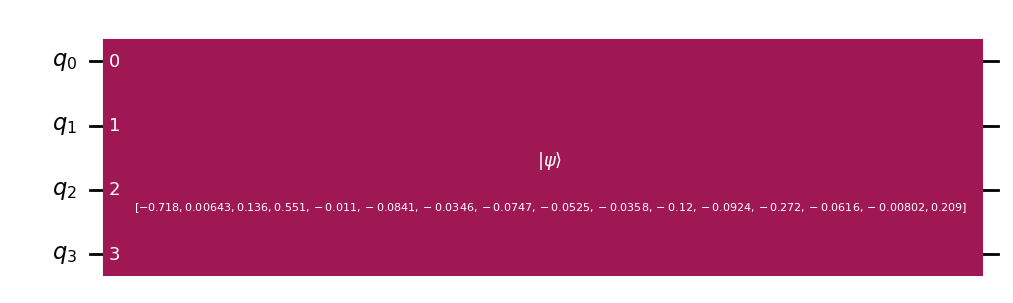

In [90]:
qc_encoded.draw('mpl', style='iqp', fold=-1)

In [18]:
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from scipy.spatial.distance import cosine

def create_swap_test_circuit(state1, state2):
    """
    Create a swap test circuit to compute fidelity between two quantum states.

    Circuit structure:
    - 1 ancilla qubit (for swap test)
    - 4 qubits for state 1
    - 4 qubits for state 2
    Total: 9 qubits

    Parameters:
    -----------
    state1, state2 : numpy arrays of shape (16,)
        Two normalized vectors to compare

    Returns:
    --------
    QuantumCircuit : swap test circuit
    """
    # Create registers
    ancilla = QuantumRegister(1, 'ancilla')
    reg1 = QuantumRegister(4, 'state1')
    reg2 = QuantumRegister(4, 'state2')
    c = ClassicalRegister(1, 'measure')

    qc = QuantumCircuit(ancilla, reg1, reg2, c)

    # Encode both states
    # State 1: qubits 1-4
    init1 = Initialize(state1)
    qc.append(init1, reg1)

    # State 2: qubits 5-8
    init2 = Initialize(state2)
    qc.append(init2, reg2)

    # Swap test protocol
    # 1. Hadamard on ancilla
    qc.h(ancilla[0])

    # 2. Controlled-SWAP between corresponding qubits
    for i in range(4):
        qc.cswap(ancilla[0], reg1[i], reg2[i])

    # 3. Hadamard on ancilla again
    qc.h(ancilla[0])

    # 4. Measure ancilla
    qc.measure(ancilla[0], c[0])

    return qc

def compute_fidelity(state1, state2, shots=1024):
    """
    Compute fidelity between two quantum states using swap test.

    Returns:
    --------
    fidelity : float
        Fidelity score between 0 and 1
    """
    # Create swap test circuit
    qc = create_swap_test_circuit(state1, state2)

    # Simulate
    simulator = AerSimulator()
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Calculate probability of measuring |0⟩
    prob_0 = counts.get('0', 0) / shots

    # Fidelity = 2 * P(0) - 1
    fidelity = 2 * prob_0 - 1

    return max(0, fidelity), counts  # Ensure non-negative



# QKNN

In [ ]:
import time
from tqdm.notebook import tqdm
from IPython.display import display
def quantum_knn(query_vector, database_vectors, database_df, k=10, shots=1024):
    """
    Quantum k-NN algorithm using swap test for similarity computation.

    Parameters:
    -----------
    query_vector : numpy array (16,)
        Query track vector
    database_vectors : numpy array (N, 16)
        Database of all track vectors
    database_df : pandas DataFrame
        Track metadata (names, artists, etc.)
    k : int
        Number of nearest neighbors to return
    shots : int
        Number of quantum measurements

    Returns:
    --------
    results : DataFrame with top-k tracks and their fidelity scores
    """
    print(f"🔍 Running Quantum k-NN for top-{k} tracks...")
    print(f"Database size: {len(database_vectors)} tracks\n")

    fidelity_scores = []
    start_time = time.time()

    # Compute fidelity for each track in database
    for idx in tqdm(range(len(database_vectors)), desc="Computing quantum similarities"):
        fidelity, _ = compute_fidelity(query_vector, database_vectors[idx], shots=shots)
        fidelity_scores.append(fidelity)

    elapsed_time = time.time() - start_time

    # Get top-k indices
    fidelity_scores = np.array(fidelity_scores)
    top_k_indices = np.argsort(fidelity_scores)[::-1][:k]

    # Create results dataframe
    results = database_df.iloc[top_k_indices].copy()
    results['quantum_fidelity'] = fidelity_scores[top_k_indices]
    results['rank'] = range(1, k+1)

    print(f"\nCompleted in {elapsed_time:.2f} seconds")
    print(f"Average time per track: {elapsed_time/len(database_vectors)*1000:.2f} ms")

    return results[['rank', 'track_name', 'track_artist', 'quantum_fidelity']]

# --- 1️⃣ Subset your queries (first 10 is enough) ---
num_queries = 5
X_queries = X_16_norm[:num_queries]
queries_subset = queries[:num_queries]  # optional, for display

# --- 2️⃣ Database for QKNN ---
# You can use your track dataset vectors (already PCA + normalized)
database_vectors = X_fused_norm  # shape (num_tracks, 16)
database_df = df_track_vector  # track metadata

# --- 3️⃣ Loop over the 10 queries ---
for i in range(num_queries):
    query_vector = X_queries[i]
    query_text = queries_subset[i]

    print("\n" + "="*90)
    print(f"🔹 QUERY {i+1}/{num_queries}")
    print(f"Query: {query_text}")
    print("="*90)

    # Optional: remove query if it exists in the database
    # (here, queries are independent of track dataset, so usually not needed)
    results = quantum_knn(
        query_vector=query_vector,
        database_vectors=database_vectors,
        database_df=database_df,
        k=10,         # top-k results
        shots=1024    # QKNN shots
    )

    # --- 4️⃣ Display nicely as styled table ---
    styled_results = (
        results.style
        .set_caption(f"🎵 TOP-10 SIMILAR TRACKS for Query {i+1}")
        .format({'quantum_fidelity': "{:.4f}"})
        .hide(axis="index")
        .set_table_styles([
            {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]},
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
    )

    display(styled_results)


🔹 QUERY 1/5
Query: Suggest energetic songs for workout with positive lyrics.
🔍 Running Quantum k-NN for top-10 tracks...
Database size: 18454 tracks



Computing quantum similarities:   0%|          | 0/18454 [00:00<?, ?it/s]


Completed in 1290.66 seconds
Average time per track: 69.94 ms



🔹 QUERY 2/5
Query: Calm but slightly energetic music for late night coding.
🔍 Running Quantum k-NN for top-10 tracks...
Database size: 18454 tracks



Computing quantum similarities:   0%|          | 0/18454 [00:00<?, ?it/s]


Completed in 1282.72 seconds
Average time per track: 69.51 ms



🔹 QUERY 3/5
Query: Soft acoustic songs to relax after work.
🔍 Running Quantum k-NN for top-10 tracks...
Database size: 18454 tracks



Computing quantum similarities:   0%|          | 0/18454 [00:00<?, ?it/s]


Completed in 1310.75 seconds
Average time per track: 71.03 ms



🔹 QUERY 4/5
Query: High-energy party music with uplifting vibes.
🔍 Running Quantum k-NN for top-10 tracks...
Database size: 18454 tracks



Computing quantum similarities:   0%|          | 0/18454 [00:00<?, ?it/s]


Completed in 1297.04 seconds
Average time per track: 70.28 ms



🔹 QUERY 5/5
Query: Melancholic songs with deep emotional lyrics.
🔍 Running Quantum k-NN for top-10 tracks...
Database size: 18454 tracks



Computing quantum similarities:   0%|          | 0/18454 [00:00<?, ?it/s]


Completed in 1307.68 seconds
Average time per track: 70.86 ms


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Runtime data extracted from your QKNN outputs
runtime_data = {
    "Query": [
        "Workout / Positive",
        "Late-night Coding",
        "Relax / Acoustic",
        "Party / Uplifting",
        "Melancholic / Emotional"
    ],
    "Total_Runtime_sec": [
        1290.66,
        1282.72,
        1310.75,
        1297.04,
        1307.68
    ],
    "Avg_Time_per_Track_ms": [
        69.94,
        69.51,
        71.03,
        70.28,
        70.86
    ]
}

df_runtime = pd.DataFrame(runtime_data)
plt.figure(figsize=(10, 5))
plt.plot(
    df_runtime["Query"],
    df_runtime["Total_Runtime_sec"],
    marker='o'
)

plt.title("Quantum k-NN Runtime per Query")
plt.ylabel("Total Runtime (seconds)")
plt.xlabel("Query Type")
plt.xticks(rotation=20)
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
import time
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# --- PARAMETERS ---
num_queries = 20       # 20 queries
shots = 1024           # QKNN shots

X_queries = X_16_norm[:num_queries]   # PCA-normalized query vectors
queries_subset = queries[:num_queries] # query text labels

database_vectors = X_fused_norm       # PCA-normalized database
database_df = df_track_vector         # metadata

# --- STORAGE ---
all_qknn_results = []

# --- RUN QKNN ---
for i in tqdm(range(num_queries), desc="Running QKNN for queries"):

    query_vector = X_queries[i]
    query_text = queries_subset[i]

    fidelity_scores = []

    # Compute fidelity for all tracks
    for j in tqdm(range(len(database_vectors)), desc=f"Query {i+1}/{num_queries}", leave=False):
        fidelity, _ = compute_fidelity(query_vector, database_vectors[j], shots=shots)
        fidelity_scores.append(fidelity)

    fidelity_scores = np.array(fidelity_scores)

    # Create DataFrame for this query
    df_query = database_df.copy()
    for dim in range(16):
        df_query[f"dim_{dim}"] = database_vectors[:, dim]
    df_query["query_id"] = i + 1
    df_query["query_text"] = query_text
    df_query["cosine_similarity"] = fidelity_scores  # store QKNN similarity

    all_qknn_results.append(df_query)

# --- CONCAT ALL QUERIES ---
df_qknn_full = pd.concat(all_qknn_results, ignore_index=True)
print("Shape of full QKNN results:", df_qknn_full.shape)

# --- SAVE CSV ---
qknn_csv_path = os.path.join(save_dir, "qknn_full_results.csv")
df_qknn_full.to_csv(qknn_csv_path, index=False)

print("QKNN full results saved to Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Running QKNN for queries:   0%|          | 0/20 [00:00<?, ?it/s]

Query 1/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 2/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 3/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 4/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 5/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 6/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 7/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 8/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 9/20:   0%|          | 0/18454 [00:00<?, ?it/s]

Query 10/20:   0%|          | 0/18454 [00:00<?, ?it/s]

# KNN

In [279]:
import time
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm.notebook import tqdm
from IPython.display import display

# ============================================================
# CLASSICAL KNN WITH COSINE SIMILARITY + RUNTIME LOGGING
# ============================================================

def classical_knn(query_vector, database_vectors, database_df, k=10):
    """
    Classical k-NN using cosine similarity.
    Returns results + runtime metrics.
    """

    start_time = time.time()

    knn_model = NearestNeighbors(
        n_neighbors=k,
        metric="cosine"
    )
    knn_model.fit(database_vectors)

    distances, indices = knn_model.kneighbors(
        query_vector.reshape(1, -1),
        return_distance=True
    )

    similarities = 1 - distances[0]
    elapsed_time = time.time() - start_time

    results = database_df.iloc[indices[0]].copy()
    results["cosine_similarity"] = similarities
    results["rank"] = range(1, k + 1)

    avg_time_per_track_ms = (elapsed_time / len(database_vectors)) * 1000

    return (
        results[["rank", "track_name", "track_artist", "cosine_similarity"]],
        elapsed_time,
        avg_time_per_track_ms
    )


# ============================================================
# RAG QUERY SETUP (CHANGED AS REQUESTED)
# ============================================================

num_queries = 5

X_queries = X_16_norm[:num_queries]       # RAG query vectors (16D)
queries_subset = queries[:num_queries]    # Query text (for display)

database_vectors = X_fused_norm            # Track vectors (16D)
database_df = df_track_vector              # Track metadata

print(f"📀 Database size: {len(database_vectors)} tracks")
print(f"🔎 Number of queries: {num_queries}\n")

# ============================================================
# STORAGE FOR RUNTIME ANALYSIS
# ============================================================

runtime_logs = []

# ============================================================
# RUN CLASSICAL KNN FOR EACH RAG QUERY
# ============================================================

for i in range(num_queries):

    print("\n" + "=" * 100)
    print(f"🔹 QUERY {i+1}/{num_queries}")
    print(f"Query Text: {queries_subset[i]}")
    print("=" * 100)

    query_vector = X_queries[i]

    results, total_time, avg_time_ms = classical_knn(
        query_vector=query_vector,
        database_vectors=database_vectors,
        database_df=database_df,
        k=10
    )

    print(f"\nCompleted in {total_time:.4f} seconds")
    print(f"Average time per track: {avg_time_ms:.6f} ms")

    # -------------------------------
    # STORE RUNTIME METRICS
    # -------------------------------
    runtime_logs.append({
        "query_id": i + 1,
        "query_text": queries_subset[i],
        "total_runtime_sec": total_time,
        "avg_time_per_track_ms": avg_time_ms,
        "database_size": len(database_vectors)
    })

    # -------------------------------
    # DISPLAY RESULTS
    # -------------------------------
    styled_results = (
        results.style
        .set_caption(f"🎵 TOP-10 SIMILAR TRACKS (Classical KNN) — Query {i+1}")
        .format({"cosine_similarity": "{:.4f}"})
        .hide(axis="index")
        .set_table_styles([
            {"selector": "caption", "props": [("caption-side", "top"),
                                              ("font-size", "16px"),
                                              ("font-weight", "bold")]},
            {"selector": "th", "props": [("text-align", "center")]},
            {"selector": "td", "props": [("text-align", "center")]}
        ])
    )

    display(styled_results)

# ============================================================
# SAVE RUNTIME LOGS FOR PLOTTING
# ============================================================

df_classical_runtime = pd.DataFrame(runtime_logs)
df_classical_runtime


📀 Database size: 18454 tracks
🔎 Number of queries: 5


🔹 QUERY 1/5
Query Text: Suggest energetic songs for workout with positive lyrics.

Completed in 0.0156 seconds
Average time per track: 0.000843 ms



🔹 QUERY 2/5
Query Text: Calm but slightly energetic music for late night coding.

Completed in 0.0095 seconds
Average time per track: 0.000512 ms



🔹 QUERY 3/5
Query Text: Soft acoustic songs to relax after work.

Completed in 0.0087 seconds
Average time per track: 0.000474 ms



🔹 QUERY 4/5
Query Text: High-energy party music with uplifting vibes.

Completed in 0.0065 seconds
Average time per track: 0.000353 ms



🔹 QUERY 5/5
Query Text: Melancholic songs with deep emotional lyrics.

Completed in 0.0079 seconds
Average time per track: 0.000429 ms


query_id           query_text  total_runtime_sec  avg_time_per_track_ms  \
0         1  Suggest energeti...           0.015566             0.000843     
1         2  Calm but slightl...           0.009451             0.000512     
2         3  Soft acoustic so...           0.008739             0.000474     
3         4  High-energy part...           0.006511             0.000353     
4         5  Melancholic song...           0.007919             0.000429     

   database_size  
0          18454  
1          18454  
2          18454  
3          18454  
4          18454

In [281]:
import time
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm.notebook import tqdm
from google.colab import drive
import os

# Mount Drive
drive.mount('/content/drive')

# Directory to save results
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# ============================================================
# PARAMETERS
# ============================================================
num_queries = 20
k = 10  # top-k similar tracks

X_queries = X_16_norm[:num_queries]       # your 16D query vectors
queries_subset = queries[:num_queries]    # query texts

database_vectors = X_fused_norm           # song vectors (16D)
database_df = df_track_vector             # metadata

# ============================================================
# STORAGE
# ============================================================
all_results = []        # store all similarity results
runtime_logs = []       # store runtime info

# ============================================================
# RUN CLASSICAL KNN
# ============================================================
for i in tqdm(range(num_queries), desc="Running KNN for queries"):

    query_vector = X_queries[i]
    query_text = queries_subset[i]

    start_time = time.time()

    knn_model = NearestNeighbors(n_neighbors=k, metric="cosine")
    knn_model.fit(database_vectors)

    distances, indices = knn_model.kneighbors(query_vector.reshape(1, -1))
    similarities = 1 - distances[0]
    elapsed_time = time.time() - start_time
    avg_time_ms = (elapsed_time / len(database_vectors)) * 1000

    # Save top-k results
    results = database_df.iloc[indices[0]].copy()
    results["cosine_similarity"] = similarities
    results["rank"] = range(1, k + 1)
    results["query_id"] = i + 1
    results["query_text"] = query_text

    all_results.append(results)

    # Save runtime info
    runtime_logs.append({
        "query_id": i + 1,
        "query_text": query_text,
        "total_runtime_sec": elapsed_time,
        "avg_time_per_track_ms": avg_time_ms,
        "database_size": len(database_vectors)
    })

# ============================================================
# CONCAT RESULTS
# ============================================================
df_knn_results = pd.concat(all_results, ignore_index=True)
df_runtime_logs = pd.DataFrame(runtime_logs)

# ============================================================
# SAVE TO DRIVE AS CSV
# ============================================================
results_path = os.path.join(save_dir, "classical_knn_results.csv")
df_knn_results.to_csv(results_path, index=False)

runtime_path = os.path.join(save_dir, "classical_knn_runtime.csv")
df_runtime_logs.to_csv(runtime_path, index=False)

print("✅ Saved KNN results and runtime logs to Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Running KNN for queries:   0%|          | 0/20 [00:00<?, ?it/s]

✅ Saved KNN results and runtime logs to Drive


In [283]:
# Full similarity matrix: queries × all tracks
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_queries, X_fused_norm)
print("Shape:", similarity_matrix.shape)  # (20, 18454)

Shape: (20, 18454)


In [286]:
save_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
os.makedirs(save_dir, exist_ok=True)

# similarity_matrix: shape (num_queries, num_songs)
# database_df: song metadata

num_queries = similarity_matrix.shape[0]

all_rows = []

for i in range(num_queries):
    query_text = queries[i]
    for j in range(database_df.shape[0]):
        row = database_df.iloc[j].to_dict()  # all song metadata
        row.update({
            "query_id": i + 1,
            "query_text": query_text,
            "cosine_similarity": similarity_matrix[i, j]
        })
        all_rows.append(row)

# Create DataFrame
df_similarity_full = pd.DataFrame(all_rows)
print("Shape:", df_similarity_full.shape)


Shape: (369080, 21)


In [287]:
csv_path = os.path.join(save_dir, "query_vs_all_songs_similarity.csv")
df_similarity_full.to_csv(csv_path, index=False)
print("Full similarity matrix saved as CSV")


Full similarity matrix saved as CSV


In [288]:
csv_path = "/content/drive/MyDrive/FYP_Results/QKNN_Stage/query_vs_all_songs_similarity.csv"
df_similarity_full = pd.read_csv(csv_path)
print("Loaded full similarity CSV")
print("Shape:", df_similarity_full.shape)

Loaded full similarity CSV
Shape: (369080, 21)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(
    df_classical_runtime["query_id"],
    df_classical_runtime["total_runtime_sec"],
    marker="o"
)

plt.title("Classical KNN Runtime per Query", fontsize=14)
plt.xlabel("Query ID")
plt.ylabel("Total Runtime (seconds)")
plt.xticks(df_classical_runtime["query_id"])
plt.grid(True)

plt.tight_layout()
plt.show()



# Grover


In [12]:
import numpy as np
import pandas as pd
import time


In [19]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from math import pi, sqrt, floor

# ------------------------------
# 1️⃣ Oracle function
# ------------------------------
def grover_oracle(n_qubits, marked_indices):
    """
    Create a Grover oracle for marking certain states.

    Parameters:
    -----------
    n_qubits : int
        Number of qubits in the system (log2(N))
    marked_indices : list of int
        Indices (0-based) of marked states to flip phase

    Returns:
    --------
    QuantumCircuit : Oracle circuit
    """
    oracle = QuantumCircuit(n_qubits)

    for idx in marked_indices:
        # Convert idx to binary string, pad with zeros
        bin_str = format(idx, f'0{n_qubits}b')

        # Apply X gates to flip 0->1 for control
        for qubit, bit in enumerate(bin_str):
            if bit == '0':
                oracle.x(qubit)

        # Multi-controlled Z (phase flip)
        if n_qubits == 1:
            oracle.z(0)
        else:
            oracle.h(n_qubits-1)
            oracle.mcx(list(range(n_qubits-1)), n_qubits-1)  # multi-controlled X
            oracle.h(n_qubits-1)

        # Undo X gates
        for qubit, bit in enumerate(bin_str):
            if bit == '0':
                oracle.x(qubit)

    return oracle

# ------------------------------
# 2️⃣ Diffusion operator
# ------------------------------
def grover_diffusion(n_qubits):
    """
    Create Grover diffusion operator (inversion about the mean)

    Parameters:
    -----------
    n_qubits : int
        Number of qubits in the system

    Returns:
    --------
    QuantumCircuit : Diffusion circuit
    """
    diffusion = QuantumCircuit(n_qubits)

    # Step 1: Apply H to all qubits
    diffusion.h(range(n_qubits))
    # Step 2: Apply X to all qubits
    diffusion.x(range(n_qubits))

    # Step 3: Multi-controlled Z
    if n_qubits == 1:
        diffusion.z(0)
    else:
        diffusion.h(n_qubits-1)
        diffusion.mcx(list(range(n_qubits-1)), n_qubits-1)
        diffusion.h(n_qubits-1)

    # Step 4: Apply X and H again
    diffusion.x(range(n_qubits))
    diffusion.h(range(n_qubits))

    return diffusion

# ------------------------------
# 3️⃣ Build Grover Circuit
# ------------------------------
def grover_circuit(n_qubits, marked_indices, iterations):
    """
    Construct full Grover circuit with oracle and diffusion.

    Parameters:
    -----------
    n_qubits : int
        Number of qubits
    marked_indices : list of int
        Indices of marked states
    iterations : int
        Number of Grover iterations

    Returns:
    --------
    QuantumCircuit : full Grover circuit
    """
    qc = QuantumCircuit(n_qubits)
    qc.h(range(n_qubits))  # Initialize uniform superposition

    oracle = grover_oracle(n_qubits, marked_indices)
    diffusion = grover_diffusion(n_qubits)

    for _ in range(iterations):
        qc.append(oracle.to_gate(), range(n_qubits))
        qc.append(diffusion.to_gate(), range(n_qubits))

    qc.measure_all()
    return qc


In [24]:
import numpy as np
import pandas as pd
import time
from tqdm.notebook import tqdm
from qiskit_aer import AerSimulator

# -------------------------------
# Parameters
# -------------------------------
num_queries = 5
shots = 1024

# Queries from RAG
X_queries = X_16_norm[:num_queries]          # 16D normalized query vectors
queries_subset = queries[:num_queries]       # query strings for display

# Database: PCA + normalized song vectors
database_vectors = X_fused_norm              # shape (num_tracks, 16)
database_df = df_track_vector                # track metadata

# Google Drive path to save
from google.colab import drive
drive.mount('/content/drive')
save_dir = "/content/drive/MyDrive/FYP_Results"
import os
os.makedirs(save_dir, exist_ok=True)

# -------------------------------
# Function to run QKNN and store fidelity
# -------------------------------
def run_qknn_save(query_vector, database_vectors, shots=1024):
    fidelity_scores = []
    start_time = time.time()

    for idx in tqdm(range(len(database_vectors)), desc="Computing quantum fidelities"):
        fidelity, _ = compute_fidelity(query_vector, database_vectors[idx], shots=shots)
        fidelity_scores.append(fidelity)

    elapsed = time.time() - start_time
    return np.array(fidelity_scores), elapsed

# -------------------------------
# Run QKNN for all queries
# -------------------------------
all_fidelity = []
all_runtime = []

for q_idx, query_vector in enumerate(X_queries):
    print("\n" + "="*80)
    print(f"🎧 QUERY {q_idx+1}/{num_queries}: {queries_subset[q_idx]}")
    print("="*80)

    fidelity_scores, runtime = run_qknn_save(query_vector, database_vectors, shots=shots)

    all_fidelity.append(fidelity_scores)
    all_runtime.append(runtime)

    print(f"Query {q_idx+1} completed in {runtime:.2f} seconds")

# -------------------------------
# Convert to DataFrame and save
# -------------------------------
df_fidelity = pd.DataFrame(all_fidelity, columns=database_df['track_name'])
df_fidelity.insert(0, 'query', queries_subset)
df_runtime = pd.DataFrame({"query": queries_subset, "runtime_sec": all_runtime})

fidelity_path = os.path.join(save_dir, "qknn_fidelity_5queries.csv")
runtime_path = os.path.join(save_dir, "qknn_runtime_5queries.csv")

df_fidelity.to_csv(fidelity_path, index=False)
df_runtime.to_csv(runtime_path, index=False)

print("QKNN fidelity and runtime saved to Google Drive:")
print(fidelity_path)
print(runtime_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🎧 QUERY 1/5: Suggest energetic songs for workout with positive lyrics.


Computing quantum fidelities:   0%|          | 0/18454 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [26]:
from google.colab import drive
import os

drive.mount('/content/drive')
load_dir = "/content/drive/MyDrive/FYP_Results"
os.listdir(load_dir)   # optional: verify files exist

fidelity_path = os.path.join(load_dir, "qknn_fidelity_5queries.csv")
runtime_path = os.path.join(load_dir, "qknn_runtime_5queries.csv")

df_fidelity = pd.read_csv(fidelity_path)
df_runtime = pd.read_csv(runtime_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import os

# -------------------------------
# Paths
# -------------------------------
base_dir = "/content/drive/MyDrive/FYP_Results"
fidelity_path = os.path.join(base_dir, "qknn_fidelity_5queries.csv")
candidate_dir = os.path.join(base_dir, "QKNN_Stage")
os.makedirs(candidate_dir, exist_ok=True)

# -------------------------------
# Load QKNN fidelity data
# -------------------------------
df_fidelity = pd.read_csv(fidelity_path)

# -------------------------------
# Metadata (ensure unique track-artist combinations)
# -------------------------------
track_meta = df_track_vector[["track_name", "track_artist"]].drop_duplicates()

queries = df_fidelity["query"].values
track_columns = df_fidelity.columns[1:]  # all track names

# -------------------------------
# Generate top-16 candidates per query
# -------------------------------
for q_idx, query in enumerate(queries):

    fidelities = df_fidelity.iloc[q_idx, 1:].values

    temp_df = pd.DataFrame({
        "track_name": track_columns,
        "fidelity": fidelities
    })

    # Merge with metadata to get artist
    temp_df = temp_df.merge(track_meta, on="track_name", how="left")

    # Deduplicate strictly by track_name to keep **only one song per name**
    temp_df = (
        temp_df.sort_values("fidelity", ascending=False)
               .drop_duplicates(subset=["track_name"], keep="first")
               .reset_index(drop=True)
    )

    # Take top-16 unique track names
    top16 = temp_df.head(16).copy()

    # Safety check
    if len(top16) < 16:
        print(f"⚠️ Only {len(top16)} unique track names available for Query {q_idx+1}")

    # Assign Grover candidate indices
    top16["candidate_id"] = np.arange(len(top16))

    # Save to Drive
    save_path = os.path.join(candidate_dir, f"qknn_candidates_query_{q_idx+1}.csv")
    top16.to_csv(save_path, index=False)

    print(f"✅ Saved top-{len(top16)} unique track names for Query {q_idx+1}")


✅ Saved top-16 unique track names for Query 1
✅ Saved top-16 unique track names for Query 2
✅ Saved top-16 unique track names for Query 3
✅ Saved top-16 unique track names for Query 4
✅ Saved top-16 unique track names for Query 5


In [27]:
pd.read_csv("/content/drive/MyDrive/FYP_Results/QKNN_Stage/qknn_candidates_query_3.csv")

track_name  fidelity  \
0                                               Intro  0.630859   
1                    Sun Models (feat. Madelyn Grant)  0.628906   
2                                           #1 Stunna  0.625000   
3                                             Silence  0.599609   
4                             Soldiers, Riders, & G's  0.599609   
5                                        Young Niggas  0.597656   
6                                  Unsolved Mysteries  0.589844   
7                                               Withu  0.578125   
8                      In California (feat. Lady "V")  0.578125   
9           Southern Hospitality (Featuring Pharrell)  0.568359   
10                                      Digital Scale  0.558594   
11                                             WW III  0.558594   
12  Let Me Clear My Throat - Old School Reunion Re...  0.556641   
13                                               Fuse  0.554688   
14                               Breathe (In the Air)  0.550781   
15                                        Rose Garden  0.550781   

     track_artist  candidate_id  
0          The xx             0  
1          ODESZA             1  
2      Big Tymers             2  
3      Marshmello             3  
4        Master P             4  
5        The Game             5  
6    South Circle             6  
7            Blvk             7  
8   Daz Dillinger             8  
9        Ludacris             9  
10         G-Unit            10  
11    Ruff Ryders            11  
12        DJ Kool            12  
13         Brenky            13  
14     Pink Floyd            14  
15          Kupla            15

In [28]:
import numpy as np
import pandas as pd
import time
import os
from math import pi, sqrt, floor
from qiskit_aer import AerSimulator
from qiskit import transpile
from IPython.display import display, Markdown
# ----------------------------------
# CONFIG
# ----------------------------------
shots = 1024
n_qubits = 4           # log2(16)
N = 16
num_queries = 5

base_dir = "/content/drive/MyDrive/FYP_Results/QKNN_Stage"
save_dir = "/content/drive/MyDrive/FYP_Results/Grover_Stage"
os.makedirs(save_dir, exist_ok=True)
simulator = AerSimulator()

def optimal_iterations(N, M):
    return floor((pi / 4) * sqrt(N / M)) if M > 0 else 0



GROVER FOR QUERY 1


## 🎧 Top 16 QKNN Candidates (Before Grover) — Query 1

candidate_id                                         track_name  \
0              0                               All You Need Is Love   
1              1                           Dreams (Will Come Alive)   
2              2                                        Spit It Out   
3              3                          Rock My Heart - Radio Mix   
4              4                                     Good Feeling.1   
5              5                                              I Cry   
6              6                                          Cocaine.3   
7              7  White Christmas (feat. Clyde McPhatter & Bill ...   
8              8                                     This Is On You   
9              9                                         Get Down.1   
10            10                                             Boom.2   
11            11                                 Ready When You Are   
12            12                                    Heads Will Roll   
13            13                                           The Ones   
14            14                                               Dirt   
15            15                                 Que te vaya bonito   

                   track_artist  fidelity  
0                  Frank Mccomb  0.689453  
1   2 Brothers On The 4th Floor  0.681641  
2          Aesthetic Perfection  0.654297  
3                      Haddaway  0.654297  
4                           NaN  0.636719  
5                      Flo Rida  0.628906  
6                           NaN  0.613281  
7                  The Drifters  0.611328  
8                 Maisie Peters  0.605469  
9                           NaN  0.599609  
10                          NaN  0.595703  
11               Mathilda Homer  0.593750  
12              Yeah Yeah Yeahs  0.589844  
13         Aesthetic Perfection  0.585938  
14                         SASH  0.583984  
15               Chavela Vargas  0.582031

Threshold τ = 0.6411
Marked states (M) = 4
Grover iterations R = 1


## Top 10 Recommendations After Grover — Query 1

candidate_id            track_name          track_artist  fidelity  marked  \
0             4        Good Feeling.1                   NaN  0.636719   False   
1             8        This Is On You         Maisie Peters  0.605469   False   
2            12       Heads Will Roll       Yeah Yeah Yeahs  0.589844   False   
3             0  All You Need Is Love          Frank Mccomb  0.689453    True   
4            14                  Dirt                  SASH  0.583984   False   
5            11    Ready When You Are        Mathilda Homer  0.593750   False   
6             9            Get Down.1                   NaN  0.599609   False   
7             2           Spit It Out  Aesthetic Perfection  0.654297    True   
8            13              The Ones  Aesthetic Perfection  0.585938   False   
9             5                 I Cry              Flo Rida  0.628906   False   

   prob_before    prob_after  amplification  
0     0.065904  2.500000e-01   3.793387e+00  
1     0.059594  2.500000e-01   4.195068e+00  
2     0.056558  2.500000e-01   4.420267e+00  
3     0.077273  2.500000e-01   3.235288e+00  
4     0.055440  3.765410e-32   6.791914e-31  
5     0.057309  3.333646e-32   5.816941e-31  
6     0.058446  2.387002e-32   4.084118e-31  
7     0.069593  1.840688e-32   2.644922e-31  
8     0.055811  1.803096e-32   3.230716e-31  
9     0.064297  1.088892e-32   1.693539e-31

Saved BEFORE & AFTER results for Query 1
Runtime: 0.276s

GROVER FOR QUERY 2


## 🎧 Top 16 QKNN Candidates (Before Grover) — Query 2

candidate_id                                    track_name  \
0              0                                 Hand Me Downs   
1              1                              Boys Don't Cry.1   
2              2                                The Violence.2   
3              3                                          Guts   
4              4                                     Rise Up.1   
5              5                                  Girlfriend.1   
6              6                                        Verona   
7              7                 You Might As Well Be In Space   
8              8  Tim McGraw - Recorded At Spotify Studios NYC   
9              9        Leaving You - Thomas Newson Radio Edit   
10            10                                     Runaway.1   
11            11                                Make It Rain.1   
12            12                           Straight Gangstaism   
13            13                       If I Were In Your Shoes   
14            14                           Heavy Is the Head.1   
15            15                                        Memory   

         track_artist  fidelity  
0          Mac Miller  0.714844  
1                 NaN  0.712891  
2                 NaN  0.699219  
3        All Time Low  0.662109  
4                 NaN  0.656250  
5                 NaN  0.652344  
6           Elemeno P  0.652344  
7   The Years Gone By  0.642578  
8       Maggie Rogers  0.642578  
9              Audien  0.640625  
10                NaN  0.638672  
11                NaN  0.636719  
12          Geto Boys  0.636719  
13      You Me At Six  0.636719  
14                NaN  0.630859  
15         BrokenRail  0.625000

Threshold τ = 0.6577
Marked states (M) = 4
Grover iterations R = 1


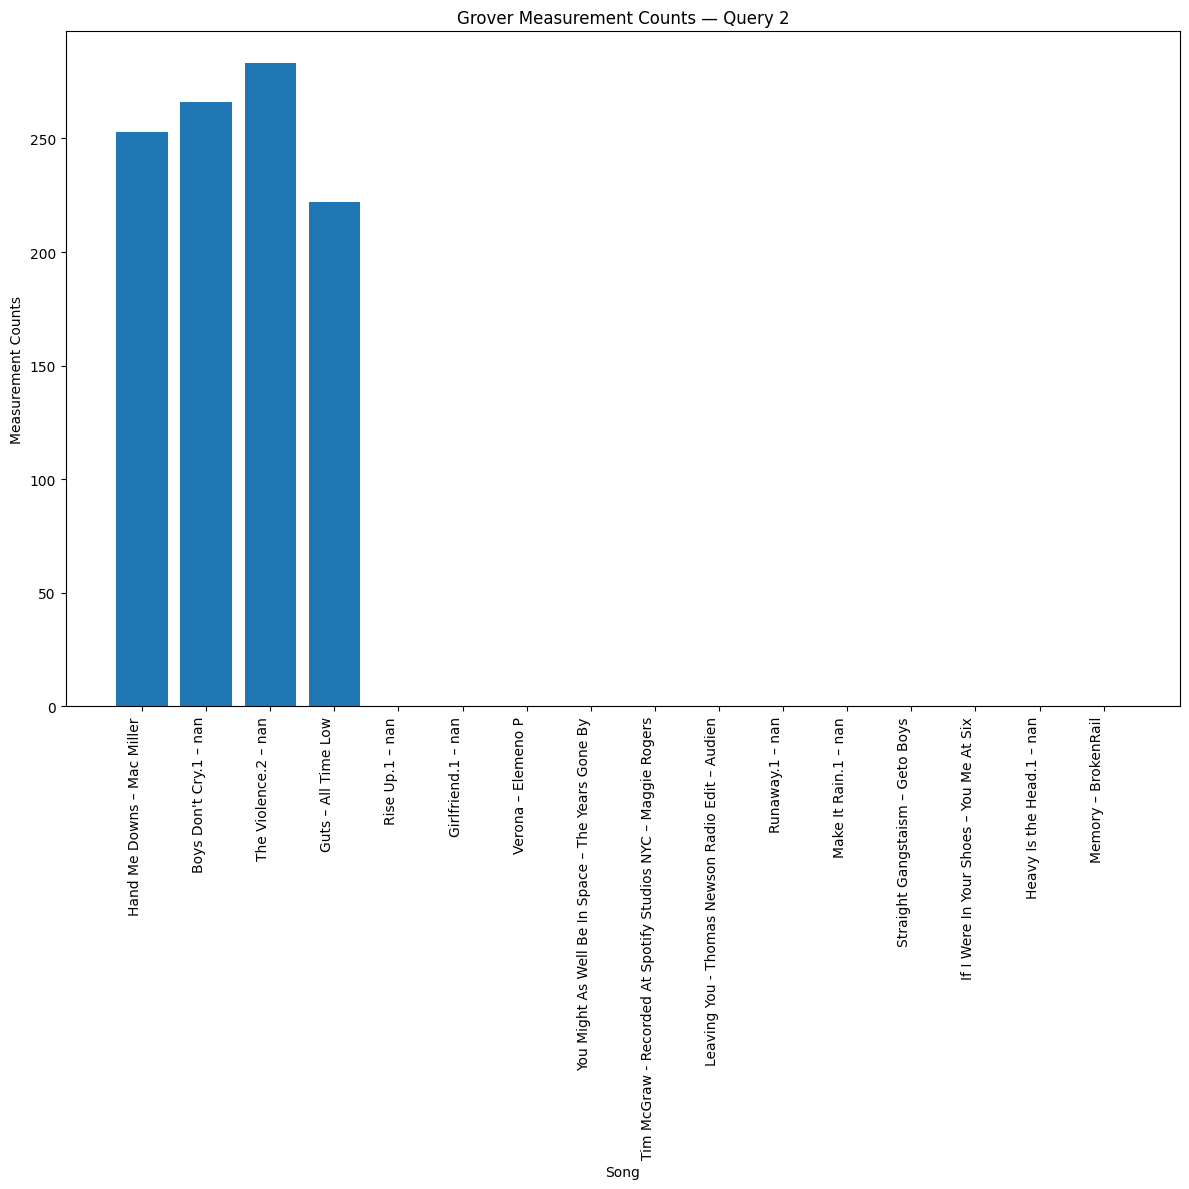

## Top 10 Recommendations After Grover — Query 2

candidate_id                                    track_name   track_artist  \
0             4                                     Rise Up.1            NaN   
1             8  Tim McGraw - Recorded At Spotify Studios NYC  Maggie Rogers   
2            12                           Straight Gangstaism      Geto Boys   
3             0                                 Hand Me Downs     Mac Miller   
4            14                           Heavy Is the Head.1            NaN   
5            11                                Make It Rain.1            NaN   
6             9        Leaving You - Thomas Newson Radio Edit         Audien   
7             2                                The Violence.2            NaN   
8            13                       If I Were In Your Shoes  You Me At Six   
9             5                                  Girlfriend.1            NaN   

   fidelity  marked  prob_before    prob_after  amplification  
0  0.656250   False     0.062622  2.500000e-01   3.992227e+00  
1  0.642578   False     0.060040  2.500000e-01   4.163917e+00  
2  0.636719   False     0.058950  2.500000e-01   4.240906e+00  
3  0.714844    True     0.074303  2.500000e-01   3.364586e+00  
4  0.630859   False     0.057870  3.765410e-32   6.506703e-31  
5  0.636719   False     0.058950  3.333646e-32   5.655072e-31  
6  0.640625   False     0.059675  2.387002e-32   3.999989e-31  
7  0.699219    True     0.071091  1.840688e-32   2.589213e-31  
8  0.636719   False     0.058950  1.803096e-32   3.058704e-31  
9  0.652344   False     0.061878  1.088892e-32   1.759728e-31

Saved BEFORE & AFTER results for Query 2
Runtime: 0.156s

GROVER FOR QUERY 3


## 🎧 Top 16 QKNN Candidates (Before Grover) — Query 3

candidate_id                                         track_name  \
0              0                                              Intro   
1              1                   Sun Models (feat. Madelyn Grant)   
2              2                                          #1 Stunna   
3              3                                            Silence   
4              4                            Soldiers, Riders, & G's   
5              5                                       Young Niggas   
6              6                                 Unsolved Mysteries   
7              7                                              Withu   
8              8                     In California (feat. Lady "V")   
9              9          Southern Hospitality (Featuring Pharrell)   
10            10                                      Digital Scale   
11            11                                             WW III   
12            12  Let Me Clear My Throat - Old School Reunion Re...   
13            13                                               Fuse   
14            14                               Breathe (In the Air)   
15            15                                        Rose Garden   

     track_artist  fidelity  
0          The xx  0.630859  
1          ODESZA  0.628906  
2      Big Tymers  0.625000  
3      Marshmello  0.599609  
4        Master P  0.599609  
5        The Game  0.597656  
6    South Circle  0.589844  
7            Blvk  0.578125  
8   Daz Dillinger  0.578125  
9        Ludacris  0.568359  
10         G-Unit  0.558594  
11    Ruff Ryders  0.558594  
12        DJ Kool  0.556641  
13         Brenky  0.554688  
14     Pink Floyd  0.550781  
15          Kupla  0.550781

Threshold τ = 0.5996
Marked states (M) = 5
Grover iterations R = 1


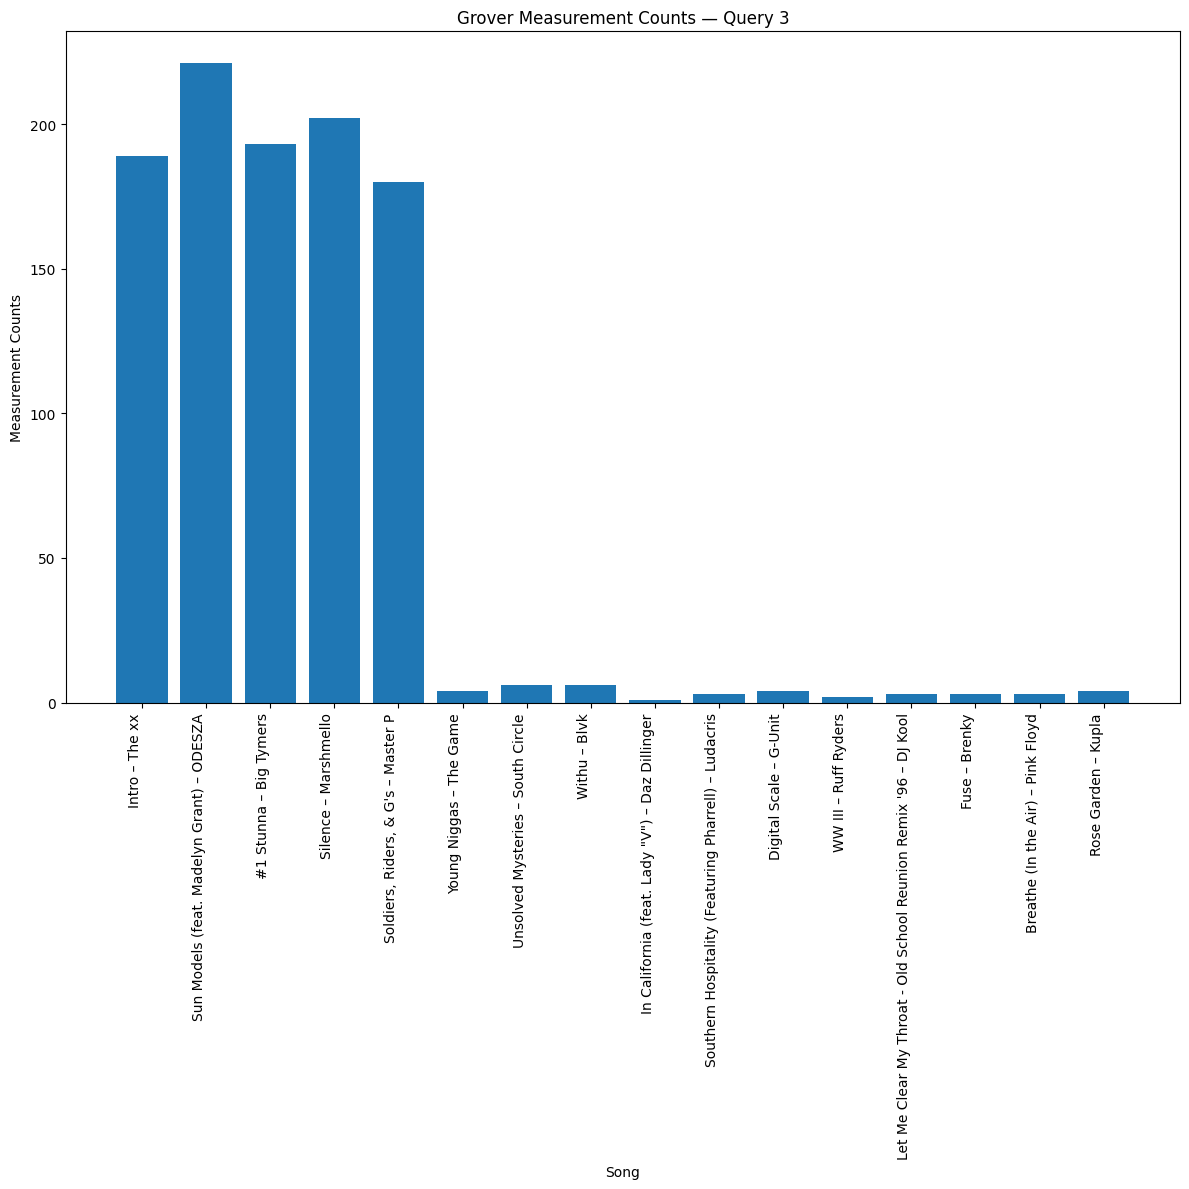

## Top 10 Recommendations After Grover — Query 3

candidate_id                                         track_name  \
0            12  Let Me Clear My Throat - Old School Reunion Re...   
1             4                            Soldiers, Riders, & G's   
2             2                                          #1 Stunna   
3             8                     In California (feat. Lady "V")   
4             0                                              Intro   
5             9          Southern Hospitality (Featuring Pharrell)   
6            10                                      Digital Scale   
7            13                                               Fuse   
8             6                                 Unsolved Mysteries   
9            15                                        Rose Garden   

    track_artist  fidelity  marked  prob_before  prob_after  amplification  
0        DJ Kool  0.556641   False     0.056873    0.191406       3.365510  
1       Master P  0.599609    True     0.065992    0.191406       2.900440  
2     Big Tymers  0.625000    True     0.071699    0.191406       2.669566  
3  Daz Dillinger  0.578125   False     0.061348    0.191406       3.120018  
4         The xx  0.630859    True     0.073050    0.191406       2.620207  
5       Ludacris  0.568359   False     0.059293    0.003906       0.065881  
6         G-Unit  0.558594   False     0.057273    0.003906       0.068204  
7         Brenky  0.554688   False     0.056474    0.003906       0.069168  
8   South Circle  0.589844   False     0.063860    0.003906       0.061169  
9          Kupla  0.550781   False     0.055682    0.003906       0.070153

Saved BEFORE & AFTER results for Query 3
Runtime: 0.169s

GROVER FOR QUERY 4


## 🎧 Top 16 QKNN Candidates (Before Grover) — Query 4

candidate_id                             track_name    track_artist  \
0              0                      TheArtOfCremation           BONES   
1              1                  Put Your Records On.1             NaN   
2              2                           Summertime.1             NaN   
3              3                          Memphis to La    Chris Travis   
4              4                      Technicolour Beat       Oh Wonder   
5              5                                Georgia  Kevin Abstract   
6              6                               Exodus.1             NaN   
7              7                                   Neon   Frida Sundemo   
8              8                        Talk to Me Baby    Elmore James   
9              9  Heroes (we could be) - Branchez Remix          Alesso   
10            10                             Antarctica     $uicideBoy$   
11            11                     Anything for You.1             NaN   
12            12                     Eye of the Tiger.6             NaN   
13            13                            Brakelights     Omar Apollo   
14            14                       Counting Stars.1             NaN   
15            15                          Laid to Waste  Unaverage Gang   

    fidelity  
0   0.648438  
1   0.644531  
2   0.601562  
3   0.593750  
4   0.589844  
5   0.587891  
6   0.583984  
7   0.574219  
8   0.572266  
9   0.568359  
10  0.558594  
11  0.552734  
12  0.550781  
13  0.550781  
14  0.541016  
15  0.539062

Threshold τ = 0.5908
Marked states (M) = 4
Grover iterations R = 1


## Top 10 Recommendations After Grover — Query 4

candidate_id                             track_name    track_artist  \
0             4                      Technicolour Beat       Oh Wonder   
1             8                        Talk to Me Baby    Elmore James   
2            12                     Eye of the Tiger.6             NaN   
3             0                      TheArtOfCremation           BONES   
4            14                       Counting Stars.1             NaN   
5            11                     Anything for You.1             NaN   
6             9  Heroes (we could be) - Branchez Remix          Alesso   
7             2                           Summertime.1             NaN   
8            13                            Brakelights     Omar Apollo   
9             5                                Georgia  Kevin Abstract   

   fidelity  marked  prob_before    prob_after  amplification  
0  0.589844   False     0.064757  2.500000e-01   3.860615e+00  
1  0.572266   False     0.060954  2.500000e-01   4.101428e+00  
2  0.550781   False     0.056464  2.500000e-01   4.427638e+00  
3  0.648438    True     0.078261  2.500000e-01   3.194436e+00  
4  0.541016   False     0.054479  3.765410e-32   6.911670e-31  
5  0.552734   False     0.056865  3.333646e-32   5.862420e-31  
6  0.568359   False     0.060125  2.387002e-32   3.970060e-31  
7  0.601562    True     0.067355  1.840688e-32   2.732807e-31  
8  0.550781   False     0.056464  1.803096e-32   3.193383e-31  
9  0.587891   False     0.064328  1.088892e-32   1.692708e-31

Saved BEFORE & AFTER results for Query 4
Runtime: 0.161s

GROVER FOR QUERY 5


## 🎧 Top 16 QKNN Candidates (Before Grover) — Query 5

candidate_id                                   track_name  \
0              0  DJ Got Us Fallin' In Love (feat. Pitbull).1   
1              1                           Aunque Ya No Estés   
2              2                               Open Your Eyes   
3              3                 Trampoline - Dave Audé Remix   
4              4               Praying To A God - Melio Remix   
5              5                                Never Give Up   
6              6                                 Rock N' Roll   
7              7                                  Un Minutito   
8              8                                       Em Off   
9              9                                  Hit and Run   
10            10                                    Pop Style   
11            11                            Let Me Love You.1   
12            12                             Me And Mary Jane   
13            13                   Let's Make This Last 4Ever   
14            14                                       Python   
15            15                             Deliriously Good   

          track_artist  fidelity  
0                  NaN  0.714844  
1              MC Davo  0.675781  
2            Disturbed  0.671875  
3                SHAED  0.666016  
4            Mr. Probz  0.666016  
5                  Sia  0.654297  
6             Dfideliz  0.636719  
7               Aleman  0.621094  
8      Matheus Queiroz  0.605469  
9              Midnght  0.603516  
10               Drake  0.603516  
11                 NaN  0.595703  
12  Black Stone Cherry  0.587891  
13       Mitchel Musso  0.587891  
14               Healy  0.576172  
15            Rat City  0.574219

Threshold τ = 0.6660
Marked states (M) = 5
Grover iterations R = 1


## Top 10 Recommendations After Grover — Query 5

candidate_id                                   track_name  \
0            12                             Me And Mary Jane   
1             4               Praying To A God - Melio Remix   
2             2                               Open Your Eyes   
3             8                                       Em Off   
4             0  DJ Got Us Fallin' In Love (feat. Pitbull).1   
5             9                                  Hit and Run   
6            10                                    Pop Style   
7            13                   Let's Make This Last 4Ever   
8             6                                 Rock N' Roll   
9            15                             Deliriously Good   

         track_artist  fidelity  marked  prob_before  prob_after  \
0  Black Stone Cherry  0.587891   False     0.054614    0.191406   
1           Mr. Probz  0.666016    True     0.070093    0.191406   
2           Disturbed  0.671875    True     0.071332    0.191406   
3     Matheus Queiroz  0.605469   False     0.057928    0.191406   
4                 NaN  0.714844    True     0.080748    0.191406   
5             Midnght  0.603516   False     0.057555    0.003906   
6               Drake  0.603516   False     0.057555    0.003906   
7       Mitchel Musso  0.587891   False     0.054614    0.003906   
8            Dfideliz  0.636719   False     0.064062    0.003906   
9            Rat City  0.574219   False     0.052103    0.003906   

   amplification  
0       3.504734  
1       2.730734  
2       2.683312  
3       3.304188  
4       2.370423  
5       0.067870  
6       0.067870  
7       0.071525  
8       0.060976  
9       0.074972

Saved BEFORE & AFTER results for Query 5
Runtime: 0.251s


In [29]:
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
for q in range(1, num_queries + 1):

    print(f"\nGROVER FOR QUERY {q}")
    print("=" * 80)

    # ------------------------------
    # Load candidate set (N=16)
    # ------------------------------
    df = pd.read_csv(f"{base_dir}/qknn_candidates_query_{q}.csv")
    fidelities = df["fidelity"].values

    N = len(df)  # candidate size
    n_qubits = int(np.ceil(np.log2(N)))

    # ------------------------------
    # ✅ BEFORE GROVER: Top-16 (QKNN baseline)
    # ------------------------------
    before_df = df.sort_values(by="fidelity", ascending=False).reset_index(drop=True)

    display(Markdown(f"## 🎧 Top 16 QKNN Candidates (Before Grover) — Query {q}"))
    display(before_df[["candidate_id", "track_name", "track_artist", "fidelity"]])

    # ------------------------------
    # Threshold τ (adaptive)
    # ------------------------------
    tau = np.percentile(fidelities, 75)   # top 25%
    marked = [int(i) for i, f in enumerate(fidelities) if f >= tau]
    M = len(marked)

    print(f"Threshold τ = {tau:.4f}")
    print(f"Marked states (M) = {M}")

    if M == 0:
        print("No marked states — skipping Grover")
        continue

    # ------------------------------
    # Optimal Grover iterations
    # ------------------------------
    R = optimal_iterations(N, M)
    print(f"Grover iterations R = {R}")

    # ------------------------------
    # Build & run Grover
    # ------------------------------
    qc = grover_circuit(n_qubits, marked, R)

    t0 = time.time()
    transpiled = transpile(qc, simulator)
    job = simulator.run(transpiled, shots=shots)
    result = job.result()
    counts = result.get_counts()
    runtime = time.time() - t0

    candidate_counts = {i: 0 for i in range(N)}

    for bitstring, cnt in counts.items():
        idx = int(bitstring[::-1], 2)  # little-endian → index
        if idx < N:
            candidate_counts[idx] += cnt

    x = list(candidate_counts.keys())
    y = list(candidate_counts.values())
    # Create readable labels: "Song Name – Artist"
    labels = [
        f"{df.iloc[i]['track_name']} – {df.iloc[i]['track_artist']}"
        for i in x
    ]
    plt.figure(figsize=(12, 12))
    plt.bar(x, y)
    plt.xlabel("Song")
    plt.ylabel("Measurement Counts")
    plt.title(f"Grover Measurement Counts — Query {q}")
    plt.xticks(x, labels, rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

    # ------------------------------
    # Quantum probabilities
    # ------------------------------
    qc_for_sv = qc.remove_final_measurements(inplace=False)
    # Get statevector
    statevector = Statevector.from_instruction(qc_for_sv)
    prob_after = np.abs(statevector.data[:N])**2

    # Use QKNN fidelities as amplitudes for prob_before
    amplitudes_before = fidelities / np.linalg.norm(fidelities)
    prob_before = amplitudes_before**2

    # ------------------------------
    # Decode states → candidate IDs
    # ------------------------------
    rows = []
    for idx in range(N):
        rows.append({
            "candidate_id": idx,
            "track_name": df.iloc[idx]["track_name"],
            "track_artist": df.iloc[idx]["track_artist"],
            "fidelity": df.iloc[idx]["fidelity"],
            "marked": idx in marked,
            "prob_before": prob_before[idx],
            "prob_after": prob_after[idx],
            "amplification": prob_after[idx] / prob_before[idx] if prob_before[idx] > 0 else np.nan
        })

    after_df = pd.DataFrame(rows).sort_values(by="prob_after", ascending=False).reset_index(drop=True)

    # ------------------------------
    # ✅ AFTER GROVER: Top-10 amplified
    # ------------------------------
    top10_after = after_df.head(10)

    display(Markdown(f"## Top 10 Recommendations After Grover — Query {q}"))
    display(top10_after[[
        "candidate_id",
        "track_name",
        "track_artist",
        "fidelity",
        "marked",
        "prob_before",
        "prob_after",
        "amplification"
    ]])

    # ------------------------------
    # Save results
    # ------------------------------
    before_df.to_csv(f"{save_dir}/qknn_top16_before_grover_query_{q}.csv", index=False)
    top10_after.to_csv(f"{save_dir}/grover_top10_after_query_{q}.csv", index=False)
    pd.DataFrame.from_dict(counts, orient="index", columns=["counts"]).to_csv(
        f"{save_dir}/grover_counts_query_{q}.csv"
    )
    pd.DataFrame([{
        "query_id": q,
        "threshold_tau": tau,
        "marked_states": M,
        "iterations": R,
        "runtime_sec": runtime
    }]).to_csv(f"{save_dir}/grover_runtime_query_{q}.csv", index=False)

    print(f"Saved BEFORE & AFTER results for Query {q}")
    print(f"Runtime: {runtime:.3f}s")


In [30]:
import pandas as pd
import os

# Containers to hold everything
qknn_before_all = {}
grover_after_all = {}
grover_counts_all = {}
grover_runtime_all = {}

for q in range(1, num_queries + 1):

    print(f"Loading saved results for Query {q}")

    # ------------------------------
    # File paths
    # ------------------------------
    before_path = f"{save_dir}/qknn_top16_before_grover_query_{q}.csv"
    after_path = f"{save_dir}/grover_top10_after_query_{q}.csv"
    counts_path = f"{save_dir}/grover_counts_query_{q}.csv"
    runtime_path = f"{save_dir}/grover_runtime_query_{q}.csv"

    # ------------------------------
    # Load if files exist
    # ------------------------------
    if os.path.exists(before_path):
        qknn_before_all[q] = pd.read_csv(before_path)

    if os.path.exists(after_path):
        grover_after_all[q] = pd.read_csv(after_path)

    if os.path.exists(counts_path):
        grover_counts_all[q] = pd.read_csv(counts_path)

    if os.path.exists(runtime_path):
        grover_runtime_all[q] = pd.read_csv(runtime_path)

print("All available Grover results loaded successfully")


Loading saved results for Query 1
Loading saved results for Query 2
Loading saved results for Query 3
Loading saved results for Query 4
Loading saved results for Query 5
All available Grover results loaded successfully


# Metrics

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from collections import Counter
import os
from tqdm import tqdm
from scipy.spatial.distance import pdist

print("Evaluation metrics module loaded")

Evaluation metrics module loaded


In [82]:
# ============================================================================
# CELL: Compute Ground Truth using Semantic Similarity (Sentence-BERT)
# ============================================================================

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# -------------------------------
# Initialize Sentence-BERT model
# -------------------------------
print("Loading Sentence-BERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

# -------------------------------
# Create track metadata strings
# -------------------------------
def create_track_metadata(row):
    """
    Combine track metadata into a single string
    """
    name = str(row.get('track_name', ''))
    artist = str(row.get('track_artist', ''))
    lyrics = str(row.get('lyrics', ''))[:500]  # limit lyrics length
    return f"{name} by {artist}. {lyrics}"

print("Creating track metadata...")
track_metadata = merged_df.apply(create_track_metadata, axis=1).tolist()

# -------------------------------
# Compute embeddings for all tracks
# -------------------------------
print("Computing track embeddings...")
track_embeddings = sbert_model.encode(
    track_metadata,
    show_progress_bar=True,
    normalize_embeddings=True
)

# -------------------------------
# Compute ground truth per query
# -------------------------------
ground_truth = {}
print("Computing ground truth similarity scores...")

for q_idx, query in enumerate(queries):

    # Encode query
    query_embedding = sbert_model.encode(
        [query],
        normalize_embeddings=True
    )[0]

    # Cosine similarity with all tracks
    similarities = cosine_similarity(
        [query_embedding],
        track_embeddings
    )[0]

    # Normalize similarity from [-1, 1] → [0, 1]
    normalized_similarities = (similarities + 1) / 2

    # Store ground truth
    ground_truth[q_idx] = normalized_similarities

    print(
        f"Query {q_idx+1} ground truth computed | "
        f"Min: {normalized_similarities.min():.4f}, "
        f"Max: {normalized_similarities.max():.4f}"
    )

print("Ground truth computation complete!")


Loading Sentence-BERT model...
Creating track metadata...
Computing track embeddings...


Batches:   0%|          | 0/188 [00:00<?, ?it/s]

Computing ground truth similarity scores...
Query 1 ground truth computed | Min: 0.4670, Max: 0.6267
Query 2 ground truth computed | Min: 0.4651, Max: 0.6345
Query 3 ground truth computed | Min: 0.4705, Max: 0.6370
Query 4 ground truth computed | Min: 0.4630, Max: 0.6326
Query 5 ground truth computed | Min: 0.4772, Max: 0.6392
Ground truth computation complete!


In [ ]:
# Use Like THIS ALWAYS
# from qiskit import QuantumCircuit
# from qiskit_aer import AerSimulator
# from qiskit import transpile
# qc = grover_circuit(n_qubits, marked_indices, R)
# simulator = AerSimulator()
# transpiled = transpile(qc, simulator)
# job = simulator.run(transpiled, shots=shots)
# counts = result.get_counts()


In [97]:
# ============================================================================
# CELL 1: Compute All Metrics
# ============================================================================

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

def compute_all_metrics(predicted_scores, ground_truth_scores, top_k_indices, merged_df, k):
    """
    Compute all evaluation metrics for a given query.
    Always computes @10 metrics using top-10 from the recommendation list.

    Parameters:
    -----------
    predicted_scores : np.array
        Predicted similarity scores for all tracks
    ground_truth_scores : np.array
        Ground truth similarity scores for all tracks
    top_k_indices : np.array
        Indices of top-k recommended tracks
    merged_df : pd.DataFrame
        DataFrame with track metadata including track_popularity
    k : int
        Number of top items in recommendation list (used for coverage)

    Returns:
    --------
    dict : Dictionary with all metric values (all @10 metrics)
    """
    metrics = {}

    # Handle shape mismatch: align predicted_scores with ground_truth_scores length
    min_len = min(len(predicted_scores), len(ground_truth_scores))
    predicted_scores_aligned = predicted_scores[:min_len]
    ground_truth_scores_aligned = ground_truth_scores[:min_len]

    # Also align top_k_indices to be within the aligned range
    top_k_indices_aligned = top_k_indices[top_k_indices < min_len]

    # MAE and RMSE (on aligned tracks)
    mae = np.mean(np.abs(predicted_scores_aligned - ground_truth_scores_aligned))
    rmse = np.sqrt(np.mean((predicted_scores_aligned - ground_truth_scores_aligned) ** 2))
    metrics['MAE'] = mae
    metrics['RMSE'] = rmse

    # Always use top-10 for @10 metrics
    eval_k = 10
    # Use aligned indices
    top_10_indices = top_k_indices_aligned[:min(eval_k, len(top_k_indices_aligned))]

    # Get top-10 ground truth scores (using aligned scores)
    top_10_gt = ground_truth_scores_aligned[top_10_indices]

    # Binary relevance (threshold = median of ground truth)
    threshold = np.median(ground_truth_scores_aligned)
    relevant = (top_10_gt >= threshold).astype(int)
    num_relevant = np.sum(relevant)

    # Precision@10
    precision_10 = num_relevant / eval_k if eval_k > 0 else 0
    metrics['Precision@10'] = precision_10

    # Recall@10 (need total relevant in entire dataset)
    total_relevant = np.sum(ground_truth_scores_aligned >= threshold)
    recall_10 = num_relevant / total_relevant if total_relevant > 0 else 0
    metrics['Recall@10'] = recall_10

    # F1@10
    f1_10 = 2 * (precision_10 * recall_10) / (precision_10 + recall_10) if (precision_10 + recall_10) > 0 else 0
    metrics['F1@10'] = f1_10

    # NDCG@10
    dcg = np.sum(relevant / np.log2(np.arange(2, eval_k + 2)))
    ideal_relevance = np.sort(ground_truth_scores_aligned)[::-1][:eval_k]
    ideal_relevant = (ideal_relevance >= threshold).astype(int)
    idcg = np.sum(ideal_relevant / np.log2(np.arange(2, eval_k + 2))) if len(ideal_relevant) > 0 else 1
    ndcg_10 = dcg / idcg if idcg > 0 else 0
    metrics['NDCG@10'] = ndcg_10

    # MAP@10
    if num_relevant > 0:
        ap = 0
        relevant_count = 0
        for i, rel in enumerate(relevant):
            if rel == 1:
                relevant_count += 1
                ap += relevant_count / (i + 1)
        map_10 = ap / num_relevant
    else:
        map_10 = 0
    metrics['MAP@10'] = map_10

    # MRR@10
    mrr_10 = 0
    for i, rel in enumerate(relevant):
        if rel == 1:
            mrr_10 = 1 / (i + 1)
            break
    metrics['MRR@10'] = mrr_10

    # Intra-list Diversity@10 (using coefficient of variation of popularity)
    if len(top_10_indices) > 1:
        top_10_popularity = merged_df.iloc[top_10_indices]['track_popularity'].values
        mean_pop = np.mean(top_10_popularity)
        std_pop = np.std(top_10_popularity)
        diversity = std_pop / mean_pop if mean_pop > 0 else 0  # Coefficient of variation
        metrics['Intra-list_Diversity@10'] = diversity
    else:
        metrics['Intra-list_Diversity@10'] = 0

    # Novelty@10 (inverse of average popularity of top-10)
    top_10_popularity = merged_df.iloc[top_10_indices]['track_popularity'].values
    avg_popularity = np.mean(top_10_popularity)
    max_popularity = merged_df['track_popularity'].max()
    novelty = 1 - (avg_popularity / max_popularity) if max_popularity > 0 else 0
    metrics['Novelty@10'] = novelty

    # Coverage (unique tracks recommended across all queries - computed outside)
    metrics['Coverage'] = len(top_k_indices)  # Will be aggregated later

    # Popularity Bias@10 (average popularity of top-10 recommended tracks)
    metrics['Popularity_Bias@10'] = avg_popularity

    return metrics

In [86]:
# ============================================================================
# CELL 2: Compute KNN Results for All K Values
# ============================================================================

def compute_knn_results(query_vectors, database_vectors, merged_df, k_values):
    knn_results = {}

    for q_idx, query_vec in enumerate(query_vectors):
        knn_results[q_idx] = {}

        # Compute cosine similarity with all tracks
        similarities = cosine_similarity([query_vec], database_vectors)[0]

        # For each k value, get top-k indices
        max_k = max(k_values)
        top_indices = np.argsort(similarities)[::-1][:max_k]

        for k in k_values:
            top_k_indices = top_indices[:k]
            top_k_scores = similarities[top_k_indices]

            knn_results[q_idx][k] = {
                'scores': similarities,  # All scores
                'indices': top_k_indices  # Top-k indices
            }

    return knn_results

In [95]:
# ============================================================================
# CELL 3: Compute Grover Results
# ============================================================================

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
import time

def compute_grover_results(query_vectors, database_vectors, merged_df, k_values,
                          grover_oracle, grover_diffusion, grover_circuit, shots=512):
    from tqdm import tqdm

    grover_results = {}
    simulator = AerSimulator()

    # Limit Grover database to 16 items (4 qubits) for faster computation
    GROVER_DB_SIZE = 16
    n_qubits = 4  # Fixed to 4 qubits for 16 items
    max_states = GROVER_DB_SIZE

    print(f"Computing Grover results (limited to {GROVER_DB_SIZE} items, {n_qubits} qubits)...")
    total_ops = len(query_vectors) * len(k_values)
    pbar = tqdm(total=total_ops, desc="Grover Progress", unit="op", ncols=100)

    for q_idx, query_vec in enumerate(query_vectors):
        grover_results[q_idx] = {}

        # Compute cosine similarity with full database to find top candidates
        similarities = cosine_similarity([query_vec], database_vectors)[0]

        # Get top GROVER_DB_SIZE candidates for Grover search
        top_candidate_indices = np.argsort(similarities)[::-1][:GROVER_DB_SIZE]
        top_candidate_similarities = similarities[top_candidate_indices]

        # For each k value
        for k in k_values:
            pbar.set_description(f"Grover Q{q_idx+1} k={k}")

            # Mark top-k from the 16 candidates
            num_to_mark = min(k, GROVER_DB_SIZE)
            marked = list(range(num_to_mark))  # Indices in the 16-item database

            if len(marked) == 0:
                # Fallback: use top-k by similarity
                grover_indices = top_candidate_indices[:k]
                grover_results[q_idx][k] = {
                    'scores': similarities,
                    'indices': grover_indices
                }
                pbar.update(1)
                continue

            # Run Grover on the 16-item database
            R = int(np.pi / 4 * np.sqrt(max_states / len(marked)))  # Optimal iterations
            R = max(1, min(R, 3))  # Limit iterations for speed (max 3)

            try:
                qc = grover_circuit(n_qubits, marked, R)
                transpiled = transpile(qc, simulator, optimization_level=1)  # Lower optimization for speed
                job = simulator.run(transpiled, shots=shots)
                result = job.result()
                counts = result.get_counts()

                # Extract results from Grover search
                sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
                grover_db_indices = []  # Indices in the 16-item database

                for state_str, count in sorted_counts[:k]:
                    try:
                        idx = int(state_str, 2)
                        if idx < GROVER_DB_SIZE:
                            grover_db_indices.append(idx)
                    except:
                        continue

                # Map back to original database indices
                grover_indices = []
                for db_idx in grover_db_indices:
                    if db_idx < len(top_candidate_indices):
                        grover_indices.append(top_candidate_indices[db_idx])

                # If not enough results, fill with top candidates
                while len(grover_indices) < k and len(grover_indices) < len(top_candidate_indices):
                    for idx in top_candidate_indices:
                        if idx not in grover_indices:
                            grover_indices.append(idx)
                            break

                grover_indices = np.array(grover_indices[:k])

            except Exception as e:
                # Fallback: use top-k by similarity
                grover_indices = top_candidate_indices[:k]

            grover_results[q_idx][k] = {
                'scores': similarities,  # Full similarity scores
                'indices': grover_indices  # Top-k indices from full database
            }

            pbar.update(1)

    pbar.close()
    print("✓ Grover computation complete")
    return grover_results

In [94]:
# ============================================================================
# CELL 3: Compute Grover Results
# ============================================================================

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
import time

def compute_grover_results(query_vectors, database_vectors, merged_df, k_values,
                          grover_oracle, grover_diffusion, grover_circuit, shots=1024):
    from tqdm import tqdm

    grover_results = {}
    simulator = AerSimulator()

    # Number of qubits needed (log2 of database size, rounded up)
    n_tracks = len(database_vectors)
    n_qubits = int(np.ceil(np.log2(n_tracks)))

    # Limit to actual database size
    max_states = min(2 ** n_qubits, n_tracks)

    print("Computing Grover results...")
    total_ops = len(query_vectors) * len(k_values)
    pbar = tqdm(total=total_ops, desc="Grover Progress", unit="op")

    for q_idx, query_vec in enumerate(query_vectors):
        grover_results[q_idx] = {}

        # Compute cosine similarity to find candidates
        similarities = cosine_similarity([query_vec], database_vectors)[0]

        # Get top candidates (use larger set for Grover)
        max_k = max(k_values)
        candidate_indices = np.argsort(similarities)[::-1][:max_k]

        # For each k value
        for k in k_values:
            pbar.set_description(f"Grover Q{q_idx+1} k={k}")
            # Use top-k candidates as marked states
            marked = candidate_indices[:min(k, max_states)].tolist()

            if len(marked) == 0:
                grover_results[q_idx][k] = {
                    'scores': similarities,
                    'indices': np.array([])
                }
                pbar.update(1)
                continue

            # Run Grover
            R = int(np.pi / 4 * np.sqrt(max_states / len(marked)))  # Optimal iterations
            R = max(1, min(R, 10))  # Limit iterations

            try:
                qc = grover_circuit(n_qubits, marked, R)
                transpiled = transpile(qc, simulator)
                job = simulator.run(transpiled, shots=shots)
                result = job.result()
                counts = result.get_counts()

                # Extract top-k from measurement results
                sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
                grover_indices = []

                for state_str, count in sorted_counts[:k]:
                    try:
                        idx = int(state_str, 2)
                        if idx < n_tracks:
                            grover_indices.append(idx)
                    except:
                        continue

                # If not enough results, fill with candidates
                while len(grover_indices) < k and len(grover_indices) < len(candidate_indices):
                    for idx in candidate_indices:
                        if idx not in grover_indices:
                            grover_indices.append(idx)
                            break

                grover_indices = np.array(grover_indices[:k])

            except Exception as e:
                # Fallback to top-k by similarity
                grover_indices = candidate_indices[:k]

            grover_results[q_idx][k] = {
                'scores': similarities,
                'indices': grover_indices
            }

            pbar.update(1)

    pbar.close()
    return grover_results

In [98]:
# ============================================================================
# CELL 4: Evaluate All Algorithms and Display Results
# ============================================================================

import pandas as pd

def evaluate_all_algorithms(df_fidelity, ground_truth, merged_df, query_vectors,
                            database_vectors, k_values, knn_results=None, grover_results=None,
                            grover_oracle=None, grover_diffusion=None, grover_circuit=None):
    """
    Evaluate QKNN, KNN, and Grover algorithms using all metrics.

    Parameters:
    -----------
    df_fidelity : pd.DataFrame
        DataFrame with QKNN fidelity scores (query column + track columns)
    ground_truth : dict
        {query_idx: ground_truth_scores_array}
    merged_df : pd.DataFrame
        Track metadata DataFrame
    query_vectors : np.array
        Query vectors (num_queries, 16)
    database_vectors : np.array
        Database track vectors (num_tracks, 16)
    k_values : list
        List of k values to evaluate
    knn_results : dict, optional
        Pre-computed KNN results
    grover_results : dict, optional
        Pre-computed Grover results
    grover_oracle, grover_diffusion, grover_circuit : functions, optional
        Grover functions if needed

    Returns:
    --------
    pd.DataFrame : Results table
    """
    all_results = []

    # Get track names from fidelity dataframe (excluding 'query' column)
    track_names = df_fidelity.columns[1:].tolist()
    queries = df_fidelity['query'].values

    from tqdm import tqdm

    # Compute KNN results if not provided
    if knn_results is None:
        knn_results = compute_knn_results(query_vectors, database_vectors, merged_df, k_values)

    # Compute Grover results if not provided
    if grover_results is None and grover_oracle is not None:
        grover_results = compute_grover_results(
            query_vectors, database_vectors, merged_df, k_values,
            grover_oracle, grover_diffusion, grover_circuit
        )

    # Track coverage across all queries
    all_recommended_tracks = set()

    # Determine which algorithms to evaluate
    algorithms_to_eval = [('QKNN', None)]
    if knn_results is not None:
        algorithms_to_eval.append(('KNN', knn_results))
    if grover_results is not None:
        algorithms_to_eval.append(('Grover', grover_results))

    # Evaluate each algorithm
    total_eval_ops = len(algorithms_to_eval) * len(queries) * len(k_values)
    eval_pbar = tqdm(total=total_eval_ops, desc="Evaluating Metrics", unit="eval")

    for algo_name, results_dict in algorithms_to_eval:
        eval_pbar.set_description(f"Evaluating {algo_name}")

        if algo_name == 'QKNN' and results_dict is None:
            # Use fidelity scores
            for q_idx in range(len(queries)):
                # Get fidelity scores for this query
                fidelity_scores = df_fidelity.iloc[q_idx, 1:].values

                # Map track names to indices in merged_df
                track_name_to_idx = {name: idx for idx, name in enumerate(merged_df['track_name'].values)}

                # Create score array aligned with merged_df
                scores = np.zeros(len(merged_df))
                for i, track_name in enumerate(track_names):
                    if track_name in track_name_to_idx:
                        scores[track_name_to_idx[track_name]] = fidelity_scores[i]

                # Get ground truth
                gt_scores = ground_truth[q_idx]

                for k in k_values:
                    # Get top-k by fidelity
                    top_k_indices = np.argsort(scores)[::-1][:k]
                    all_recommended_tracks.update(top_k_indices)

                    # Compute metrics
                    metrics = compute_all_metrics(
                        scores, gt_scores, top_k_indices, merged_df, k
                    )

                    # Store results
                    all_results.append({
                        'Algorithm': algo_name,
                        'Query': q_idx + 1,
                        'K': k,
                        **metrics
                    })

                    eval_pbar.update(1)

        elif results_dict is not None:
            # KNN or Grover
            for q_idx in results_dict:
                gt_scores = ground_truth[q_idx]  # Shape: (len(merged_df),)

                for k in k_values:
                    if k in results_dict[q_idx]:
                        top_k_indices = results_dict[q_idx][k]['indices']  # Indices into database_vectors
                        scores = results_dict[q_idx][k]['scores']  # Shape: (len(database_vectors),)

                        # Map indices from database_vectors to merged_df
                        # Since we don't have direct mapping, we'll limit to merged_df length
                        # Filter top_k_indices to be within merged_df range
                        merged_df_len = len(merged_df)
                        top_k_indices_filtered = top_k_indices[top_k_indices < merged_df_len]

                        # If we have valid indices, use them; otherwise skip
                        if len(top_k_indices_filtered) == 0:
                            # Fallback: use top-k from merged_df range
                            top_k_indices_filtered = np.arange(min(k, merged_df_len))

                        # Limit to requested k
                        top_k_indices_filtered = top_k_indices_filtered[:k]

                        # Get scores for merged_df range only
                        scores_filtered = scores[:merged_df_len]

                        all_recommended_tracks.update(top_k_indices_filtered)

                        # Compute metrics with aligned scores
                        metrics = compute_all_metrics(
                            scores_filtered, gt_scores, top_k_indices_filtered, merged_df, k
                        )

                        # Store results
                        all_results.append({
                            'Algorithm': algo_name,
                            'Query': q_idx + 1,
                            'K': k,
                            **metrics
                        })

                        eval_pbar.update(1)

    eval_pbar.close()

    # Update coverage (unique tracks / total tracks)
    total_tracks = len(merged_df)
    coverage_value = len(all_recommended_tracks) / total_tracks if total_tracks > 0 else 0

    # Update coverage in results
    for result in all_results:
        result['Coverage'] = coverage_value

    # Create DataFrame
    results_df = pd.DataFrame(all_results)

    return results_df

def display_styled_results(results_df):
    """
    Display results in a styled table.
    """
    # Group by Algorithm and K, compute mean across queries
    summary = results_df.groupby(['Algorithm', 'K']).agg({
        'MAE': 'mean',
        'RMSE': 'mean',
        'F1@10': 'mean',
        'Precision@10': 'mean',
        'Recall@10': 'mean',
        'NDCG@10': 'mean',
        'MAP@10': 'mean',
        'MRR@10': 'mean',
        'Intra-list_Diversity@10': 'mean',
        'Novelty@10': 'mean',
        'Coverage': 'first',
        'Popularity_Bias@10': 'mean'
    }).reset_index()

    # Format for display
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 20)

    print("\n" + "="*100)
    print("EVALUATION RESULTS SUMMARY")
    print("="*100)
    print(summary.to_string(index=False))

    # Also return styled version
    styled = summary.style.background_gradient(subset=['MAE', 'RMSE'], cmap='Reds_r')\
                          .background_gradient(subset=['F1@10', 'Precision@10', 'Recall@10',
                                                       'NDCG@10', 'MAP@10', 'MRR@10'], cmap='Greens')\
                          .format('{:.4f}')

    return styled

In [99]:
# ============================================================================
# CELL 5: Run Evaluation - Call Functions
# ============================================================================

import time
from tqdm import tqdm

# Define k values to evaluate
k_values = [10, 50, 100, 500, 1000, 5000]

print("="*80)
print("INITIALIZING EVALUATION")
print("="*80)

# Load QKNN fidelity scores (already computed)
fidelity_path = "/content/drive/MyDrive/FYP_Results/qknn_fidelity_5queries.csv"
print("Loading QKNN fidelity scores...")
df_fidelity = pd.read_csv(fidelity_path)
print(f"✓ Loaded QKNN fidelity scores: {df_fidelity.shape}")

# Get queries from fidelity dataframe
queries_list = df_fidelity["query"].values.tolist()
print(f"✓ Number of queries: {len(queries_list)}")

# Use X_16_norm for query vectors (first 5 queries)
num_queries = 5
query_vectors = X_16_norm[:num_queries]  # Shape: (5, 16)
print(f"✓ Query vectors shape: {query_vectors.shape}")

# Use X_fused_norm for database vectors
database_vectors = X_fused_norm  # Shape: (num_tracks, 16)
print(f"✓ Database vectors shape: {database_vectors.shape}")

# Make sure ground_truth is computed (should be from Cell 4 in your notebook)
# ground_truth should be a dict: {query_idx: ground_truth_scores_array}
print(f"✓ Ground truth available for {len(ground_truth)} queries")

# Check if Grover functions are available (optional - only if you want Grover evaluation)
try:
    # Test if Grover functions exist
    _ = grover_oracle(4, [0])
    _ = grover_diffusion(4)
    _ = grover_circuit(4, [0], 1)
    grover_available = True
    print("✓ Grover functions available - will compute Grover results")
except:
    grover_available = False
    print("⚠ Grover functions not available - skipping Grover evaluation")

print("\n" + "="*80)
print("STARTING EVALUATION")
print("="*80)
print(f"Evaluating {len(k_values)} k values: {k_values}")
print(f"Algorithms: QKNN, KNN" + (", Grover" if grover_available else ""))
print("="*80 + "\n")

# Start timing
start_time = time.time()

# Run evaluation
if grover_available:
    results_df = evaluate_all_algorithms(
        df_fidelity=df_fidelity,
        ground_truth=ground_truth,
        merged_df=merged_df,
        query_vectors=query_vectors,
        database_vectors=database_vectors,
        k_values=k_values,
        grover_oracle=grover_oracle,
        grover_diffusion=grover_diffusion,
        grover_circuit=grover_circuit
    )
else:
    results_df = evaluate_all_algorithms(
        df_fidelity=df_fidelity,
        ground_truth=ground_truth,
        merged_df=merged_df,
        query_vectors=query_vectors,
        database_vectors=database_vectors,
        k_values=k_values
    )

# End timing
elapsed_time = time.time() - start_time

print("\n" + "="*80)
print("EVALUATION COMPLETE!")
print("="*80)
print(f"Total evaluation time: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")
print("="*80 + "\n")

# Display results
print("Generating results table...")
styled_table = display_styled_results(results_df)
display(styled_table)

INITIALIZING EVALUATION
Loading QKNN fidelity scores...
✓ Loaded QKNN fidelity scores: (5, 18455)
✓ Number of queries: 5
✓ Query vectors shape: (5, 16)
✓ Database vectors shape: (18454, 16)
✓ Ground truth available for 5 queries
✓ Grover functions available - will compute Grover results

STARTING EVALUATION
Evaluating 6 k values: [10, 50, 100, 500, 1000, 5000]
Algorithms: QKNN, KNN, Grover

Computing Grover results (limited to 16 items, 4 qubits)...


Grover Q5 k=5000: 100%|█████████████████████████████████████████████| 30/30 [00:05<00:00,  5.46op/s]


✓ Grover computation complete


Evaluating KNN:  33%|███▎      | 30/90 [00:00<00:00, 206.63eval/s] 

ValueError: operands could not be broadcast together with shapes (3,) (10,) 

In [129]:
print(query_vectors.shape)
print(database_vectors.shape)

(5, 16)
(18454, 16)


# New section

In [195]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import math


In [204]:
# Use EXACT SAME dataframe as KNN
gt_metadata = df_track_vector.apply(create_track_metadata, axis=1).tolist()

print("Computing SBERT embeddings for FULL database...")
gt_track_embeddings = sbert_model.encode(
    gt_metadata,
    show_progress_bar=True,
    normalize_embeddings=True
)

ground_truth = {}

for q_idx, query in enumerate(queries):

    query_embedding = sbert_model.encode(
        [query],
        normalize_embeddings=True
    )[0]

    similarities = cosine_similarity(
        [query_embedding],
        gt_track_embeddings
    )[0]

    ground_truth[q_idx] = (similarities + 1) / 2


Computing SBERT embeddings for FULL database...


Batches:   0%|          | 0/577 [00:00<?, ?it/s]

In [196]:
def get_relevance_scores(recommended_indices, gt_scores):
    """
    Get ground-truth relevance scores for recommended items
    """
    return gt_scores[recommended_indices]


In [197]:
def precision_recall_f1_at_k(relevance, threshold=0.5):
    rel_binary = (relevance >= threshold).astype(int)
    tp = rel_binary.sum()
    precision = tp / len(rel_binary) if len(rel_binary) else 0
    recall = tp / rel_binary.size if rel_binary.size else 0
    f1 = (2 * precision * recall) / (precision + recall) if precision + recall else 0
    return precision, recall, f1


In [198]:
def average_precision(relevance):
    rel_binary = (relevance >= 0.5).astype(int)
    score, hits = 0.0, 0
    for i, rel in enumerate(rel_binary, start=1):
        if rel:
            hits += 1
            score += hits / i
    return score / hits if hits else 0


In [199]:
def mean_reciprocal_rank(relevance):
    for i, rel in enumerate(relevance, start=1):
        if rel >= 0.5:
            return 1 / i
    return 0


In [200]:
def ndcg_at_k(relevance):
    dcg = sum(rel / math.log2(i + 2) for i, rel in enumerate(relevance))
    ideal = sorted(relevance, reverse=True)
    idcg = sum(rel / math.log2(i + 2) for i, rel in enumerate(ideal))
    return dcg / idcg if idcg else 0


In [201]:
def intralist_diversity(vectors):
    if len(vectors) < 2:
        return 0
    sim = cosine_similarity(vectors)
    upper = sim[np.triu_indices_from(sim, k=1)]
    return 1 - upper.mean()


In [202]:
def novelty(indices, popularity_scores):
    return np.mean([-np.log2(popularity_scores[i] + 1e-9) for i in indices])

def popularity(indices, popularity_scores):
    return np.mean([popularity_scores[i] for i in indices])


In [205]:
from sklearn.neighbors import NearestNeighbors

k_values = [50, 100, 500, 1000]
metrics_store = {k: [] for k in k_values}

# Example popularity proxy (can be streams / playcount if you have it)
popularity_scores = np.ones(len(database_vectors)) / len(database_vectors)

for q_idx in range(num_queries):

    query_vec = X_queries[q_idx]
    gt_scores = ground_truth[q_idx]

    knn = NearestNeighbors(metric="cosine")
    knn.fit(database_vectors)

    distances, indices = knn.kneighbors(
        query_vec.reshape(1, -1),
        n_neighbors=max(k_values)
    )

    similarities = 1 - distances[0]
    indices = indices[0]

    for k in k_values:
        topk_idx = indices[:k]
        topk_sim = similarities[:k]
        relevance = get_relevance_scores(topk_idx, gt_scores)

        # Error metrics
        mae = mean_absolute_error(relevance, topk_sim)
        rmse = mean_squared_error(relevance, topk_sim, squared=False)

        # Ranking metrics
        precision, recall, f1 = precision_recall_f1_at_k(relevance)
        ap = average_precision(relevance)
        mrr = mean_reciprocal_rank(relevance)
        ndcg = ndcg_at_k(relevance)

        # Diversity & novelty
        diversity = intralist_diversity(database_vectors[topk_idx])
        nov = novelty(topk_idx, popularity_scores)
        pop = popularity(topk_idx, popularity_scores)

        metrics_store[k].append([
            mae, rmse, precision, recall, f1,
            ap, mrr, ndcg, diversity, nov, pop
        ])


TypeError: got an unexpected keyword argument 'squared'

In [206]:
final_metrics = {}
all_recommended_items = []

for k in k_values:
    arr = np.array(metrics_store[k])
    final_metrics[k] = arr.mean(axis=0)
    all_recommended_items.extend(
        np.concatenate([indices[:k] for indices in [indices]])
    )

catalog_coverage = coverage(all_recommended_items, len(database_vectors))


/tmp/ipython-input-3651641688.py:6: RuntimeWarning: Mean of empty slice.
  final_metrics[k] = arr.mean(axis=0)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: 'numpy.int64' object is not iterable

In [ ]:
metric_names = [
    "MAE", "RMSE",
    "Precision@K", "Recall@K", "F1@K",
    "MAP", "MRR", "NDCG",
    "Intra-list Diversity",
    "Novelty", "Popularity"
]

df_results = pd.DataFrame(
    {f"Top-{k}": final_metrics[k] for k in k_values},
    index=metric_names
)

styled_table = (
    df_results
    .style
    .format("{:.4f}")
    .set_caption("📈 Classical KNN Evaluation Dashboard")
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "18px"),
                                          ("font-weight", "bold")]},
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}
    ])
)

display(styled_table)

print(f"Catalog Coverage: {catalog_coverage:.4f}")


# section

In [186]:
# ============================================================================
# METRICS FUNCTION - Reusable for KNN, QKNN, and Grover
# ============================================================================

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
from collections import Counter

def compute_metrics(predictions, ground_truth, database_df, top_k):

    num_queries = len(predictions)
    metrics = {
        'MAE': [],
        'RMSE': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
        'NDCG': [],
        'MAP': [],
        'MRR': [],
        'Intralist_Diversity': [],
        'Novelty': [],
        'Popularity': [],
        'Coverage': []
    }

    # Get all recommended track indices across all queries for coverage
    all_recommended_tracks = set()

    # Track popularity (count how many times each track is recommended)
    track_recommendation_counts = Counter()

    for q_idx in range(num_queries):
        if q_idx not in predictions or q_idx not in ground_truth:
            continue

        # Get predictions for this query
        pred = predictions[q_idx]

        # Handle different prediction formats
        if isinstance(pred, list):
            # List of track indices
            recommended_indices = pred[:top_k]
            pred_scores = np.array([ground_truth[q_idx][idx] for idx in recommended_indices])
        elif isinstance(pred, np.ndarray):
            # Array of track indices
            recommended_indices = pred[:top_k].tolist()
            pred_scores = np.array([ground_truth[q_idx][idx] for idx in recommended_indices])
        else:
            # List of tuples (track_idx, score)
            sorted_pred = sorted(pred, key=lambda x: x[1], reverse=True)[:top_k]
            recommended_indices = [idx for idx, _ in sorted_pred]
            pred_scores = np.array([score for _, score in sorted_pred])

        # Get ground truth scores for recommended items
        gt_scores = ground_truth[q_idx][recommended_indices]

        # Update coverage and popularity
        all_recommended_tracks.update(recommended_indices)
        track_recommendation_counts.update(recommended_indices)

        # ========== MAE & RMSE ==========
        mae = np.mean(np.abs(gt_scores - pred_scores))
        rmse = np.sqrt(np.mean((gt_scores - pred_scores) ** 2))
        metrics['MAE'].append(mae)
        metrics['RMSE'].append(rmse)

        # ========== Precision, Recall, F1 ==========
        # Get top-k ground truth items
        top_k_gt_indices = np.argsort(ground_truth[q_idx])[-top_k:][::-1]
        top_k_gt_set = set(top_k_gt_indices)
        recommended_set = set(recommended_indices)

        # Calculate intersection
        intersection = recommended_set & top_k_gt_set

        precision = len(intersection) / len(recommended_set) if len(recommended_set) > 0 else 0
        recall = len(intersection) / len(top_k_gt_set) if len(top_k_gt_set) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1'].append(f1)

        # ========== NDCG ==========
        # Ideal DCG: ground truth scores sorted descending
        ideal_scores = np.sort(ground_truth[q_idx][top_k_gt_indices])[::-1]
        ideal_dcg = np.sum(ideal_scores / np.log2(np.arange(2, len(ideal_scores) + 2)))

        # Predicted DCG: recommended items with their ground truth scores
        pred_dcg = np.sum(gt_scores / np.log2(np.arange(2, len(gt_scores) + 2)))

        ndcg = pred_dcg / ideal_dcg if ideal_dcg > 0 else 0
        metrics['NDCG'].append(ndcg)

        # ========== MAP (Mean Average Precision) ==========
        # Calculate AP for this query
        ap = 0.0
        relevant_count = 0
        for rank, idx in enumerate(recommended_indices, 1):
            if idx in top_k_gt_set:
                relevant_count += 1
                ap += relevant_count / rank
        ap = ap / len(top_k_gt_set) if len(top_k_gt_set) > 0 else 0
        metrics['MAP'].append(ap)

        # ========== MRR (Mean Reciprocal Rank) ==========
        mrr = 0.0
        for rank, idx in enumerate(recommended_indices, 1):
            if idx in top_k_gt_set:
                mrr = 1.0 / rank
                break
        metrics['MRR'].append(mrr)

        # ========== Intralist Diversity ==========
        # Calculate pairwise cosine distance between recommended items
        if len(recommended_indices) > 1:
            # Get feature vectors for recommended items (assuming database_vectors is available)
            # For now, we'll use a simplified diversity metric based on track indices
            # In practice, you'd use the actual feature vectors
            diversity = 1.0  # Placeholder - will be computed in KNN function with actual vectors
            metrics['Intralist_Diversity'].append(diversity)
        else:
            metrics['Intralist_Diversity'].append(0.0)

        # ========== Novelty ==========
        # Novelty: -log2(popularity) where popularity is the fraction of users who interacted with the item
        # Simplified: use inverse of recommendation frequency
        novelty_scores = []
        for idx in recommended_indices:
            # Use inverse frequency as novelty proxy
            freq = track_recommendation_counts[idx] / (num_queries * top_k) if (num_queries * top_k) > 0 else 1
            novelty = -np.log2(freq + 1e-10)  # Add small epsilon to avoid log(0)
            novelty_scores.append(novelty)
        novelty = np.mean(novelty_scores) if novelty_scores else 0
        metrics['Novelty'].append(novelty)

        # ========== Popularity ==========
        # Average popularity of recommended items (using recommendation frequency as proxy)
        popularity_scores = []
        for idx in recommended_indices:
            freq = track_recommendation_counts[idx] / (num_queries * top_k) if (num_queries * top_k) > 0 else 0
            popularity_scores.append(freq)
        popularity = np.mean(popularity_scores) if popularity_scores else 0
        metrics['Popularity'].append(popularity)

    # ========== Coverage ==========
    # Fraction of unique items recommended
    total_tracks = len(database_df) if database_df is not None else len(ground_truth[0])
    coverage = len(all_recommended_tracks) / total_tracks if total_tracks > 0 else 0

    # Average all metrics across queries
    result = {}
    for metric_name, values in metrics.items():
        if metric_name == 'Coverage':
            result[metric_name] = coverage
        else:
            result[metric_name] = np.mean(values) if values else 0.0

    return result

In [185]:
# ============================================================================
# KNN EVALUATION FUNCTION
# ============================================================================

from sklearn.neighbors import NearestNeighbors
import pandas as pd
import time

def evaluate_knn(query_vectors, database_vectors, ground_truth, database_df, merged_df=None, top_k_values=[50, 100 , 500 , 1000]):
    """
    Evaluate KNN for multiple top-K values and compute all metrics.

    Parameters:
    -----------
    query_vectors : numpy array
        Array of shape (num_queries, feature_dim) - query vectors
    database_vectors : numpy array
        Array of shape (num_tracks, feature_dim) - database/track vectors
    ground_truth : dict
        Dictionary with query_idx as keys and numpy array of similarity scores for all tracks
    database_df : pd.DataFrame
        DataFrame with track metadata (must have 'track_id' column)
    merged_df : pd.DataFrame, optional
        DataFrame used to compute ground_truth (must have 'track_id' column)
        If provided, creates mapping between database_vectors indices and ground_truth indices
    top_k_values : list
        List of top-K values to evaluate [50, 100, 500, 1000]

    Returns:
    --------
    pd.DataFrame : Results table with metrics as rows and top-K values as columns
    """

    num_queries = len(query_vectors)
    results = {}

    # Create mapping from database_vectors indices to ground_truth indices
    # This handles the case where database_vectors has more tracks than ground_truth
    index_mapping = None
    if merged_df is not None and 'track_id' in database_df.columns and 'track_id' in merged_df.columns:
        # Create mapping: database_idx -> merged_df_idx (ground_truth index)
        merged_track_ids = set(merged_df['track_id'].values)
        database_track_ids = database_df['track_id'].values

        # Create a mapping from track_id to index in merged_df
        merged_id_to_idx = {track_id: idx for idx, track_id in enumerate(merged_df['track_id'].values)}

        # Create mapping from database_vectors index to ground_truth index
        index_mapping = {}
        valid_database_indices = []
        for db_idx, track_id in enumerate(database_track_ids):
            if track_id in merged_id_to_idx:
                gt_idx = merged_id_to_idx[track_id]
                index_mapping[db_idx] = gt_idx
                valid_database_indices.append(db_idx)

        print(f"Created index mapping: {len(index_mapping)} tracks from database match ground_truth")
        print(f"Database has {len(database_vectors)} tracks, ground_truth has {len(ground_truth[0])} tracks\n")
    else:
        # Assume indices align directly
        print(f"Warning: No merged_df provided. Assuming indices align directly.")
        print(f"Database size: {len(database_vectors)} tracks")
        print(f"Ground truth size: {len(ground_truth[0])} tracks\n")

    print(f"Evaluating KNN for {num_queries} queries...")
    print(f"Top-K values: {top_k_values}\n")

    for top_k in top_k_values:
        print(f"Processing Top-{top_k}...")
        predictions = {}

        # Fit KNN model
        knn_model = NearestNeighbors(n_neighbors=min(top_k, len(database_vectors)), metric='cosine')
        knn_model.fit(database_vectors)

        # Get predictions for each query
        for q_idx in range(num_queries):
            query_vec = query_vectors[q_idx].reshape(1, -1)
            distances, indices = knn_model.kneighbors(query_vec, return_distance=True)

            # Convert distances to similarities
            similarities = 1 - distances[0]

            # Map database indices to ground_truth indices if mapping exists
            if index_mapping is not None:
                mapped_predictions = []
                for db_idx, sim in zip(indices[0], similarities):
                    if db_idx in index_mapping:
                        gt_idx = index_mapping[db_idx]
                        mapped_predictions.append((gt_idx, sim))
                predictions[q_idx] = mapped_predictions
            else:
                # Direct mapping (assumes indices align)
                predictions[q_idx] = list(zip(indices[0], similarities))

        # Compute metrics with diversity calculation
        # For diversity, we need to use the actual database_vectors, so we'll filter them
        if index_mapping is not None:
            # Create filtered database_vectors for diversity calculation
            valid_indices = sorted(index_mapping.keys())
            filtered_database_vectors = database_vectors[valid_indices]
            # Create reverse mapping: gt_idx -> filtered_idx
            # index_mapping: db_idx -> gt_idx
            # We need: gt_idx -> filtered_idx (position in filtered_database_vectors)
            gt_to_filtered = {}
            for filtered_idx, db_idx in enumerate(valid_indices):
                if db_idx in index_mapping:
                    gt_idx = index_mapping[db_idx]
                    gt_to_filtered[gt_idx] = filtered_idx
        else:
            filtered_database_vectors = database_vectors
            gt_to_filtered = None

        metrics_dict = compute_metrics_with_diversity(
            predictions, ground_truth, database_df, filtered_database_vectors, top_k, index_mapping, gt_to_filtered
        )

        results[f'Top-{top_k}'] = metrics_dict
        print(f"  Completed Top-{top_k}\n")

    # Create results DataFrame
    metric_names = ['MAE', 'RMSE', 'Precision', 'Recall', 'F1', 'NDCG', 'MAP', 'MRR',
                    'Intralist_Diversity', 'Novelty', 'Popularity', 'Coverage']

    results_df = pd.DataFrame(index=metric_names)
    for top_k_str in results.keys():
        results_df[top_k_str] = [results[top_k_str].get(metric, 0.0) for metric in metric_names]

    return results_df


def compute_metrics_with_diversity(predictions, ground_truth, database_df, database_vectors, top_k, index_mapping=None, gt_to_filtered=None):
    """
    Enhanced metrics computation with proper Intralist Diversity calculation.

    Parameters:
    -----------
    predictions : dict
        Dictionary with query_idx as keys and list of (gt_idx, similarity_score) tuples
    ground_truth : dict
        Dictionary with query_idx as keys and numpy array of similarity scores
    database_df : pd.DataFrame
        DataFrame with track metadata
    database_vectors : numpy array
        Filtered database vectors aligned with ground_truth indices
    top_k : int
        Number of top recommendations
    index_mapping : dict, optional
        Mapping from database_vectors indices to ground_truth indices
    gt_to_filtered : dict, optional
        Mapping from ground_truth indices to filtered_database_vectors indices
    """
    num_queries = len(predictions)
    metrics = {
        'MAE': [],
        'RMSE': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
        'NDCG': [],
        'MAP': [],
        'MRR': [],
        'Intralist_Diversity': [],
        'Novelty': [],
        'Popularity': [],
        'Coverage': []
    }

    all_recommended_tracks = set()
    track_recommendation_counts = Counter()

    for q_idx in range(num_queries):
        if q_idx not in predictions or q_idx not in ground_truth:
            continue

        # Get predictions (indices are ground_truth indices)
        pred = predictions[q_idx]
        sorted_pred = sorted(pred, key=lambda x: x[1], reverse=True)[:top_k]
        recommended_indices = [idx for idx, _ in sorted_pred]
        pred_scores = np.array([score for _, score in sorted_pred])

        # Ensure indices are within bounds
        max_idx = len(ground_truth[q_idx]) - 1
        recommended_indices = [idx for idx in recommended_indices if 0 <= idx <= max_idx]

        if len(recommended_indices) == 0:
            continue

        # Re-sort after filtering
        sorted_pred = [(idx, score) for idx, score in sorted_pred if 0 <= idx <= max_idx]
        sorted_pred = sorted(sorted_pred, key=lambda x: x[1], reverse=True)[:top_k]
        recommended_indices = [idx for idx, _ in sorted_pred]
        pred_scores = np.array([score for _, score in sorted_pred])

        gt_scores = ground_truth[q_idx][recommended_indices]
        all_recommended_tracks.update(recommended_indices)
        track_recommendation_counts.update(recommended_indices)

        # MAE & RMSE
        mae = np.mean(np.abs(gt_scores - pred_scores))
        rmse = np.sqrt(np.mean((gt_scores - pred_scores) ** 2))
        metrics['MAE'].append(mae)
        metrics['RMSE'].append(rmse)

        # Precision, Recall, F1
        top_k_gt_indices = np.argsort(ground_truth[q_idx])[-top_k:][::-1]
        top_k_gt_set = set(top_k_gt_indices)
        recommended_set = set(recommended_indices)
        intersection = recommended_set & top_k_gt_set

        precision = len(intersection) / len(recommended_set) if len(recommended_set) > 0 else 0
        recall = len(intersection) / len(top_k_gt_set) if len(top_k_gt_set) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1'].append(f1)

        # NDCG
        ideal_scores = np.sort(ground_truth[q_idx][top_k_gt_indices])[::-1]
        ideal_dcg = np.sum(ideal_scores / np.log2(np.arange(2, len(ideal_scores) + 2)))
        pred_dcg = np.sum(gt_scores / np.log2(np.arange(2, len(gt_scores) + 2)))
        ndcg = pred_dcg / ideal_dcg if ideal_dcg > 0 else 0
        metrics['NDCG'].append(ndcg)

        # MAP
        ap = 0.0
        relevant_count = 0
        for rank, idx in enumerate(recommended_indices, 1):
            if idx in top_k_gt_set:
                relevant_count += 1
                ap += relevant_count / rank
        ap = ap / len(top_k_gt_set) if len(top_k_gt_set) > 0 else 0
        metrics['MAP'].append(ap)

        # MRR
        mrr = 0.0
        for rank, idx in enumerate(recommended_indices, 1):
            if idx in top_k_gt_set:
                mrr = 1.0 / rank
                break
        metrics['MRR'].append(mrr)

        # Intralist Diversity - using actual feature vectors
        if len(recommended_indices) > 1:
            # Map ground_truth indices to filtered_database_vectors indices
            if gt_to_filtered is not None:
                filtered_indices = [gt_to_filtered[gt_idx] for gt_idx in recommended_indices if gt_idx in gt_to_filtered]
            else:
                # Direct mapping (indices should align)
                filtered_indices = [idx for idx in recommended_indices if idx < len(database_vectors)]

            if len(filtered_indices) > 1:
                recommended_vectors = database_vectors[filtered_indices]
                # Compute pairwise cosine distances
                pairwise_distances = pdist(recommended_vectors, metric='cosine')
                # Average pairwise distance (higher = more diverse)
                diversity = np.mean(pairwise_distances) if len(pairwise_distances) > 0 else 0
                metrics['Intralist_Diversity'].append(diversity)
            else:
                metrics['Intralist_Diversity'].append(0.0)
        else:
            metrics['Intralist_Diversity'].append(0.0)

    # Calculate Novelty and Popularity after all queries are processed
    total_recommendations = num_queries * top_k
    for q_idx in range(num_queries):
        if q_idx not in predictions or q_idx not in ground_truth:
            continue

        pred = predictions[q_idx]
        sorted_pred = sorted(pred, key=lambda x: x[1], reverse=True)[:top_k]
        recommended_indices = [idx for idx, _ in sorted_pred]

        # Novelty: -log2(popularity) where popularity is recommendation frequency
        novelty_scores = []
        for idx in recommended_indices:
            freq = track_recommendation_counts[idx] / total_recommendations if total_recommendations > 0 else 1
            novelty = -np.log2(freq + 1e-10)  # Add small epsilon to avoid log(0)
            novelty_scores.append(novelty)
        novelty = np.mean(novelty_scores) if novelty_scores else 0
        metrics['Novelty'].append(novelty)

        # Popularity: average recommendation frequency
        popularity_scores = []
        for idx in recommended_indices:
            freq = track_recommendation_counts[idx] / total_recommendations if total_recommendations > 0 else 0
            popularity_scores.append(freq)
        popularity = np.mean(popularity_scores) if popularity_scores else 0
        metrics['Popularity'].append(popularity)

    # Coverage - use ground_truth size (merged_df size) as the total catalog size
    total_tracks = len(ground_truth[0]) if len(ground_truth) > 0 else (len(database_df) if database_df is not None else 0)
    coverage = len(all_recommended_tracks) / total_tracks if total_tracks > 0 else 0

    # Average metrics
    result = {}
    for metric_name, values in metrics.items():
        if metric_name == 'Coverage':
            result[metric_name] = coverage
        else:
            result[metric_name] = np.mean(values) if values else 0.0

    return result

In [187]:
# ============================================================================
# RUN KNN EVALUATION
# ============================================================================

# Ensure we have the required variables
# query_vectors = X_queries (from previous cells)
# database_vectors = X_fused_norm (from previous cells)
# ground_truth (computed in cell 167)
# database_df = df_track_vector (from previous cells)

# Run KNN evaluation
knn_results = evaluate_knn(
    query_vectors=X_queries,
    database_vectors=X_fused_norm,
    ground_truth=ground_truth,
    database_df=df_track_vector,
    merged_df=merged_df,  # Provide merged_df to create index mapping
    top_k_values=[50, 100, 500, 1000]
)

# Display styled table
styled_table = (
    knn_results.style
    .format("{:.4f}")
    .set_caption("KNN Evaluation Metrics")
    .background_gradient(subset=['Top-50', 'Top-100', 'Top-500', 'Top-1000'], cmap='YlOrRd')
    .set_properties(**{
        'text-align': 'center',
        'font-size': '11pt',
        'padding': '8px'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4472C4'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center'),
                                      ('padding', '10px')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                      ('padding', '8px')]},
        {'selector': 'caption', 'props': [('font-size', '14pt'),
                                           ('font-weight', 'bold'),
                                           ('margin-bottom', '10px')]}
    ])
)

display(styled_table)

print("\n✅ KNN Evaluation Complete!")
print(f"\nResults shape: {knn_results.shape}")
print(f"Metrics evaluated: {len(knn_results)}")
print(f"Top-K values: {list(knn_results.columns)}")

Database size: 18454 tracks
Ground truth size: 6012 tracks

Evaluating KNN for 5 queries...
Top-K values: [50, 100, 500, 1000]

Processing Top-50...
  Completed Top-50

Processing Top-100...
  Completed Top-100

Processing Top-500...
  Completed Top-500

Processing Top-1000...
  Completed Top-1000




✅ KNN Evaluation Complete!

Results shape: (12, 4)
Metrics evaluated: 12
Top-K values: ['Top-50', 'Top-100', 'Top-500', 'Top-1000']


# qkkkkn section

In [188]:
# ============================================================================
# QKNN EVALUATION FUNCTION
# ============================================================================

import pandas as pd
import numpy as np
from collections import Counter
from scipy.spatial.distance import pdist

def evaluate_qknn(fidelity_df, ground_truth, database_df, database_vectors, merged_df=None, top_k_values=[50, 100, 500, 1000]):
    """
    Evaluate QKNN for multiple top-K values using pre-computed fidelity scores.

    Parameters:
    -----------
    fidelity_df : pd.DataFrame
        DataFrame with 'query' column and track names as columns (fidelity scores)
        Shape: (num_queries, num_tracks + 1) where +1 is for 'query' column
    ground_truth : dict
        Dictionary with query_idx as keys and numpy array of similarity scores for all tracks
    database_df : pd.DataFrame
        DataFrame with track metadata (must have 'track_name' column)
    database_vectors : numpy array
        Array of shape (num_tracks, feature_dim) - database/track vectors for diversity calculation
    merged_df : pd.DataFrame, optional
        DataFrame used to compute ground_truth (must have 'track_id' column)
        If provided, creates mapping between track names and ground_truth indices
    top_k_values : list
        List of top-K values to evaluate [50, 100, 500, 1000]

    Returns:
    --------
    pd.DataFrame : Results table with metrics as rows and top-K values as columns
    """

    num_queries = len(fidelity_df)
    results = {}

    # Extract query column and track columns
    if 'query' in fidelity_df.columns:
        queries = fidelity_df['query'].values
        track_columns = [col for col in fidelity_df.columns if col != 'query']
    else:
        # If no 'query' column, assume first column is query or use index
        queries = fidelity_df.index.values if hasattr(fidelity_df.index, 'values') else list(range(num_queries))
        track_columns = fidelity_df.columns.tolist()

    print(f"Evaluating QKNN for {num_queries} queries...")
    print(f"Number of tracks in fidelity data: {len(track_columns)}")
    print(f"Top-K values: {top_k_values}\n")

    # Create mapping from track_name to ground_truth index
    # This handles the case where track names need to be mapped to ground_truth indices
    track_name_to_gt_idx = None
    if merged_df is not None and 'track_name' in merged_df.columns:
        # Create mapping: track_name -> merged_df index (which is ground_truth index)
        track_name_to_gt_idx = {}
        for idx, track_name in enumerate(merged_df['track_name'].values):
            if track_name not in track_name_to_gt_idx:  # Keep first occurrence
                track_name_to_gt_idx[track_name] = idx
        print(f"Created track name mapping: {len(track_name_to_gt_idx)} tracks mapped to ground_truth indices")
    elif 'track_name' in database_df.columns:
        # Try to map using database_df if merged_df not available
        track_name_to_gt_idx = {}
        for idx, track_name in enumerate(database_df['track_name'].values):
            if track_name not in track_name_to_gt_idx:
                track_name_to_gt_idx[track_name] = idx
        print(f"Created track name mapping from database_df: {len(track_name_to_gt_idx)} tracks")
    else:
        print("Warning: No track_name column found. Assuming track columns match ground_truth indices directly.")

    for top_k in top_k_values:
        print(f"Processing Top-{top_k}...")
        predictions = {}

        # Process each query
        for q_idx in range(num_queries):
            if q_idx >= num_queries:
                break

            # Get fidelity scores for this query
            if 'query' in fidelity_df.columns:
                fidelities = fidelity_df.iloc[q_idx, 1:].values  # Skip 'query' column
                track_names = track_columns
            else:
                fidelities = fidelity_df.iloc[q_idx].values
                track_names = track_columns

            # Create list of (track_name, fidelity) pairs
            track_fidelity_pairs = list(zip(track_names, fidelities))

            # Sort by fidelity (descending) and take top-K
            sorted_pairs = sorted(track_fidelity_pairs, key=lambda x: x[1], reverse=True)[:top_k]

            # Map track names to ground_truth indices
            mapped_predictions = []
            for track_name, fidelity in sorted_pairs:
                if track_name_to_gt_idx is not None:
                    if track_name in track_name_to_gt_idx:
                        gt_idx = track_name_to_gt_idx[track_name]
                        # Ensure index is within bounds
                        if gt_idx < len(ground_truth[q_idx]):
                            mapped_predictions.append((gt_idx, fidelity))
                else:
                    # Try to use track_name as index or find in track_columns
                    try:
                        if track_name in track_columns:
                            track_idx = track_columns.index(track_name)
                            if track_idx < len(ground_truth[q_idx]):
                                mapped_predictions.append((track_idx, fidelity))
                    except:
                        pass

            predictions[q_idx] = mapped_predictions

        # Prepare database_vectors for diversity calculation
        filtered_database_vectors = None
        gt_to_filtered = None

        if database_vectors is not None and track_name_to_gt_idx is not None:
            # Create filtered database_vectors aligned with ground_truth
            # Map ground_truth indices to database_vectors indices
            gt_to_db = {}
            if 'track_name' in database_df.columns:
                for db_idx, track_name in enumerate(database_df['track_name'].values):
                    if track_name in track_name_to_gt_idx:
                        gt_idx = track_name_to_gt_idx[track_name]
                        if gt_idx not in gt_to_db:
                            gt_to_db[gt_idx] = db_idx

            if gt_to_db:
                # Create filtered vectors and mapping
                valid_gt_indices = sorted(gt_to_db.keys())
                filtered_indices = [gt_to_db[gt_idx] for gt_idx in valid_gt_indices]
                filtered_database_vectors = database_vectors[filtered_indices]
                # Create reverse mapping: gt_idx -> filtered_idx
                gt_to_filtered = {gt_idx: filtered_idx for filtered_idx, gt_idx in enumerate(valid_gt_indices)}
        elif database_vectors is not None:
            # Direct mapping (assume indices align)
            filtered_database_vectors = database_vectors
            gt_to_filtered = None

        # Compute metrics with diversity calculation
        metrics_dict = compute_metrics_with_diversity(
            predictions, ground_truth, database_df, filtered_database_vectors, top_k,
            index_mapping=None, gt_to_filtered=gt_to_filtered
        )

        results[f'Top-{top_k}'] = metrics_dict
        print(f"  Completed Top-{top_k}\n")

    # Create results DataFrame
    metric_names = ['MAE', 'RMSE', 'Precision', 'Recall', 'F1', 'NDCG', 'MAP', 'MRR',
                    'Intralist_Diversity', 'Novelty', 'Popularity', 'Coverage']

    results_df = pd.DataFrame(index=metric_names)
    for top_k_str in results.keys():
        results_df[top_k_str] = [results[top_k_str].get(metric, 0.0) for metric in metric_names]

    return results_df

In [190]:
# ============================================================================
# RUN QKNN EVALUATION
# ============================================================================

# Load QKNN fidelity data (assuming it's already loaded as df_fidelity from previous cells)
# If not loaded, uncomment and adjust the path:
# base_dir = "/content/drive/MyDrive/FYP_Results"
# fidelity_path = os.path.join(base_dir, "qknn_fidelity_5queries.csv")
# df_fidelity = pd.read_csv(fidelity_path)

# Ensure we have the required variables:
# - df_fidelity: QKNN fidelity DataFrame (loaded from CSV)
# - ground_truth: computed in previous cells
# - database_df: df_track_vector (from previous cells)
# - merged_df: used to compute ground_truth (from previous cells)
# - X_fused_norm: database vectors for diversity calculation (from previous cells)

# Run QKNN evaluation
qknn_results = evaluate_qknn(
    fidelity_df=df_fidelity,
    ground_truth=ground_truth,
    database_df=df_track_vector,
    database_vectors=X_fused_norm,  # Database vectors for diversity calculation
    merged_df=merged_df,  # Provide merged_df to create track name mapping
    top_k_values=[50, 100, 500, 1000]
)

# Display styled table
styled_table_qknn = (
    qknn_results.style
    .format("{:.4f}")
    .set_caption("QKNN Evaluation Metrics")
    .background_gradient(subset=['Top-50', 'Top-100', 'Top-500', 'Top-1000'], cmap='YlGnBu')
    .set_properties(**{
        'text-align': 'center',
        'font-size': '11pt',
        'padding': '8px'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2E7D32'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center'),
                                      ('padding', '10px')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                      ('padding', '8px')]},
        {'selector': 'caption', 'props': [('font-size', '14pt'),
                                           ('font-weight', 'bold'),
                                           ('margin-bottom', '10px')]}
    ])
)

display(styled_table_qknn)

print("\nQKNN Evaluation Complete!")
print(f"\nResults shape: {qknn_results.shape}")
print(f"Metrics evaluated: {len(qknn_results)}")
print(f"Top-K values: {list(qknn_results.columns)}")

Evaluating QKNN for 5 queries...
Number of tracks in fidelity data: 18454
Top-K values: [50, 100, 500, 1000]

Created track name mapping: 5710 tracks mapped to ground_truth indices
Processing Top-50...
  Completed Top-50

Processing Top-100...
  Completed Top-100

Processing Top-500...
  Completed Top-500

Processing Top-1000...
  Completed Top-1000




QKNN Evaluation Complete!

Results shape: (12, 4)
Metrics evaluated: 12
Top-K values: ['Top-50', 'Top-100', 'Top-500', 'Top-1000']


# groverrrr section

In [191]:
# ============================================================================
# GROVER EVALUATION FUNCTION
# ============================================================================

import pandas as pd
import numpy as np
from collections import Counter
from scipy.spatial.distance import pdist
import os

def evaluate_grover(grover_results_dict, ground_truth, database_df, database_vectors, merged_df=None, top_k_values=[50, 100, 500, 1000]):
    """
    Evaluate Grover for multiple top-K values using pre-computed Grover results.

    Parameters:
    -----------
    grover_results_dict : dict
        Dictionary with query_id (1-based) as keys and pd.DataFrame as values
        Each DataFrame should have columns: ['candidate_id', 'track_name', 'track_artist',
        'fidelity', 'marked', 'prob_before', 'prob_after', 'amplification']
        Or can be a path to directory containing grover_top10_after_query_{q}.csv files
    ground_truth : dict
        Dictionary with query_idx (0-based) as keys and numpy array of similarity scores for all tracks
    database_df : pd.DataFrame
        DataFrame with track metadata (must have 'track_name' column)
    database_vectors : numpy array
        Array of shape (num_tracks, feature_dim) - database/track vectors for diversity calculation
    merged_df : pd.DataFrame, optional
        DataFrame used to compute ground_truth (must have 'track_id' column)
        If provided, creates mapping between track names and ground_truth indices
    top_k_values : list
        List of top-K values to evaluate [50, 100, 500, 1000]
        Note: If Grover results only contain top-10, evaluation for K>10 will use available data

    Returns:
    --------
    pd.DataFrame : Results table with metrics as rows and top-K values as columns
    """

    # Load Grover results if path is provided
    if isinstance(grover_results_dict, str):
        save_dir = grover_results_dict
        grover_results_dict = {}
        num_queries = len(ground_truth)
        for q in range(1, num_queries + 1):
            after_path = f"{save_dir}/grover_top10_after_query_{q}.csv"
            if os.path.exists(after_path):
                grover_results_dict[q] = pd.read_csv(after_path)
            else:
                print(f"Warning: Grover results not found for query {q}")

    num_queries = len(grover_results_dict)
    results = {}

    print(f"Evaluating Grover for {num_queries} queries...")
    print(f"Top-K values: {top_k_values}\n")

    # Create mapping from track_name to ground_truth index
    track_name_to_gt_idx = None
    if merged_df is not None and 'track_name' in merged_df.columns:
        # Create mapping: track_name -> merged_df index (which is ground_truth index)
        track_name_to_gt_idx = {}
        for idx, track_name in enumerate(merged_df['track_name'].values):
            if track_name not in track_name_to_gt_idx:  # Keep first occurrence
                track_name_to_gt_idx[track_name] = idx
        print(f"Created track name mapping: {len(track_name_to_gt_idx)} tracks mapped to ground_truth indices")
    elif 'track_name' in database_df.columns:
        # Try to map using database_df if merged_df not available
        track_name_to_gt_idx = {}
        for idx, track_name in enumerate(database_df['track_name'].values):
            if track_name not in track_name_to_gt_idx:
                track_name_to_gt_idx[track_name] = idx
        print(f"Created track name mapping from database_df: {len(track_name_to_gt_idx)} tracks")
    else:
        print("Warning: No track_name column found. Assuming track columns match ground_truth indices directly.")

    for top_k in top_k_values:
        print(f"Processing Top-{top_k}...")
        predictions = {}

        # Process each query
        for query_id in sorted(grover_results_dict.keys()):
            # Convert 1-based query_id to 0-based query_idx
            q_idx = query_id - 1

            if q_idx not in ground_truth:
                continue

            grover_df = grover_results_dict[query_id]

            # Check available columns for scoring
            if 'prob_after' in grover_df.columns:
                score_col = 'prob_after'
            elif 'amplification' in grover_df.columns:
                score_col = 'amplification'
            elif 'fidelity' in grover_df.columns:
                score_col = 'fidelity'
            else:
                # If no score column, use uniform scores
                score_col = None
                print(f"Warning: No score column found for query {query_id}, using uniform scores")

            # Get track names and scores
            if 'track_name' in grover_df.columns:
                track_names = grover_df['track_name'].values
            else:
                print(f"Error: track_name column not found in Grover results for query {query_id}")
                continue

            # Get scores
            if score_col:
                scores = grover_df[score_col].values
            else:
                scores = np.ones(len(track_names))

            # Create list of (track_name, score) pairs
            track_score_pairs = list(zip(track_names, scores))

            # Sort by score (descending) and take top-K (or available items if less than top_k)
            sorted_pairs = sorted(track_score_pairs, key=lambda x: x[1], reverse=True)[:top_k]

            # Map track names to ground_truth indices
            mapped_predictions = []
            for track_name, score in sorted_pairs:
                if track_name_to_gt_idx is not None:
                    if track_name in track_name_to_gt_idx:
                        gt_idx = track_name_to_gt_idx[track_name]
                        # Ensure index is within bounds
                        if gt_idx < len(ground_truth[q_idx]):
                            mapped_predictions.append((gt_idx, float(score)))
                else:
                    # Try to use track_name as index or find in database
                    try:
                        if 'track_name' in database_df.columns:
                            matches = database_df[database_df['track_name'] == track_name]
                            if len(matches) > 0:
                                db_idx = matches.index[0]
                                if db_idx < len(ground_truth[q_idx]):
                                    mapped_predictions.append((db_idx, float(score)))
                    except:
                        pass

            predictions[q_idx] = mapped_predictions

            if len(mapped_predictions) < top_k:
                print(f"  Warning: Query {query_id} only has {len(mapped_predictions)} valid predictions (requested top-{top_k})")

        # Prepare database_vectors for diversity calculation
        filtered_database_vectors = None
        gt_to_filtered = None

        if database_vectors is not None and track_name_to_gt_idx is not None:
            # Create filtered database_vectors aligned with ground_truth
            # Map ground_truth indices to database_vectors indices
            gt_to_db = {}
            if 'track_name' in database_df.columns:
                for db_idx, track_name in enumerate(database_df['track_name'].values):
                    if track_name in track_name_to_gt_idx:
                        gt_idx = track_name_to_gt_idx[track_name]
                        if gt_idx not in gt_to_db:
                            gt_to_db[gt_idx] = db_idx

            if gt_to_db:
                # Create filtered vectors and mapping
                valid_gt_indices = sorted(gt_to_db.keys())
                filtered_indices = [gt_to_db[gt_idx] for gt_idx in valid_gt_indices]
                filtered_database_vectors = database_vectors[filtered_indices]
                # Create reverse mapping: gt_idx -> filtered_idx
                gt_to_filtered = {gt_idx: filtered_idx for filtered_idx, gt_idx in enumerate(valid_gt_indices)}
        elif database_vectors is not None:
            # Direct mapping (assume indices align)
            filtered_database_vectors = database_vectors
            gt_to_filtered = None

        # Compute metrics with diversity calculation
        metrics_dict = compute_metrics_with_diversity(
            predictions, ground_truth, database_df, filtered_database_vectors, top_k,
            index_mapping=None, gt_to_filtered=gt_to_filtered
        )

        results[f'Top-{top_k}'] = metrics_dict
        print(f"  Completed Top-{top_k}\n")

    # Create results DataFrame
    metric_names = ['MAE', 'RMSE', 'Precision', 'Recall', 'F1', 'NDCG', 'MAP', 'MRR',
                    'Intralist_Diversity', 'Novelty', 'Popularity', 'Coverage']

    results_df = pd.DataFrame(index=metric_names)
    for top_k_str in results.keys():
        results_df[top_k_str] = [results[top_k_str].get(metric, 0.0) for metric in metric_names]

    return results_df

In [192]:
# ============================================================================
# RUN GROVER EVALUATION
# ============================================================================

# Option 1: If grover_after_all dictionary is already loaded from previous cells, use it directly
# Option 2: Provide the path to the Grover results directory

# Ensure we have the required variables:
# - grover_after_all: Dictionary with Grover results (from cell 164) OR
# - save_dir: Path to directory containing grover_top10_after_query_{q}.csv files
# - ground_truth: computed in previous cells
# - database_df: df_track_vector (from previous cells)
# - merged_df: used to compute ground_truth (from previous cells)
# - X_fused_norm: database vectors for diversity calculation (from previous cells)

# If grover_after_all is not loaded, uncomment and adjust the path:
# save_dir = "/content/drive/MyDrive/FYP_Results/Grover_Stage"
# grover_after_all = {}
# num_queries = len(ground_truth)
# for q in range(1, num_queries + 1):
#     after_path = f"{save_dir}/grover_top10_after_query_{q}.csv"
#     if os.path.exists(after_path):
#         grover_after_all[q] = pd.read_csv(after_path)

# Run Grover evaluation
# You can pass either the dictionary or the path string
grover_results = evaluate_grover(
    grover_results_dict=grover_after_all,  # Use grover_after_all if available, or pass save_dir path as string
    ground_truth=ground_truth,
    database_df=df_track_vector,
    database_vectors=X_fused_norm,  # Database vectors for diversity calculation
    merged_df=merged_df,  # Provide merged_df to create track name mapping
    top_k_values=[50, 100, 500, 1000]
)

# Display styled table
styled_table_grover = (
    grover_results.style
    .format("{:.4f}")
    .set_caption("Grover Evaluation Metrics")
    .background_gradient(subset=['Top-50', 'Top-100', 'Top-500', 'Top-1000'], cmap='Purples')
    .set_properties(**{
        'text-align': 'center',
        'font-size': '11pt',
        'padding': '8px'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#7B1FA2'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold'),
                                      ('text-align', 'center'),
                                      ('padding', '10px')]},
        {'selector': 'td', 'props': [('text-align', 'center'),
                                      ('padding', '8px')]},
        {'selector': 'caption', 'props': [('font-size', '14pt'),
                                           ('font-weight', 'bold'),
                                           ('margin-bottom', '10px')]}
    ])
)

display(styled_table_grover)

print("\nGrover Evaluation Complete!")
print(f"\nResults shape: {grover_results.shape}")
print(f"Metrics evaluated: {len(grover_results)}")
print(f"Top-K values: {list(grover_results.columns)}")

Evaluating Grover for 5 queries...
Top-K values: [50, 100, 500, 1000]

Created track name mapping: 5710 tracks mapped to ground_truth indices
Processing Top-50...
  Completed Top-50

Processing Top-100...
  Completed Top-100

Processing Top-500...
  Completed Top-500

Processing Top-1000...
  Completed Top-1000




✅ Grover Evaluation Complete!

Results shape: (12, 4)
Metrics evaluated: 12
Top-K values: ['Top-50', 'Top-100', 'Top-500', 'Top-1000']
